In [1]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
import cv2
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [2]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


In [4]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [5]:
def extract_feature(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    expand_img = np.expand_dims(img, axis=0)
    pre_img = preprocess_input(expand_img)
    result = model.predict(pre_img).flatten()
    normalized = result/norm(result)
    return normalized

In [7]:
filename = []
feature_list = []

folder_path = "/content/drive/MyDrive/Redes Neuronales (Vero)/Proyecto/data"

for file in os.listdir(folder_path):
    filename.append(os.path.join(folder_path, file))

In [8]:
for file in tqdm(filename):
   feature_list.append(extract_feature(file, model))

  0%|          | 0/2906 [00:00<?, ?it/s]

1/1 [==============================] - 0s 359ms/step


  0%|          | 1/2906 [00:00<43:10,  1.12it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 2/2906 [00:01<33:55,  1.43it/s]

1/1 [==============================] - 0s 181ms/step


  0%|          | 3/2906 [00:02<31:59,  1.51it/s]

1/1 [==============================] - 0s 231ms/step


  0%|          | 4/2906 [00:02<35:58,  1.34it/s]

1/1 [==============================] - 0s 168ms/step


  0%|          | 5/2906 [00:03<32:59,  1.47it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 6/2906 [00:04<30:13,  1.60it/s]

1/1 [==============================] - 0s 166ms/step


  0%|          | 7/2906 [00:04<29:18,  1.65it/s]

1/1 [==============================] - 0s 183ms/step


  0%|          | 8/2906 [00:05<30:15,  1.60it/s]

1/1 [==============================] - 0s 173ms/step


  0%|          | 9/2906 [00:05<29:08,  1.66it/s]

1/1 [==============================] - 0s 168ms/step


  0%|          | 10/2906 [00:06<28:04,  1.72it/s]

1/1 [==============================] - 0s 172ms/step


  0%|          | 11/2906 [00:06<27:26,  1.76it/s]

1/1 [==============================] - 0s 302ms/step


  0%|          | 12/2906 [00:07<30:49,  1.56it/s]

1/1 [==============================] - 0s 291ms/step


  0%|          | 13/2906 [00:08<32:36,  1.48it/s]

1/1 [==============================] - 0s 282ms/step


  0%|          | 14/2906 [00:09<33:32,  1.44it/s]

1/1 [==============================] - 0s 308ms/step


  1%|          | 15/2906 [00:10<35:58,  1.34it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 16/2906 [00:10<33:47,  1.43it/s]

1/1 [==============================] - 0s 167ms/step


  1%|          | 17/2906 [00:11<31:19,  1.54it/s]

1/1 [==============================] - 0s 172ms/step


  1%|          | 18/2906 [00:11<29:29,  1.63it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 19/2906 [00:12<28:26,  1.69it/s]

1/1 [==============================] - 0s 168ms/step


  1%|          | 20/2906 [00:12<27:48,  1.73it/s]

1/1 [==============================] - 0s 166ms/step


  1%|          | 21/2906 [00:13<27:17,  1.76it/s]

1/1 [==============================] - 0s 170ms/step


  1%|          | 22/2906 [00:13<26:50,  1.79it/s]

1/1 [==============================] - 0s 168ms/step


  1%|          | 23/2906 [00:14<27:04,  1.77it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 24/2906 [00:14<26:10,  1.83it/s]

1/1 [==============================] - 0s 170ms/step


  1%|          | 25/2906 [00:15<25:43,  1.87it/s]

1/1 [==============================] - 0s 172ms/step


  1%|          | 26/2906 [00:16<26:25,  1.82it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 27/2906 [00:16<25:47,  1.86it/s]

1/1 [==============================] - 0s 166ms/step


  1%|          | 28/2906 [00:17<25:49,  1.86it/s]

1/1 [==============================] - 0s 170ms/step


  1%|          | 29/2906 [00:17<25:05,  1.91it/s]

1/1 [==============================] - 0s 326ms/step


  1%|          | 30/2906 [00:18<29:28,  1.63it/s]

1/1 [==============================] - 0s 429ms/step


  1%|          | 31/2906 [01:19<14:52:52, 18.63s/it]

1/1 [==============================] - 0s 191ms/step


  1%|          | 32/2906 [01:41<15:41:52, 19.66s/it]

1/1 [==============================] - 0s 176ms/step


  1%|          | 33/2906 [01:41<11:04:34, 13.88s/it]

1/1 [==============================] - 0s 171ms/step


  1%|          | 34/2906 [01:41<7:48:30,  9.79s/it] 

1/1 [==============================] - 0s 172ms/step


  1%|          | 35/2906 [01:42<5:31:12,  6.92s/it]

1/1 [==============================] - 0s 170ms/step


  1%|          | 36/2906 [01:42<3:55:07,  4.92s/it]

1/1 [==============================] - 0s 184ms/step


  1%|▏         | 37/2906 [01:42<2:50:03,  3.56s/it]

1/1 [==============================] - 0s 178ms/step


  1%|▏         | 38/2906 [01:42<2:02:32,  2.56s/it]

1/1 [==============================] - 0s 174ms/step


  1%|▏         | 39/2906 [01:43<1:29:12,  1.87s/it]

1/1 [==============================] - 0s 173ms/step


  1%|▏         | 40/2906 [01:43<1:05:52,  1.38s/it]

1/1 [==============================] - 0s 179ms/step


  1%|▏         | 41/2906 [01:43<51:31,  1.08s/it]  

1/1 [==============================] - 0s 172ms/step


  1%|▏         | 42/2906 [01:43<39:30,  1.21it/s]

1/1 [==============================] - 0s 172ms/step


  1%|▏         | 43/2906 [01:44<30:58,  1.54it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 44/2906 [01:44<25:00,  1.91it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 45/2906 [01:44<21:26,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 46/2906 [01:44<18:32,  2.57it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 47/2906 [01:45<16:17,  2.92it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 48/2906 [01:45<14:48,  3.22it/s]

1/1 [==============================] - 0s 303ms/step


  2%|▏         | 49/2906 [01:45<16:05,  2.96it/s]

1/1 [==============================] - 0s 290ms/step


  2%|▏         | 50/2906 [01:46<17:04,  2.79it/s]

1/1 [==============================] - 0s 283ms/step


  2%|▏         | 51/2906 [01:46<17:07,  2.78it/s]

1/1 [==============================] - 0s 283ms/step


  2%|▏         | 52/2906 [01:47<18:08,  2.62it/s]

1/1 [==============================] - 0s 308ms/step


  2%|▏         | 53/2906 [01:47<18:36,  2.55it/s]

1/1 [==============================] - 0s 302ms/step


  2%|▏         | 54/2906 [01:47<18:51,  2.52it/s]

1/1 [==============================] - 0s 286ms/step


  2%|▏         | 55/2906 [01:48<18:38,  2.55it/s]

1/1 [==============================] - 0s 284ms/step


  2%|▏         | 56/2906 [01:48<19:01,  2.50it/s]

1/1 [==============================] - 0s 301ms/step


  2%|▏         | 57/2906 [01:49<19:09,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


  2%|▏         | 58/2906 [01:49<19:22,  2.45it/s]

1/1 [==============================] - 0s 307ms/step


  2%|▏         | 59/2906 [01:49<19:11,  2.47it/s]

1/1 [==============================] - 0s 282ms/step


  2%|▏         | 60/2906 [01:50<19:25,  2.44it/s]

1/1 [==============================] - 0s 283ms/step


  2%|▏         | 61/2906 [01:50<19:38,  2.41it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 62/2906 [01:51<17:15,  2.75it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 63/2906 [01:51<15:31,  3.05it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 64/2906 [01:51<16:12,  2.92it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 65/2906 [01:51<14:50,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 66/2906 [01:52<13:49,  3.42it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 67/2906 [01:52<13:03,  3.62it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 68/2906 [01:52<12:24,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 69/2906 [01:52<12:00,  3.94it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 70/2906 [01:53<11:55,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 71/2906 [01:53<11:36,  4.07it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 72/2906 [01:53<11:35,  4.07it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 73/2906 [01:53<11:33,  4.09it/s]

1/1 [==============================] - 0s 195ms/step


  3%|▎         | 74/2906 [01:54<11:48,  4.00it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 75/2906 [01:54<11:38,  4.05it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 76/2906 [01:54<11:22,  4.15it/s]

1/1 [==============================] - 0s 167ms/step


  3%|▎         | 77/2906 [01:54<11:13,  4.20it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 78/2906 [01:54<11:10,  4.22it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 79/2906 [01:55<11:20,  4.15it/s]

1/1 [==============================] - 0s 165ms/step


  3%|▎         | 80/2906 [01:55<11:11,  4.21it/s]

1/1 [==============================] - 0s 168ms/step


  3%|▎         | 81/2906 [01:55<11:10,  4.21it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 82/2906 [01:55<11:09,  4.22it/s]

1/1 [==============================] - 0s 186ms/step


  3%|▎         | 83/2906 [01:56<11:29,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


  3%|▎         | 84/2906 [01:56<11:19,  4.15it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 85/2906 [01:56<11:17,  4.16it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 86/2906 [01:56<11:26,  4.11it/s]

1/1 [==============================] - 0s 186ms/step


  3%|▎         | 87/2906 [01:57<11:54,  3.94it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 88/2906 [01:57<11:40,  4.02it/s]

1/1 [==============================] - 0s 168ms/step


  3%|▎         | 89/2906 [01:57<11:25,  4.11it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 90/2906 [01:57<11:25,  4.11it/s]

1/1 [==============================] - 0s 187ms/step


  3%|▎         | 91/2906 [01:58<11:29,  4.08it/s]

1/1 [==============================] - 0s 168ms/step


  3%|▎         | 92/2906 [01:58<11:18,  4.15it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 93/2906 [01:58<13:13,  3.54it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 94/2906 [01:58<12:34,  3.73it/s]

1/1 [==============================] - 0s 186ms/step


  3%|▎         | 95/2906 [01:59<12:16,  3.82it/s]

1/1 [==============================] - 0s 169ms/step


  3%|▎         | 96/2906 [01:59<11:52,  3.94it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 97/2906 [01:59<11:35,  4.04it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 98/2906 [01:59<11:23,  4.11it/s]

1/1 [==============================] - 0s 190ms/step


  3%|▎         | 99/2906 [02:00<11:49,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


  3%|▎         | 100/2906 [02:00<11:33,  4.05it/s]

1/1 [==============================] - 0s 165ms/step


  3%|▎         | 101/2906 [02:00<11:18,  4.13it/s]

1/1 [==============================] - 0s 274ms/step


  4%|▎         | 102/2906 [02:01<12:53,  3.63it/s]

1/1 [==============================] - 0s 301ms/step


  4%|▎         | 103/2906 [02:01<15:03,  3.10it/s]

1/1 [==============================] - 0s 283ms/step


  4%|▎         | 104/2906 [02:01<15:44,  2.97it/s]

1/1 [==============================] - 0s 286ms/step


  4%|▎         | 105/2906 [02:02<16:47,  2.78it/s]

1/1 [==============================] - 0s 288ms/step


  4%|▎         | 106/2906 [02:02<17:44,  2.63it/s]

1/1 [==============================] - 0s 290ms/step


  4%|▎         | 107/2906 [02:03<17:34,  2.65it/s]

1/1 [==============================] - 0s 288ms/step


  4%|▎         | 108/2906 [02:03<18:18,  2.55it/s]

1/1 [==============================] - 0s 278ms/step


  4%|▍         | 109/2906 [02:03<17:58,  2.59it/s]

1/1 [==============================] - 0s 299ms/step


  4%|▍         | 110/2906 [02:04<18:33,  2.51it/s]

1/1 [==============================] - 0s 290ms/step


  4%|▍         | 111/2906 [02:04<18:15,  2.55it/s]

1/1 [==============================] - 0s 302ms/step


  4%|▍         | 112/2906 [02:05<18:31,  2.51it/s]

1/1 [==============================] - 0s 283ms/step


  4%|▍         | 113/2906 [02:05<18:43,  2.49it/s]

1/1 [==============================] - 0s 287ms/step


  4%|▍         | 114/2906 [02:05<19:15,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 115/2906 [02:06<16:45,  2.78it/s]

1/1 [==============================] - 0s 166ms/step


  4%|▍         | 116/2906 [02:06<15:01,  3.09it/s]

1/1 [==============================] - 0s 182ms/step


  4%|▍         | 117/2906 [02:06<14:00,  3.32it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 118/2906 [02:06<13:02,  3.56it/s]

1/1 [==============================] - 0s 164ms/step


  4%|▍         | 119/2906 [02:07<12:27,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 120/2906 [02:07<12:00,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 121/2906 [02:07<11:38,  3.99it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 122/2906 [02:07<11:36,  4.00it/s]

1/1 [==============================] - 0s 167ms/step


  4%|▍         | 123/2906 [02:08<11:24,  4.06it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 124/2906 [02:08<11:21,  4.08it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▍         | 125/2906 [02:08<11:09,  4.16it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 126/2906 [02:08<11:18,  4.10it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 127/2906 [02:09<11:11,  4.14it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 128/2906 [02:09<11:30,  4.02it/s]

1/1 [==============================] - 0s 165ms/step


  4%|▍         | 129/2906 [02:09<11:10,  4.14it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 130/2906 [02:09<11:17,  4.10it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 131/2906 [02:09<11:10,  4.14it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▍         | 132/2906 [02:10<11:02,  4.19it/s]

1/1 [==============================] - 0s 168ms/step


  5%|▍         | 133/2906 [02:10<10:56,  4.22it/s]

1/1 [==============================] - 0s 185ms/step


  5%|▍         | 134/2906 [02:10<11:05,  4.16it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 135/2906 [02:10<11:16,  4.10it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 136/2906 [02:11<16:39,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 137/2906 [02:11<15:09,  3.04it/s]

1/1 [==============================] - 0s 168ms/step


  5%|▍         | 138/2906 [02:12<13:48,  3.34it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 139/2906 [02:12<14:52,  3.10it/s]

1/1 [==============================] - 0s 167ms/step


  5%|▍         | 140/2906 [02:12<13:36,  3.39it/s]

1/1 [==============================] - 0s 168ms/step


  5%|▍         | 141/2906 [02:12<12:54,  3.57it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▍         | 142/2906 [02:13<12:15,  3.76it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 143/2906 [02:13<11:53,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▍         | 144/2906 [02:13<11:38,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


  5%|▍         | 145/2906 [02:13<11:41,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▌         | 146/2906 [02:14<11:29,  4.01it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▌         | 147/2906 [02:14<11:25,  4.03it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▌         | 148/2906 [02:14<11:16,  4.08it/s]

1/1 [==============================] - 0s 183ms/step


  5%|▌         | 149/2906 [02:14<11:16,  4.07it/s]

1/1 [==============================] - 0s 167ms/step


  5%|▌         | 150/2906 [02:15<11:05,  4.14it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▌         | 151/2906 [02:15<11:07,  4.13it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▌         | 152/2906 [02:15<11:05,  4.14it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 153/2906 [02:15<11:02,  4.15it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▌         | 154/2906 [02:16<13:11,  3.48it/s]

1/1 [==============================] - 0s 291ms/step


  5%|▌         | 155/2906 [02:16<14:59,  3.06it/s]

1/1 [==============================] - 0s 304ms/step


  5%|▌         | 156/2906 [02:17<15:52,  2.89it/s]

1/1 [==============================] - 0s 281ms/step


  5%|▌         | 157/2906 [02:17<16:09,  2.84it/s]

1/1 [==============================] - 0s 288ms/step


  5%|▌         | 158/2906 [02:17<16:28,  2.78it/s]

1/1 [==============================] - 0s 294ms/step


  5%|▌         | 159/2906 [02:18<16:49,  2.72it/s]

1/1 [==============================] - 0s 287ms/step


  6%|▌         | 160/2906 [02:18<17:29,  2.62it/s]

1/1 [==============================] - 0s 276ms/step


  6%|▌         | 161/2906 [02:19<18:12,  2.51it/s]

1/1 [==============================] - 0s 286ms/step


  6%|▌         | 162/2906 [02:19<18:23,  2.49it/s]

1/1 [==============================] - 0s 287ms/step


  6%|▌         | 163/2906 [02:19<18:09,  2.52it/s]

1/1 [==============================] - 0s 312ms/step


  6%|▌         | 164/2906 [02:20<18:29,  2.47it/s]

1/1 [==============================] - 0s 289ms/step


  6%|▌         | 165/2906 [02:20<18:49,  2.43it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 166/2906 [02:20<17:10,  2.66it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▌         | 167/2906 [02:21<15:26,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 168/2906 [02:21<14:01,  3.25it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 169/2906 [02:21<13:02,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 170/2906 [02:21<12:50,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 171/2906 [02:22<12:23,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 172/2906 [02:22<12:01,  3.79it/s]

1/1 [==============================] - 0s 166ms/step


  6%|▌         | 173/2906 [02:22<11:39,  3.90it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 174/2906 [02:22<11:26,  3.98it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▌         | 175/2906 [02:23<11:24,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 176/2906 [02:23<11:15,  4.04it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 177/2906 [02:23<11:10,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 178/2906 [02:23<10:58,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 179/2906 [02:24<11:05,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 180/2906 [02:24<11:08,  4.08it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 181/2906 [02:24<10:59,  4.13it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▋         | 182/2906 [02:24<10:56,  4.15it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▋         | 183/2906 [02:25<10:51,  4.18it/s]

1/1 [==============================] - 0s 184ms/step


  6%|▋         | 184/2906 [02:25<10:57,  4.14it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▋         | 185/2906 [02:25<10:49,  4.19it/s]

1/1 [==============================] - 0s 167ms/step


  6%|▋         | 186/2906 [02:25<10:45,  4.21it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▋         | 187/2906 [02:26<10:49,  4.19it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▋         | 188/2906 [02:26<11:05,  4.09it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 189/2906 [02:26<10:55,  4.14it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 190/2906 [02:26<10:51,  4.17it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 191/2906 [02:27<10:55,  4.14it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 192/2906 [02:27<10:57,  4.13it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 193/2906 [02:27<11:01,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 194/2906 [02:27<10:53,  4.15it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 195/2906 [02:27<10:56,  4.13it/s]

1/1 [==============================] - 0s 167ms/step


  7%|▋         | 196/2906 [02:28<10:53,  4.14it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 197/2906 [02:28<11:07,  4.06it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 198/2906 [02:28<10:56,  4.13it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 199/2906 [02:28<10:50,  4.16it/s]

1/1 [==============================] - 0s 167ms/step


  7%|▋         | 200/2906 [02:29<10:52,  4.15it/s]

1/1 [==============================] - 0s 185ms/step


  7%|▋         | 201/2906 [02:29<10:58,  4.11it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 202/2906 [02:29<10:52,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 203/2906 [02:29<10:45,  4.18it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 204/2906 [02:30<10:49,  4.16it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 205/2906 [02:30<10:52,  4.14it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 206/2906 [02:30<12:50,  3.51it/s]

1/1 [==============================] - 0s 286ms/step


  7%|▋         | 207/2906 [02:31<14:33,  3.09it/s]

1/1 [==============================] - 0s 328ms/step


  7%|▋         | 208/2906 [02:31<16:01,  2.80it/s]

1/1 [==============================] - 0s 293ms/step


  7%|▋         | 209/2906 [02:32<16:40,  2.70it/s]

1/1 [==============================] - 0s 291ms/step


  7%|▋         | 210/2906 [02:32<17:04,  2.63it/s]

1/1 [==============================] - 0s 292ms/step


  7%|▋         | 211/2906 [02:32<17:29,  2.57it/s]

1/1 [==============================] - 0s 289ms/step


  7%|▋         | 212/2906 [02:33<17:36,  2.55it/s]

1/1 [==============================] - 0s 280ms/step


  7%|▋         | 213/2906 [02:33<17:20,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


  7%|▋         | 214/2906 [02:34<17:42,  2.53it/s]

1/1 [==============================] - 0s 295ms/step


  7%|▋         | 215/2906 [02:34<18:07,  2.47it/s]

1/1 [==============================] - 0s 302ms/step


  7%|▋         | 216/2906 [02:34<18:26,  2.43it/s]

1/1 [==============================] - 0s 312ms/step


  7%|▋         | 217/2906 [02:35<18:23,  2.44it/s]

1/1 [==============================] - 0s 298ms/step


  8%|▊         | 218/2906 [02:35<18:08,  2.47it/s]

1/1 [==============================] - 0s 279ms/step


  8%|▊         | 219/2906 [02:36<17:45,  2.52it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 220/2906 [02:36<15:46,  2.84it/s]

1/1 [==============================] - 0s 172ms/step


  8%|▊         | 221/2906 [02:36<14:17,  3.13it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 222/2906 [02:36<13:10,  3.40it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 223/2906 [02:37<12:25,  3.60it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 224/2906 [02:37<13:51,  3.23it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 225/2906 [02:37<14:51,  3.01it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 226/2906 [02:38<13:30,  3.31it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 227/2906 [02:38<12:37,  3.54it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 228/2906 [02:38<12:02,  3.71it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 229/2906 [02:38<11:46,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 230/2906 [02:39<11:30,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 231/2906 [02:39<11:10,  3.99it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 232/2906 [02:39<11:02,  4.04it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 233/2906 [02:39<11:10,  3.99it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 234/2906 [02:39<11:01,  4.04it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 235/2906 [02:40<10:52,  4.10it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 236/2906 [02:40<10:50,  4.11it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 237/2906 [02:40<10:47,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 238/2906 [02:40<10:57,  4.06it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 239/2906 [02:41<10:49,  4.11it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 240/2906 [02:41<10:46,  4.12it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 241/2906 [02:41<10:44,  4.13it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 242/2906 [02:41<10:49,  4.10it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 243/2906 [02:42<10:45,  4.13it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 244/2906 [02:42<10:42,  4.15it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 245/2906 [02:42<10:45,  4.12it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 246/2906 [02:43<12:35,  3.52it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 247/2906 [02:43<11:54,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▊         | 248/2906 [02:43<11:30,  3.85it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▊         | 249/2906 [02:43<11:05,  3.99it/s]

1/1 [==============================] - 0s 188ms/step


  9%|▊         | 250/2906 [02:44<11:16,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▊         | 251/2906 [02:44<11:15,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▊         | 252/2906 [02:44<11:06,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▊         | 253/2906 [02:44<12:49,  3.45it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▊         | 254/2906 [02:45<12:28,  3.55it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▉         | 255/2906 [02:45<11:57,  3.70it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▉         | 256/2906 [02:45<11:32,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 257/2906 [02:45<11:20,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


  9%|▉         | 258/2906 [02:46<13:19,  3.31it/s]

1/1 [==============================] - 0s 264ms/step


  9%|▉         | 259/2906 [02:46<14:08,  3.12it/s]

1/1 [==============================] - 0s 296ms/step


  9%|▉         | 260/2906 [02:47<15:30,  2.84it/s]

1/1 [==============================] - 0s 280ms/step


  9%|▉         | 261/2906 [02:47<16:18,  2.70it/s]

1/1 [==============================] - 0s 281ms/step


  9%|▉         | 262/2906 [02:47<16:12,  2.72it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▉         | 263/2906 [02:48<16:49,  2.62it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▉         | 264/2906 [02:48<16:51,  2.61it/s]

1/1 [==============================] - 0s 280ms/step


  9%|▉         | 265/2906 [02:49<16:47,  2.62it/s]

1/1 [==============================] - 0s 273ms/step


  9%|▉         | 266/2906 [02:49<16:41,  2.64it/s]

1/1 [==============================] - 0s 278ms/step


  9%|▉         | 267/2906 [02:49<16:53,  2.60it/s]

1/1 [==============================] - 0s 320ms/step


  9%|▉         | 268/2906 [02:50<17:26,  2.52it/s]

1/1 [==============================] - 0s 284ms/step


  9%|▉         | 269/2906 [02:50<18:18,  2.40it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▉         | 270/2906 [02:51<18:04,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


  9%|▉         | 271/2906 [02:51<17:42,  2.48it/s]

1/1 [==============================] - 0s 169ms/step


  9%|▉         | 272/2906 [02:51<15:26,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 273/2906 [02:51<14:02,  3.13it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▉         | 274/2906 [02:52<12:52,  3.41it/s]

1/1 [==============================] - 0s 170ms/step


  9%|▉         | 275/2906 [02:52<12:18,  3.56it/s]

1/1 [==============================] - 0s 169ms/step


  9%|▉         | 276/2906 [02:52<11:38,  3.77it/s]

1/1 [==============================] - 0s 179ms/step


 10%|▉         | 277/2906 [02:52<11:28,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 278/2906 [02:53<11:17,  3.88it/s]

1/1 [==============================] - 0s 181ms/step


 10%|▉         | 279/2906 [02:53<11:11,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 280/2906 [02:53<11:03,  3.96it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 281/2906 [02:53<10:58,  3.99it/s]

1/1 [==============================] - 0s 172ms/step


 10%|▉         | 282/2906 [02:54<10:49,  4.04it/s]

1/1 [==============================] - 0s 186ms/step


 10%|▉         | 283/2906 [02:54<10:52,  4.02it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 284/2906 [02:54<12:40,  3.45it/s]

1/1 [==============================] - 0s 171ms/step


 10%|▉         | 285/2906 [02:55<12:06,  3.61it/s]

1/1 [==============================] - 0s 169ms/step


 10%|▉         | 286/2906 [02:55<11:33,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 10%|▉         | 287/2906 [02:55<11:29,  3.80it/s]

1/1 [==============================] - 0s 168ms/step


 10%|▉         | 288/2906 [02:55<11:05,  3.93it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 289/2906 [02:55<10:58,  3.98it/s]

1/1 [==============================] - 0s 168ms/step


 10%|▉         | 290/2906 [02:56<10:44,  4.06it/s]

1/1 [==============================] - 0s 186ms/step


 10%|█         | 291/2906 [02:56<12:36,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 10%|█         | 292/2906 [02:56<11:55,  3.65it/s]

1/1 [==============================] - 0s 167ms/step


 10%|█         | 293/2906 [02:57<13:21,  3.26it/s]

1/1 [==============================] - 0s 186ms/step


 10%|█         | 294/2906 [02:57<12:42,  3.43it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 295/2906 [02:57<11:59,  3.63it/s]

1/1 [==============================] - 0s 174ms/step


 10%|█         | 296/2906 [02:58<11:56,  3.64it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 297/2906 [02:58<11:29,  3.79it/s]

1/1 [==============================] - 0s 186ms/step


 10%|█         | 298/2906 [02:58<12:57,  3.35it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 299/2906 [02:58<12:10,  3.57it/s]

1/1 [==============================] - 0s 166ms/step


 10%|█         | 300/2906 [02:59<11:33,  3.76it/s]

1/1 [==============================] - 0s 169ms/step


 10%|█         | 301/2906 [02:59<11:11,  3.88it/s]

1/1 [==============================] - 0s 187ms/step


 10%|█         | 302/2906 [02:59<11:05,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 303/2906 [02:59<10:56,  3.96it/s]

1/1 [==============================] - 0s 168ms/step


 10%|█         | 304/2906 [03:00<10:42,  4.05it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 305/2906 [03:00<12:29,  3.47it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█         | 306/2906 [03:00<12:01,  3.61it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█         | 307/2906 [03:00<11:28,  3.77it/s]

1/1 [==============================] - 0s 236ms/step


 11%|█         | 308/2906 [03:01<12:02,  3.60it/s]

1/1 [==============================] - 0s 304ms/step


 11%|█         | 309/2906 [03:01<13:51,  3.13it/s]

1/1 [==============================] - 0s 294ms/step


 11%|█         | 310/2906 [03:02<15:10,  2.85it/s]

1/1 [==============================] - 0s 287ms/step


 11%|█         | 311/2906 [03:02<15:30,  2.79it/s]

1/1 [==============================] - 0s 303ms/step


 11%|█         | 312/2906 [03:02<16:17,  2.65it/s]

1/1 [==============================] - 0s 290ms/step


 11%|█         | 313/2906 [03:03<16:14,  2.66it/s]

1/1 [==============================] - 0s 286ms/step


 11%|█         | 314/2906 [03:03<16:22,  2.64it/s]

1/1 [==============================] - 0s 284ms/step


 11%|█         | 315/2906 [03:04<16:57,  2.55it/s]

1/1 [==============================] - 0s 284ms/step


 11%|█         | 316/2906 [03:04<16:52,  2.56it/s]

1/1 [==============================] - 0s 292ms/step


 11%|█         | 317/2906 [03:04<17:18,  2.49it/s]

1/1 [==============================] - 0s 317ms/step


 11%|█         | 318/2906 [03:05<17:26,  2.47it/s]

1/1 [==============================] - 0s 299ms/step


 11%|█         | 319/2906 [03:05<17:35,  2.45it/s]

1/1 [==============================] - 0s 284ms/step


 11%|█         | 320/2906 [03:06<17:51,  2.41it/s]

1/1 [==============================] - 0s 275ms/step


 11%|█         | 321/2906 [03:06<17:17,  2.49it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 322/2906 [03:06<15:13,  2.83it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█         | 323/2906 [03:07<14:00,  3.07it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█         | 324/2906 [03:07<12:57,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█         | 325/2906 [03:07<12:08,  3.54it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 326/2906 [03:07<13:28,  3.19it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█▏        | 327/2906 [03:08<12:35,  3.41it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█▏        | 328/2906 [03:08<11:57,  3.59it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█▏        | 329/2906 [03:08<11:31,  3.73it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█▏        | 330/2906 [03:09<13:03,  3.29it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█▏        | 331/2906 [03:09<12:11,  3.52it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█▏        | 332/2906 [03:09<11:38,  3.68it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█▏        | 333/2906 [03:09<11:12,  3.83it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█▏        | 334/2906 [03:09<11:05,  3.87it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 335/2906 [03:10<10:50,  3.95it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 336/2906 [03:10<10:49,  3.96it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 337/2906 [03:10<10:39,  4.02it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█▏        | 338/2906 [03:10<10:55,  3.92it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 339/2906 [03:11<10:45,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 340/2906 [03:11<12:26,  3.44it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 341/2906 [03:11<11:52,  3.60it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 342/2906 [03:12<11:29,  3.72it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 343/2906 [03:12<12:56,  3.30it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 344/2906 [03:12<12:04,  3.54it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 345/2906 [03:12<11:32,  3.70it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 346/2906 [03:13<13:09,  3.24it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 347/2906 [03:13<12:15,  3.48it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 348/2906 [03:13<11:42,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█▏        | 349/2906 [03:14<11:24,  3.73it/s]

1/1 [==============================] - 0s 166ms/step


 12%|█▏        | 350/2906 [03:14<11:08,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 351/2906 [03:14<10:55,  3.90it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 352/2906 [03:14<12:30,  3.40it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 353/2906 [03:15<13:42,  3.10it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 354/2906 [03:15<12:36,  3.37it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 355/2906 [03:15<11:55,  3.57it/s]

1/1 [==============================] - 0s 165ms/step


 12%|█▏        | 356/2906 [03:16<11:18,  3.76it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 357/2906 [03:16<11:08,  3.81it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 358/2906 [03:16<11:08,  3.81it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 359/2906 [03:16<12:55,  3.29it/s]

1/1 [==============================] - 0s 307ms/step


 12%|█▏        | 360/2906 [03:17<14:18,  2.97it/s]

1/1 [==============================] - 0s 282ms/step


 12%|█▏        | 361/2906 [03:17<14:41,  2.89it/s]

1/1 [==============================] - 0s 275ms/step


 12%|█▏        | 362/2906 [03:18<15:35,  2.72it/s]

1/1 [==============================] - 0s 296ms/step


 12%|█▏        | 363/2906 [03:18<15:53,  2.67it/s]

1/1 [==============================] - 0s 285ms/step


 13%|█▎        | 364/2906 [03:18<16:31,  2.56it/s]

1/1 [==============================] - 0s 294ms/step


 13%|█▎        | 365/2906 [03:19<16:22,  2.59it/s]

1/1 [==============================] - 0s 293ms/step


 13%|█▎        | 366/2906 [03:19<16:26,  2.57it/s]

1/1 [==============================] - 0s 297ms/step


 13%|█▎        | 367/2906 [03:20<16:35,  2.55it/s]

1/1 [==============================] - 0s 317ms/step


 13%|█▎        | 368/2906 [03:20<17:01,  2.48it/s]

1/1 [==============================] - 0s 315ms/step


 13%|█▎        | 369/2906 [03:21<17:19,  2.44it/s]

1/1 [==============================] - 0s 289ms/step


 13%|█▎        | 370/2906 [03:21<17:12,  2.46it/s]

1/1 [==============================] - 0s 278ms/step


 13%|█▎        | 371/2906 [03:21<16:52,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 372/2906 [03:22<15:30,  2.72it/s]

1/1 [==============================] - 0s 165ms/step


 13%|█▎        | 373/2906 [03:22<13:44,  3.07it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 374/2906 [03:22<12:45,  3.31it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 375/2906 [03:22<12:00,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 376/2906 [03:23<11:30,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 377/2906 [03:23<11:20,  3.72it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 378/2906 [03:23<11:04,  3.80it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 379/2906 [03:23<10:57,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 380/2906 [03:24<10:57,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 381/2906 [03:24<10:40,  3.94it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 382/2906 [03:24<10:42,  3.93it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 383/2906 [03:24<10:35,  3.97it/s]

1/1 [==============================] - 0s 168ms/step


 13%|█▎        | 384/2906 [03:25<10:21,  4.06it/s]

1/1 [==============================] - 0s 168ms/step


 13%|█▎        | 385/2906 [03:25<10:17,  4.08it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 386/2906 [03:25<10:30,  4.00it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 387/2906 [03:25<10:25,  4.03it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 388/2906 [03:26<10:20,  4.06it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 389/2906 [03:26<10:14,  4.10it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 390/2906 [03:26<10:22,  4.04it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 391/2906 [03:26<10:19,  4.06it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 392/2906 [03:27<10:22,  4.04it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▎        | 393/2906 [03:27<10:17,  4.07it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▎        | 394/2906 [03:27<10:16,  4.08it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▎        | 395/2906 [03:27<10:27,  4.00it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▎        | 396/2906 [03:28<10:22,  4.03it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▎        | 397/2906 [03:28<10:18,  4.06it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▎        | 398/2906 [03:28<10:11,  4.10it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▎        | 399/2906 [03:28<10:19,  4.05it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 400/2906 [03:29<12:05,  3.45it/s]

1/1 [==============================] - 0s 167ms/step


 14%|█▍        | 401/2906 [03:29<11:23,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


 14%|█▍        | 402/2906 [03:29<11:13,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 403/2906 [03:29<10:50,  3.85it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 404/2906 [03:30<10:41,  3.90it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 405/2906 [03:30<10:32,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 406/2906 [03:30<10:25,  4.00it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 407/2906 [03:30<10:30,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 408/2906 [03:31<10:23,  4.01it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 409/2906 [03:31<12:13,  3.40it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 410/2906 [03:31<12:00,  3.46it/s]

1/1 [==============================] - 0s 250ms/step


 14%|█▍        | 411/2906 [03:32<13:14,  3.14it/s]

1/1 [==============================] - 0s 291ms/step


 14%|█▍        | 412/2906 [03:32<14:29,  2.87it/s]

1/1 [==============================] - 0s 315ms/step


 14%|█▍        | 413/2906 [03:33<15:21,  2.71it/s]

1/1 [==============================] - 0s 283ms/step


 14%|█▍        | 414/2906 [03:33<15:19,  2.71it/s]

1/1 [==============================] - 0s 291ms/step


 14%|█▍        | 415/2906 [03:33<15:27,  2.69it/s]

1/1 [==============================] - 0s 287ms/step


 14%|█▍        | 416/2906 [03:34<16:19,  2.54it/s]

1/1 [==============================] - 0s 282ms/step


 14%|█▍        | 417/2906 [03:34<16:32,  2.51it/s]

1/1 [==============================] - 0s 292ms/step


 14%|█▍        | 418/2906 [03:35<16:22,  2.53it/s]

1/1 [==============================] - 0s 291ms/step


 14%|█▍        | 419/2906 [03:35<16:21,  2.53it/s]

1/1 [==============================] - 0s 317ms/step


 14%|█▍        | 420/2906 [03:35<16:58,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


 14%|█▍        | 421/2906 [03:36<16:44,  2.47it/s]

1/1 [==============================] - 0s 279ms/step


 15%|█▍        | 422/2906 [03:36<16:33,  2.50it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▍        | 423/2906 [03:36<15:18,  2.70it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▍        | 424/2906 [03:37<15:39,  2.64it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▍        | 425/2906 [03:37<13:51,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 426/2906 [03:37<12:45,  3.24it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 427/2906 [03:38<12:04,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▍        | 428/2906 [03:38<11:25,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▍        | 429/2906 [03:38<10:56,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 15%|█▍        | 430/2906 [03:38<10:46,  3.83it/s]

1/1 [==============================] - 0s 190ms/step


 15%|█▍        | 431/2906 [03:39<10:51,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▍        | 432/2906 [03:39<10:33,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▍        | 433/2906 [03:39<12:08,  3.40it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 434/2906 [03:39<11:26,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 435/2906 [03:40<11:04,  3.72it/s]

1/1 [==============================] - 0s 166ms/step


 15%|█▌        | 436/2906 [03:40<10:39,  3.86it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 437/2906 [03:40<10:30,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 438/2906 [03:40<10:17,  4.00it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 439/2906 [03:41<10:19,  3.98it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▌        | 440/2906 [03:41<12:03,  3.41it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 441/2906 [03:41<11:24,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▌        | 442/2906 [03:42<10:58,  3.74it/s]

1/1 [==============================] - 0s 167ms/step


 15%|█▌        | 443/2906 [03:42<10:49,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▌        | 444/2906 [03:42<10:31,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 445/2906 [03:42<10:22,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▌        | 446/2906 [03:43<10:16,  3.99it/s]

1/1 [==============================] - 0s 184ms/step


 15%|█▌        | 447/2906 [03:43<10:18,  3.98it/s]

1/1 [==============================] - 0s 168ms/step


 15%|█▌        | 448/2906 [03:43<10:07,  4.05it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▌        | 449/2906 [03:43<10:10,  4.03it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▌        | 450/2906 [03:43<10:10,  4.02it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▌        | 451/2906 [03:44<10:14,  3.99it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 452/2906 [03:44<10:08,  4.03it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 453/2906 [03:44<10:02,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▌        | 454/2906 [03:44<10:02,  4.07it/s]

1/1 [==============================] - 0s 183ms/step


 16%|█▌        | 455/2906 [03:45<10:05,  4.05it/s]

1/1 [==============================] - 0s 167ms/step


 16%|█▌        | 456/2906 [03:45<09:55,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 457/2906 [03:45<11:37,  3.51it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▌        | 458/2906 [03:46<11:09,  3.66it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▌        | 459/2906 [03:46<10:51,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▌        | 460/2906 [03:46<10:32,  3.87it/s]

1/1 [==============================] - 0s 189ms/step


 16%|█▌        | 461/2906 [03:46<12:01,  3.39it/s]

1/1 [==============================] - 0s 287ms/step


 16%|█▌        | 462/2906 [03:47<13:35,  3.00it/s]

1/1 [==============================] - 0s 285ms/step


 16%|█▌        | 463/2906 [03:47<14:45,  2.76it/s]

1/1 [==============================] - 0s 278ms/step


 16%|█▌        | 464/2906 [03:48<14:54,  2.73it/s]

1/1 [==============================] - 0s 302ms/step


 16%|█▌        | 465/2906 [03:48<15:27,  2.63it/s]

1/1 [==============================] - 0s 292ms/step


 16%|█▌        | 466/2906 [03:49<15:48,  2.57it/s]

1/1 [==============================] - 0s 293ms/step


 16%|█▌        | 467/2906 [03:49<15:50,  2.57it/s]

1/1 [==============================] - 0s 283ms/step


 16%|█▌        | 468/2906 [03:49<15:50,  2.57it/s]

1/1 [==============================] - 0s 280ms/step


 16%|█▌        | 469/2906 [03:50<15:51,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


 16%|█▌        | 470/2906 [03:50<16:07,  2.52it/s]

1/1 [==============================] - 0s 318ms/step


 16%|█▌        | 471/2906 [03:50<16:09,  2.51it/s]

1/1 [==============================] - 0s 278ms/step


 16%|█▌        | 472/2906 [03:51<16:07,  2.52it/s]

1/1 [==============================] - 0s 287ms/step


 16%|█▋        | 473/2906 [03:51<16:53,  2.40it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▋        | 474/2906 [03:52<14:38,  2.77it/s]

1/1 [==============================] - 0s 167ms/step


 16%|█▋        | 475/2906 [03:52<13:05,  3.10it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▋        | 476/2906 [03:52<12:15,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▋        | 477/2906 [03:52<13:16,  3.05it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▋        | 478/2906 [03:53<13:54,  2.91it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▋        | 479/2906 [03:53<12:38,  3.20it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 480/2906 [03:53<11:58,  3.38it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 481/2906 [03:54<11:17,  3.58it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 482/2906 [03:54<10:47,  3.74it/s]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 483/2906 [03:54<10:22,  3.89it/s]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 484/2906 [03:54<10:13,  3.95it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 485/2906 [03:55<10:14,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 486/2906 [03:55<10:09,  3.97it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 487/2906 [03:55<09:55,  4.06it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 488/2906 [03:55<09:59,  4.04it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 489/2906 [03:56<09:54,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 490/2906 [03:56<09:50,  4.09it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 491/2906 [03:56<11:29,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 492/2906 [03:57<12:44,  3.16it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 493/2906 [03:57<11:43,  3.43it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 494/2906 [03:57<11:08,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


 17%|█▋        | 495/2906 [03:57<10:53,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 496/2906 [03:58<10:27,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 497/2906 [03:58<10:11,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 498/2906 [03:58<10:01,  4.00it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 499/2906 [03:58<11:36,  3.45it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 500/2906 [03:59<10:59,  3.65it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 501/2906 [03:59<10:33,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 502/2906 [03:59<10:22,  3.86it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█▋        | 503/2906 [03:59<10:25,  3.84it/s]

1/1 [==============================] - 0s 167ms/step


 17%|█▋        | 504/2906 [04:00<10:28,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 505/2906 [04:00<10:10,  3.93it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 506/2906 [04:00<10:01,  3.99it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 507/2906 [04:00<10:02,  3.98it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 508/2906 [04:01<09:54,  4.03it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 509/2906 [04:01<09:49,  4.07it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 510/2906 [04:01<09:41,  4.12it/s]

1/1 [==============================] - 0s 207ms/step


 18%|█▊        | 511/2906 [04:01<10:12,  3.91it/s]

1/1 [==============================] - 0s 294ms/step


 18%|█▊        | 512/2906 [04:02<12:25,  3.21it/s]

1/1 [==============================] - 0s 298ms/step


 18%|█▊        | 513/2906 [04:02<13:33,  2.94it/s]

1/1 [==============================] - 0s 252ms/step


 18%|█▊        | 514/2906 [04:03<14:24,  2.77it/s]

1/1 [==============================] - 0s 281ms/step


 18%|█▊        | 515/2906 [04:03<15:03,  2.65it/s]

1/1 [==============================] - 0s 308ms/step


 18%|█▊        | 516/2906 [04:03<15:29,  2.57it/s]

1/1 [==============================] - 0s 274ms/step


 18%|█▊        | 517/2906 [04:04<15:12,  2.62it/s]

1/1 [==============================] - 0s 270ms/step


 18%|█▊        | 518/2906 [04:04<15:04,  2.64it/s]

1/1 [==============================] - 0s 284ms/step


 18%|█▊        | 519/2906 [04:05<15:05,  2.64it/s]

1/1 [==============================] - 0s 281ms/step


 18%|█▊        | 520/2906 [04:05<15:14,  2.61it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 521/2906 [04:05<15:41,  2.53it/s]

1/1 [==============================] - 0s 313ms/step


 18%|█▊        | 522/2906 [04:06<15:54,  2.50it/s]

1/1 [==============================] - 0s 286ms/step


 18%|█▊        | 523/2906 [04:06<15:53,  2.50it/s]

1/1 [==============================] - 0s 287ms/step


 18%|█▊        | 524/2906 [04:07<16:17,  2.44it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 525/2906 [04:07<14:07,  2.81it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 526/2906 [04:07<14:26,  2.75it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 527/2906 [04:07<12:54,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 528/2906 [04:08<12:08,  3.26it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 529/2906 [04:08<13:07,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 530/2906 [04:09<13:48,  2.87it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 531/2906 [04:09<12:49,  3.09it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 532/2906 [04:09<11:50,  3.34it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 533/2906 [04:09<11:06,  3.56it/s]

1/1 [==============================] - 0s 165ms/step


 18%|█▊        | 534/2906 [04:09<10:31,  3.76it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 535/2906 [04:10<10:22,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 536/2906 [04:10<11:48,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 537/2906 [04:10<11:04,  3.56it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▊        | 538/2906 [04:11<10:47,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▊        | 539/2906 [04:11<10:41,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 540/2906 [04:11<10:25,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▊        | 541/2906 [04:11<10:15,  3.84it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▊        | 542/2906 [04:12<09:59,  3.95it/s]

1/1 [==============================] - 0s 185ms/step


 19%|█▊        | 543/2906 [04:12<10:00,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 19%|█▊        | 544/2906 [04:12<09:53,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 545/2906 [04:12<09:47,  4.02it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 546/2906 [04:13<09:43,  4.04it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 547/2906 [04:13<10:07,  3.88it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 548/2906 [04:13<09:58,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 549/2906 [04:13<09:50,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▉        | 550/2906 [04:14<11:27,  3.43it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 551/2906 [04:14<10:54,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 552/2906 [04:14<10:25,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 553/2906 [04:14<10:12,  3.84it/s]

1/1 [==============================] - 0s 171ms/step


 19%|█▉        | 554/2906 [04:15<09:55,  3.95it/s]

1/1 [==============================] - 0s 184ms/step


 19%|█▉        | 555/2906 [04:15<09:54,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 556/2906 [04:15<09:53,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 557/2906 [04:15<09:46,  4.00it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 558/2906 [04:16<09:40,  4.04it/s]

1/1 [==============================] - 0s 186ms/step


 19%|█▉        | 559/2906 [04:16<09:49,  3.98it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 560/2906 [04:16<09:41,  4.03it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 561/2906 [04:16<09:37,  4.06it/s]

1/1 [==============================] - 0s 226ms/step


 19%|█▉        | 562/2906 [04:17<11:13,  3.48it/s]

1/1 [==============================] - 0s 313ms/step


 19%|█▉        | 563/2906 [04:17<12:51,  3.04it/s]

1/1 [==============================] - 0s 286ms/step


 19%|█▉        | 564/2906 [04:18<14:00,  2.79it/s]

1/1 [==============================] - 0s 289ms/step


 19%|█▉        | 565/2906 [04:18<14:53,  2.62it/s]

1/1 [==============================] - 0s 293ms/step


 19%|█▉        | 566/2906 [04:19<15:00,  2.60it/s]

1/1 [==============================] - 0s 281ms/step


 20%|█▉        | 567/2906 [04:19<15:26,  2.53it/s]

1/1 [==============================] - 0s 276ms/step


 20%|█▉        | 568/2906 [04:19<15:13,  2.56it/s]

1/1 [==============================] - 0s 273ms/step


 20%|█▉        | 569/2906 [04:20<15:45,  2.47it/s]

1/1 [==============================] - 0s 294ms/step


 20%|█▉        | 570/2906 [04:20<15:50,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 20%|█▉        | 571/2906 [04:21<15:59,  2.43it/s]

1/1 [==============================] - 0s 297ms/step


 20%|█▉        | 572/2906 [04:21<15:56,  2.44it/s]

1/1 [==============================] - 0s 316ms/step


 20%|█▉        | 573/2906 [04:21<16:02,  2.42it/s]

1/1 [==============================] - 0s 287ms/step


 20%|█▉        | 574/2906 [04:22<16:20,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 20%|█▉        | 575/2906 [04:22<14:08,  2.75it/s]

1/1 [==============================] - 0s 187ms/step


 20%|█▉        | 576/2906 [04:22<14:23,  2.70it/s]

1/1 [==============================] - 0s 171ms/step


 20%|█▉        | 577/2906 [04:23<12:53,  3.01it/s]

1/1 [==============================] - 0s 167ms/step


 20%|█▉        | 578/2906 [04:23<11:47,  3.29it/s]

1/1 [==============================] - 0s 173ms/step


 20%|█▉        | 579/2906 [04:23<11:05,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 20%|█▉        | 580/2906 [04:24<12:24,  3.13it/s]

1/1 [==============================] - 0s 167ms/step


 20%|█▉        | 581/2906 [04:24<11:24,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 20%|██        | 582/2906 [04:24<10:46,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 20%|██        | 583/2906 [04:24<10:34,  3.66it/s]

1/1 [==============================] - 0s 167ms/step


 20%|██        | 584/2906 [04:25<10:10,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 585/2906 [04:25<09:53,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 586/2906 [04:25<09:43,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 587/2906 [04:25<11:20,  3.41it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 588/2906 [04:26<10:54,  3.54it/s]

1/1 [==============================] - 0s 169ms/step


 20%|██        | 589/2906 [04:26<10:28,  3.68it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 590/2906 [04:26<10:07,  3.81it/s]

1/1 [==============================] - 0s 185ms/step


 20%|██        | 591/2906 [04:26<10:03,  3.83it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 592/2906 [04:27<09:56,  3.88it/s]

1/1 [==============================] - 0s 168ms/step


 20%|██        | 593/2906 [04:27<11:24,  3.38it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 594/2906 [04:27<10:42,  3.60it/s]

1/1 [==============================] - 0s 166ms/step


 20%|██        | 595/2906 [04:28<10:25,  3.70it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 596/2906 [04:28<10:03,  3.83it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 597/2906 [04:28<09:50,  3.91it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 598/2906 [04:28<09:38,  3.99it/s]

1/1 [==============================] - 0s 182ms/step


 21%|██        | 599/2906 [04:29<09:41,  3.96it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 600/2906 [04:29<09:42,  3.96it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 601/2906 [04:29<09:33,  4.02it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 602/2906 [04:29<09:25,  4.08it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 603/2906 [04:30<09:34,  4.01it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 604/2906 [04:30<09:32,  4.02it/s]

1/1 [==============================] - 0s 166ms/step


 21%|██        | 605/2906 [04:30<09:23,  4.08it/s]

1/1 [==============================] - 0s 165ms/step


 21%|██        | 606/2906 [04:30<09:20,  4.10it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 607/2906 [04:31<09:30,  4.03it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 608/2906 [04:31<09:27,  4.05it/s]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 609/2906 [04:31<09:28,  4.04it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██        | 610/2906 [04:31<11:02,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 611/2906 [04:32<10:31,  3.64it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██        | 612/2906 [04:32<10:31,  3.64it/s]

1/1 [==============================] - 0s 298ms/step


 21%|██        | 613/2906 [04:32<12:22,  3.09it/s]

1/1 [==============================] - 0s 297ms/step


 21%|██        | 614/2906 [04:33<13:05,  2.92it/s]

1/1 [==============================] - 0s 281ms/step


 21%|██        | 615/2906 [04:33<13:52,  2.75it/s]

1/1 [==============================] - 0s 296ms/step


 21%|██        | 616/2906 [04:34<14:34,  2.62it/s]

1/1 [==============================] - 0s 294ms/step


 21%|██        | 617/2906 [04:34<14:36,  2.61it/s]

1/1 [==============================] - 0s 280ms/step


 21%|██▏       | 618/2906 [04:34<14:33,  2.62it/s]

1/1 [==============================] - 0s 307ms/step


 21%|██▏       | 619/2906 [04:35<14:53,  2.56it/s]

1/1 [==============================] - 0s 290ms/step


 21%|██▏       | 620/2906 [04:35<14:59,  2.54it/s]

1/1 [==============================] - 0s 292ms/step


 21%|██▏       | 621/2906 [04:36<15:08,  2.51it/s]

1/1 [==============================] - 0s 307ms/step


 21%|██▏       | 622/2906 [04:36<15:31,  2.45it/s]

1/1 [==============================] - 0s 301ms/step


 21%|██▏       | 623/2906 [04:36<15:20,  2.48it/s]

1/1 [==============================] - 0s 277ms/step


 21%|██▏       | 624/2906 [04:37<15:03,  2.53it/s]

1/1 [==============================] - 0s 249ms/step


 22%|██▏       | 625/2906 [04:37<15:41,  2.42it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 626/2906 [04:37<13:46,  2.76it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 627/2906 [04:38<12:27,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 628/2906 [04:38<11:34,  3.28it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 629/2906 [04:38<11:06,  3.42it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 630/2906 [04:39<12:10,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 22%|██▏       | 631/2906 [04:39<11:14,  3.37it/s]

1/1 [==============================] - 0s 168ms/step


 22%|██▏       | 632/2906 [04:39<10:54,  3.48it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 633/2906 [04:39<10:20,  3.66it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 634/2906 [04:40<09:57,  3.80it/s]

1/1 [==============================] - 0s 172ms/step


 22%|██▏       | 635/2906 [04:40<09:52,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 636/2906 [04:40<09:47,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 637/2906 [04:41<11:18,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 638/2906 [04:41<10:38,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 639/2906 [04:41<10:25,  3.63it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 640/2906 [04:41<10:02,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 641/2906 [04:42<09:50,  3.83it/s]

1/1 [==============================] - 0s 168ms/step


 22%|██▏       | 642/2906 [04:42<11:12,  3.36it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 643/2906 [04:42<10:40,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 644/2906 [04:42<10:23,  3.63it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 645/2906 [04:43<10:01,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 646/2906 [04:43<09:47,  3.85it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 647/2906 [04:43<09:48,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 648/2906 [04:43<09:31,  3.95it/s]

1/1 [==============================] - 0s 163ms/step


 22%|██▏       | 649/2906 [04:44<09:17,  4.05it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 650/2906 [04:44<09:14,  4.07it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 651/2906 [04:44<09:21,  4.02it/s]

1/1 [==============================] - 0s 172ms/step


 22%|██▏       | 652/2906 [04:44<09:15,  4.05it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 653/2906 [04:45<09:17,  4.04it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 654/2906 [04:45<09:12,  4.07it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 655/2906 [04:45<09:26,  3.98it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 656/2906 [04:46<11:02,  3.40it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 657/2906 [04:46<10:24,  3.60it/s]

1/1 [==============================] - 0s 165ms/step


 23%|██▎       | 658/2906 [04:46<10:00,  3.74it/s]

1/1 [==============================] - 0s 185ms/step


 23%|██▎       | 659/2906 [04:46<11:20,  3.30it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 660/2906 [04:47<10:33,  3.55it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 661/2906 [04:47<11:41,  3.20it/s]

1/1 [==============================] - 0s 276ms/step


 23%|██▎       | 662/2906 [04:47<12:07,  3.09it/s]

1/1 [==============================] - 0s 282ms/step


 23%|██▎       | 663/2906 [04:48<13:04,  2.86it/s]

1/1 [==============================] - 0s 287ms/step


 23%|██▎       | 664/2906 [04:48<13:40,  2.73it/s]

1/1 [==============================] - 0s 282ms/step


 23%|██▎       | 665/2906 [04:49<14:15,  2.62it/s]

1/1 [==============================] - 0s 291ms/step


 23%|██▎       | 666/2906 [04:49<14:09,  2.64it/s]

1/1 [==============================] - 0s 300ms/step


 23%|██▎       | 667/2906 [04:49<14:24,  2.59it/s]

1/1 [==============================] - 0s 286ms/step


 23%|██▎       | 668/2906 [04:50<14:41,  2.54it/s]

1/1 [==============================] - 0s 287ms/step


 23%|██▎       | 669/2906 [04:50<14:58,  2.49it/s]

1/1 [==============================] - 0s 313ms/step


 23%|██▎       | 670/2906 [04:51<15:18,  2.43it/s]

1/1 [==============================] - 0s 275ms/step


 23%|██▎       | 671/2906 [04:51<15:09,  2.46it/s]

1/1 [==============================] - 0s 315ms/step


 23%|██▎       | 672/2906 [04:51<15:16,  2.44it/s]

1/1 [==============================] - 0s 290ms/step


 23%|██▎       | 673/2906 [04:52<15:33,  2.39it/s]

1/1 [==============================] - 0s 283ms/step


 23%|██▎       | 674/2906 [04:52<15:33,  2.39it/s]

1/1 [==============================] - 0s 185ms/step


 23%|██▎       | 675/2906 [04:53<13:45,  2.70it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 676/2906 [04:53<13:56,  2.67it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 677/2906 [04:53<12:27,  2.98it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 678/2906 [04:53<11:31,  3.22it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 679/2906 [04:54<10:52,  3.41it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 680/2906 [04:54<10:23,  3.57it/s]

1/1 [==============================] - 0s 167ms/step


 23%|██▎       | 681/2906 [04:54<09:58,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 682/2906 [04:54<09:40,  3.83it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▎       | 683/2906 [04:55<09:41,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▎       | 684/2906 [04:55<09:28,  3.91it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▎       | 685/2906 [04:55<09:15,  4.00it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 686/2906 [04:55<09:11,  4.03it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▎       | 687/2906 [04:56<09:18,  3.97it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▎       | 688/2906 [04:56<09:13,  4.00it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▎       | 689/2906 [04:56<09:17,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▎       | 690/2906 [04:56<09:18,  3.97it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 691/2906 [04:57<09:20,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 692/2906 [04:57<09:15,  3.99it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 693/2906 [04:57<09:12,  4.01it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 694/2906 [04:57<09:06,  4.05it/s]

1/1 [==============================] - 0s 192ms/step


 24%|██▍       | 695/2906 [04:58<09:22,  3.93it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▍       | 696/2906 [04:58<09:16,  3.97it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▍       | 697/2906 [04:58<09:10,  4.02it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 698/2906 [04:58<09:10,  4.01it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 699/2906 [04:59<09:21,  3.93it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▍       | 700/2906 [04:59<09:09,  4.01it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 701/2906 [04:59<09:07,  4.03it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 702/2906 [04:59<09:04,  4.05it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 703/2906 [05:00<09:02,  4.06it/s]

1/1 [==============================] - 0s 164ms/step


 24%|██▍       | 704/2906 [05:00<09:03,  4.05it/s]

1/1 [==============================] - 0s 165ms/step


 24%|██▍       | 705/2906 [05:00<08:58,  4.09it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 706/2906 [05:00<09:01,  4.06it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 707/2906 [05:01<09:01,  4.06it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 708/2906 [05:01<09:12,  3.98it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 709/2906 [05:01<09:10,  3.99it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 710/2906 [05:02<10:40,  3.43it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 711/2906 [05:02<11:38,  3.14it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▍       | 712/2906 [05:02<10:53,  3.36it/s]

1/1 [==============================] - 0s 242ms/step


 25%|██▍       | 713/2906 [05:03<11:58,  3.05it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▍       | 714/2906 [05:03<12:57,  2.82it/s]

1/1 [==============================] - 0s 300ms/step


 25%|██▍       | 715/2906 [05:03<13:20,  2.74it/s]

1/1 [==============================] - 0s 290ms/step


 25%|██▍       | 716/2906 [05:04<13:32,  2.69it/s]

1/1 [==============================] - 0s 257ms/step


 25%|██▍       | 717/2906 [05:04<14:33,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


 25%|██▍       | 718/2906 [05:05<14:42,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▍       | 719/2906 [05:05<14:52,  2.45it/s]

1/1 [==============================] - 0s 281ms/step


 25%|██▍       | 720/2906 [05:05<14:33,  2.50it/s]

1/1 [==============================] - 0s 284ms/step


 25%|██▍       | 721/2906 [05:06<14:57,  2.43it/s]

1/1 [==============================] - 0s 301ms/step


 25%|██▍       | 722/2906 [05:06<14:52,  2.45it/s]

1/1 [==============================] - 0s 313ms/step


 25%|██▍       | 723/2906 [05:07<15:10,  2.40it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▍       | 724/2906 [05:07<14:56,  2.43it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 725/2906 [05:07<13:51,  2.62it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▍       | 726/2906 [05:08<12:28,  2.91it/s]

1/1 [==============================] - 0s 169ms/step


 25%|██▌       | 727/2906 [05:08<11:24,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▌       | 728/2906 [05:08<10:51,  3.34it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▌       | 729/2906 [05:08<10:19,  3.52it/s]

1/1 [==============================] - 0s 167ms/step


 25%|██▌       | 730/2906 [05:09<09:48,  3.69it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 731/2906 [05:09<09:34,  3.78it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 732/2906 [05:09<09:28,  3.82it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 733/2906 [05:09<09:19,  3.88it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 734/2906 [05:10<09:07,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 25%|██▌       | 735/2906 [05:10<09:05,  3.98it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▌       | 736/2906 [05:10<09:15,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▌       | 737/2906 [05:10<09:03,  3.99it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 738/2906 [05:11<09:01,  4.00it/s]

1/1 [==============================] - 0s 167ms/step


 25%|██▌       | 739/2906 [05:11<10:35,  3.41it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 740/2906 [05:11<10:07,  3.57it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 741/2906 [05:12<09:44,  3.70it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▌       | 742/2906 [05:12<09:24,  3.83it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▌       | 743/2906 [05:12<09:13,  3.91it/s]

1/1 [==============================] - 0s 184ms/step


 26%|██▌       | 744/2906 [05:12<09:19,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 745/2906 [05:13<09:13,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 746/2906 [05:13<09:01,  3.99it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 747/2906 [05:13<08:57,  4.02it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 748/2906 [05:13<10:28,  3.43it/s]

1/1 [==============================] - 0s 166ms/step


 26%|██▌       | 749/2906 [05:14<11:28,  3.13it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 750/2906 [05:14<10:36,  3.39it/s]

1/1 [==============================] - 0s 182ms/step


 26%|██▌       | 751/2906 [05:14<10:10,  3.53it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▌       | 752/2906 [05:15<09:44,  3.69it/s]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 753/2906 [05:15<09:33,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 754/2906 [05:15<10:51,  3.31it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 755/2906 [05:15<10:41,  3.35it/s]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 756/2906 [05:16<10:03,  3.56it/s]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 757/2906 [05:16<09:39,  3.71it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▌       | 758/2906 [05:16<09:24,  3.81it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▌       | 759/2906 [05:16<09:18,  3.85it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▌       | 760/2906 [05:17<09:09,  3.91it/s]

1/1 [==============================] - 0s 166ms/step


 26%|██▌       | 761/2906 [05:17<09:01,  3.96it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 762/2906 [05:17<09:02,  3.95it/s]

1/1 [==============================] - 0s 244ms/step


 26%|██▋       | 763/2906 [05:18<10:31,  3.39it/s]

1/1 [==============================] - 0s 276ms/step


 26%|██▋       | 764/2906 [05:18<11:47,  3.03it/s]

1/1 [==============================] - 0s 296ms/step


 26%|██▋       | 765/2906 [05:18<12:26,  2.87it/s]

1/1 [==============================] - 0s 285ms/step


 26%|██▋       | 766/2906 [05:19<13:12,  2.70it/s]

1/1 [==============================] - 0s 277ms/step


 26%|██▋       | 767/2906 [05:19<13:37,  2.62it/s]

1/1 [==============================] - 0s 296ms/step


 26%|██▋       | 768/2906 [05:20<14:15,  2.50it/s]

1/1 [==============================] - 0s 280ms/step


 26%|██▋       | 769/2906 [05:20<14:31,  2.45it/s]

1/1 [==============================] - 0s 281ms/step


 26%|██▋       | 770/2906 [05:20<14:13,  2.50it/s]

1/1 [==============================] - 0s 283ms/step


 27%|██▋       | 771/2906 [05:21<14:41,  2.42it/s]

1/1 [==============================] - 0s 303ms/step


 27%|██▋       | 772/2906 [05:21<14:28,  2.46it/s]

1/1 [==============================] - 0s 315ms/step


 27%|██▋       | 773/2906 [05:22<15:01,  2.37it/s]

1/1 [==============================] - 0s 285ms/step


 27%|██▋       | 774/2906 [05:22<14:53,  2.39it/s]

1/1 [==============================] - 0s 285ms/step


 27%|██▋       | 775/2906 [05:23<14:37,  2.43it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 776/2906 [05:23<13:04,  2.72it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 777/2906 [05:23<11:44,  3.02it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 778/2906 [05:23<10:49,  3.27it/s]

1/1 [==============================] - 0s 166ms/step


 27%|██▋       | 779/2906 [05:24<10:11,  3.48it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 780/2906 [05:24<09:53,  3.58it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 781/2906 [05:24<09:29,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 782/2906 [05:24<09:17,  3.81it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 783/2906 [05:25<09:06,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 784/2906 [05:25<09:06,  3.88it/s]

1/1 [==============================] - 0s 163ms/step


 27%|██▋       | 785/2906 [05:25<08:49,  4.01it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 786/2906 [05:25<08:53,  3.97it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 787/2906 [05:26<08:51,  3.99it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 788/2906 [05:26<08:51,  3.98it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 789/2906 [05:26<08:55,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 790/2906 [05:26<08:56,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 791/2906 [05:27<08:55,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 792/2906 [05:27<08:58,  3.93it/s]

1/1 [==============================] - 0s 171ms/step


 27%|██▋       | 793/2906 [05:27<10:21,  3.40it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 794/2906 [05:27<09:48,  3.59it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 795/2906 [05:28<09:32,  3.69it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 796/2906 [05:28<09:22,  3.75it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 797/2906 [05:28<09:06,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 798/2906 [05:28<09:01,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 27%|██▋       | 799/2906 [05:29<08:57,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 800/2906 [05:29<10:25,  3.37it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 801/2906 [05:30<11:20,  3.10it/s]

1/1 [==============================] - 0s 166ms/step


 28%|██▊       | 802/2906 [05:30<10:25,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██▊       | 803/2906 [05:30<09:56,  3.52it/s]

1/1 [==============================] - 0s 166ms/step


 28%|██▊       | 804/2906 [05:30<09:29,  3.69it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 805/2906 [05:30<09:09,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 806/2906 [05:31<08:59,  3.89it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 807/2906 [05:31<09:07,  3.83it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 808/2906 [05:31<08:57,  3.90it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 809/2906 [05:32<10:19,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 810/2906 [05:32<09:43,  3.59it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 811/2906 [05:32<09:30,  3.67it/s]

1/1 [==============================] - 0s 165ms/step


 28%|██▊       | 812/2906 [05:32<09:10,  3.80it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 813/2906 [05:33<10:31,  3.31it/s]

1/1 [==============================] - 0s 276ms/step


 28%|██▊       | 814/2906 [05:33<11:48,  2.95it/s]

1/1 [==============================] - 0s 300ms/step


 28%|██▊       | 815/2906 [05:34<12:26,  2.80it/s]

1/1 [==============================] - 0s 278ms/step


 28%|██▊       | 816/2906 [05:34<13:23,  2.60it/s]

1/1 [==============================] - 0s 305ms/step


 28%|██▊       | 817/2906 [05:34<13:40,  2.54it/s]

1/1 [==============================] - 0s 284ms/step


 28%|██▊       | 818/2906 [05:35<13:54,  2.50it/s]

1/1 [==============================] - 0s 289ms/step


 28%|██▊       | 819/2906 [05:35<14:01,  2.48it/s]

1/1 [==============================] - 0s 277ms/step


 28%|██▊       | 820/2906 [05:36<13:47,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


 28%|██▊       | 821/2906 [05:36<13:54,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 28%|██▊       | 822/2906 [05:37<14:26,  2.41it/s]

1/1 [==============================] - 0s 303ms/step


 28%|██▊       | 823/2906 [05:37<14:12,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


 28%|██▊       | 824/2906 [05:37<14:26,  2.40it/s]

1/1 [==============================] - 0s 284ms/step


 28%|██▊       | 825/2906 [05:38<14:12,  2.44it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 826/2906 [05:38<12:47,  2.71it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 827/2906 [05:38<11:34,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 828/2906 [05:39<10:52,  3.19it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▊       | 829/2906 [05:39<10:10,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▊       | 830/2906 [05:39<09:42,  3.57it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▊       | 831/2906 [05:39<09:17,  3.72it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▊       | 832/2906 [05:40<09:13,  3.75it/s]

1/1 [==============================] - 0s 167ms/step


 29%|██▊       | 833/2906 [05:40<08:56,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▊       | 834/2906 [05:40<08:54,  3.88it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▊       | 835/2906 [05:40<08:54,  3.87it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 836/2906 [05:41<10:30,  3.28it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 837/2906 [05:41<09:50,  3.51it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 838/2906 [05:41<09:42,  3.55it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 839/2906 [05:41<09:27,  3.64it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 840/2906 [05:42<09:11,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 841/2906 [05:42<10:29,  3.28it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 842/2906 [05:42<09:48,  3.51it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 843/2906 [05:43<09:35,  3.58it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 844/2906 [05:43<09:16,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 845/2906 [05:43<08:59,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 846/2906 [05:43<10:17,  3.34it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▉       | 847/2906 [05:44<09:41,  3.54it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 848/2906 [05:44<09:16,  3.70it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▉       | 849/2906 [05:44<09:01,  3.80it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 850/2906 [05:45<10:15,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 851/2906 [05:45<09:34,  3.57it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 852/2906 [05:45<09:16,  3.69it/s]

1/1 [==============================] - 0s 167ms/step


 29%|██▉       | 853/2906 [05:45<08:57,  3.82it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 854/2906 [05:46<08:57,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 855/2906 [05:46<08:50,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 856/2906 [05:46<10:05,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▉       | 857/2906 [05:46<09:40,  3.53it/s]

1/1 [==============================] - 0s 167ms/step


 30%|██▉       | 858/2906 [05:47<10:55,  3.12it/s]

1/1 [==============================] - 0s 166ms/step


 30%|██▉       | 859/2906 [05:47<10:03,  3.39it/s]

1/1 [==============================] - 0s 168ms/step


 30%|██▉       | 860/2906 [05:47<09:32,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 30%|██▉       | 861/2906 [05:48<09:30,  3.58it/s]

1/1 [==============================] - 0s 204ms/step


 30%|██▉       | 862/2906 [05:48<10:38,  3.20it/s]

1/1 [==============================] - 0s 298ms/step


 30%|██▉       | 863/2906 [05:48<11:47,  2.89it/s]

1/1 [==============================] - 0s 290ms/step


 30%|██▉       | 864/2906 [05:49<12:09,  2.80it/s]

1/1 [==============================] - 0s 273ms/step


 30%|██▉       | 865/2906 [05:49<12:17,  2.77it/s]

1/1 [==============================] - 0s 279ms/step


 30%|██▉       | 866/2906 [05:50<12:27,  2.73it/s]

1/1 [==============================] - 0s 289ms/step


 30%|██▉       | 867/2906 [05:50<12:50,  2.65it/s]

1/1 [==============================] - 0s 279ms/step


 30%|██▉       | 868/2906 [05:50<13:22,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 30%|██▉       | 869/2906 [05:51<13:14,  2.56it/s]

1/1 [==============================] - 0s 289ms/step


 30%|██▉       | 870/2906 [05:51<13:27,  2.52it/s]

1/1 [==============================] - 0s 303ms/step


 30%|██▉       | 871/2906 [05:52<13:41,  2.48it/s]

1/1 [==============================] - 0s 295ms/step


 30%|███       | 872/2906 [05:52<13:40,  2.48it/s]

1/1 [==============================] - 0s 284ms/step


 30%|███       | 873/2906 [05:52<14:03,  2.41it/s]

1/1 [==============================] - 0s 290ms/step


 30%|███       | 874/2906 [05:53<14:12,  2.38it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███       | 875/2906 [05:53<13:47,  2.45it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 876/2906 [05:54<12:09,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 877/2906 [05:54<11:02,  3.06it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███       | 878/2906 [05:54<10:22,  3.26it/s]

1/1 [==============================] - 0s 167ms/step


 30%|███       | 879/2906 [05:54<09:47,  3.45it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███       | 880/2906 [05:55<09:30,  3.55it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███       | 881/2906 [05:55<10:37,  3.17it/s]

1/1 [==============================] - 0s 165ms/step


 30%|███       | 882/2906 [05:55<09:47,  3.45it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███       | 883/2906 [05:55<09:22,  3.59it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███       | 884/2906 [05:56<09:03,  3.72it/s]

1/1 [==============================] - 0s 181ms/step


 30%|███       | 885/2906 [05:56<08:58,  3.75it/s]

1/1 [==============================] - 0s 167ms/step


 30%|███       | 886/2906 [05:56<08:41,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███       | 887/2906 [05:56<08:37,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 888/2906 [05:57<08:42,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 889/2906 [05:57<08:40,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███       | 890/2906 [05:57<09:58,  3.37it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 891/2906 [05:58<09:25,  3.56it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███       | 892/2906 [05:58<09:03,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 893/2906 [05:58<08:51,  3.78it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 894/2906 [05:58<08:39,  3.87it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███       | 895/2906 [05:59<08:37,  3.89it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 896/2906 [05:59<08:29,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███       | 897/2906 [05:59<08:35,  3.89it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███       | 898/2906 [05:59<08:26,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███       | 899/2906 [06:00<08:26,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 900/2906 [06:00<08:21,  4.00it/s]

1/1 [==============================] - 0s 187ms/step


 31%|███       | 901/2906 [06:00<08:30,  3.92it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 902/2906 [06:00<08:26,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 903/2906 [06:01<09:49,  3.40it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███       | 904/2906 [06:01<10:47,  3.09it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 905/2906 [06:02<11:26,  2.91it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 906/2906 [06:02<10:49,  3.08it/s]

1/1 [==============================] - 0s 184ms/step


 31%|███       | 907/2906 [06:02<10:14,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 908/2906 [06:02<09:45,  3.41it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███▏      | 909/2906 [06:03<09:20,  3.56it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███▏      | 910/2906 [06:03<09:02,  3.68it/s]

1/1 [==============================] - 0s 282ms/step


 31%|███▏      | 911/2906 [06:03<10:07,  3.28it/s]

1/1 [==============================] - 0s 287ms/step


 31%|███▏      | 912/2906 [06:04<11:15,  2.95it/s]

1/1 [==============================] - 0s 285ms/step


 31%|███▏      | 913/2906 [06:04<11:34,  2.87it/s]

1/1 [==============================] - 0s 287ms/step


 31%|███▏      | 914/2906 [06:04<12:33,  2.64it/s]

1/1 [==============================] - 0s 285ms/step


 31%|███▏      | 915/2906 [06:05<12:37,  2.63it/s]

1/1 [==============================] - 0s 291ms/step


 32%|███▏      | 916/2906 [06:05<12:55,  2.57it/s]

1/1 [==============================] - 0s 278ms/step


 32%|███▏      | 917/2906 [06:06<13:27,  2.46it/s]

1/1 [==============================] - 0s 280ms/step


 32%|███▏      | 918/2906 [06:06<13:34,  2.44it/s]

1/1 [==============================] - 0s 300ms/step


 32%|███▏      | 919/2906 [06:07<13:47,  2.40it/s]

1/1 [==============================] - 0s 305ms/step


 32%|███▏      | 920/2906 [06:07<13:50,  2.39it/s]

1/1 [==============================] - 0s 317ms/step


 32%|███▏      | 921/2906 [06:07<14:02,  2.36it/s]

1/1 [==============================] - 0s 301ms/step


 32%|███▏      | 922/2906 [06:08<13:59,  2.36it/s]

1/1 [==============================] - 0s 286ms/step


 32%|███▏      | 923/2906 [06:08<14:07,  2.34it/s]

1/1 [==============================] - 0s 188ms/step


 32%|███▏      | 924/2906 [06:09<12:52,  2.57it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 925/2906 [06:09<11:30,  2.87it/s]

1/1 [==============================] - 0s 167ms/step


 32%|███▏      | 926/2906 [06:09<10:26,  3.16it/s]

1/1 [==============================] - 0s 165ms/step


 32%|███▏      | 927/2906 [06:09<09:38,  3.42it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 928/2906 [06:10<09:24,  3.51it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 929/2906 [06:10<10:25,  3.16it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 930/2906 [06:10<09:36,  3.43it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 931/2906 [06:10<09:10,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 932/2906 [06:11<09:05,  3.62it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 933/2906 [06:11<08:50,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 934/2906 [06:11<08:39,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 935/2906 [06:12<09:52,  3.32it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 936/2906 [06:12<09:15,  3.54it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 937/2906 [06:12<08:58,  3.66it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 938/2906 [06:12<08:43,  3.76it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 939/2906 [06:13<08:42,  3.77it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 940/2906 [06:13<08:30,  3.85it/s]

1/1 [==============================] - 0s 166ms/step


 32%|███▏      | 941/2906 [06:13<08:19,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 942/2906 [06:13<08:21,  3.92it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 943/2906 [06:14<08:25,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 944/2906 [06:14<08:22,  3.90it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 945/2906 [06:14<08:14,  3.97it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 946/2906 [06:14<08:13,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 947/2906 [06:15<08:15,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 948/2906 [06:15<08:09,  4.00it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 949/2906 [06:15<08:06,  4.03it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 950/2906 [06:15<08:08,  4.00it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 951/2906 [06:16<09:35,  3.40it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 952/2906 [06:16<09:04,  3.59it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 953/2906 [06:16<08:43,  3.73it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 954/2906 [06:16<08:32,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 33%|███▎      | 955/2906 [06:17<08:30,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 956/2906 [06:17<09:45,  3.33it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 957/2906 [06:17<09:17,  3.50it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 958/2906 [06:18<08:55,  3.64it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 959/2906 [06:18<08:44,  3.71it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 960/2906 [06:18<08:41,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 961/2906 [06:18<08:34,  3.78it/s]

1/1 [==============================] - 0s 287ms/step


 33%|███▎      | 962/2906 [06:19<10:15,  3.16it/s]

1/1 [==============================] - 0s 288ms/step


 33%|███▎      | 963/2906 [06:19<11:22,  2.85it/s]

1/1 [==============================] - 0s 287ms/step


 33%|███▎      | 964/2906 [06:20<11:39,  2.78it/s]

1/1 [==============================] - 0s 302ms/step


 33%|███▎      | 965/2906 [06:20<12:38,  2.56it/s]

1/1 [==============================] - 0s 296ms/step


 33%|███▎      | 966/2906 [06:21<12:57,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


 33%|███▎      | 967/2906 [06:21<13:07,  2.46it/s]

1/1 [==============================] - 0s 287ms/step


 33%|███▎      | 968/2906 [06:21<12:52,  2.51it/s]

1/1 [==============================] - 0s 274ms/step


 33%|███▎      | 969/2906 [06:22<12:48,  2.52it/s]

1/1 [==============================] - 0s 291ms/step


 33%|███▎      | 970/2906 [06:22<13:11,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


 33%|███▎      | 971/2906 [06:23<13:05,  2.46it/s]

1/1 [==============================] - 0s 310ms/step


 33%|███▎      | 972/2906 [06:23<13:22,  2.41it/s]

1/1 [==============================] - 0s 301ms/step


 33%|███▎      | 973/2906 [06:23<13:21,  2.41it/s]

1/1 [==============================] - 0s 280ms/step


 34%|███▎      | 974/2906 [06:24<13:01,  2.47it/s]

1/1 [==============================] - 0s 263ms/step


 34%|███▎      | 975/2906 [06:24<12:37,  2.55it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▎      | 976/2906 [06:24<11:15,  2.86it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▎      | 977/2906 [06:25<10:17,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▎      | 978/2906 [06:25<09:39,  3.33it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▎      | 979/2906 [06:25<09:14,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▎      | 980/2906 [06:25<08:54,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 981/2906 [06:26<08:36,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 982/2906 [06:26<08:29,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 983/2906 [06:26<08:23,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 984/2906 [06:26<08:14,  3.89it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 985/2906 [06:27<08:08,  3.93it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 986/2906 [06:27<08:02,  3.98it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 987/2906 [06:27<08:08,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 988/2906 [06:27<08:07,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 989/2906 [06:28<08:01,  3.99it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▍      | 990/2906 [06:28<07:57,  4.01it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▍      | 991/2906 [06:28<07:53,  4.05it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 992/2906 [06:28<08:03,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 993/2906 [06:29<08:00,  3.98it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▍      | 994/2906 [06:29<08:00,  3.98it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 995/2906 [06:29<07:57,  4.00it/s]

1/1 [==============================] - 0s 176ms/step


 34%|███▍      | 996/2906 [06:29<08:06,  3.93it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 997/2906 [06:30<08:02,  3.96it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 998/2906 [06:30<07:56,  4.00it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▍      | 999/2906 [06:30<07:54,  4.02it/s]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 1000/2906 [06:30<08:03,  3.95it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▍      | 1001/2906 [06:31<07:56,  4.00it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1002/2906 [06:31<07:54,  4.01it/s]

1/1 [==============================] - 0s 167ms/step


 35%|███▍      | 1003/2906 [06:31<07:51,  4.04it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███▍      | 1004/2906 [06:31<08:05,  3.92it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 1005/2906 [06:32<09:25,  3.36it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▍      | 1006/2906 [06:32<10:12,  3.10it/s]

1/1 [==============================] - 0s 191ms/step


 35%|███▍      | 1007/2906 [06:33<09:39,  3.27it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▍      | 1008/2906 [06:33<09:08,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 1009/2906 [06:33<08:48,  3.59it/s]

1/1 [==============================] - 0s 168ms/step


 35%|███▍      | 1010/2906 [06:33<09:51,  3.21it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▍      | 1011/2906 [06:34<09:10,  3.45it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▍      | 1012/2906 [06:34<08:47,  3.59it/s]

1/1 [==============================] - 0s 180ms/step


 35%|███▍      | 1013/2906 [06:34<08:37,  3.66it/s]

1/1 [==============================] - 0s 293ms/step


 35%|███▍      | 1014/2906 [06:35<10:19,  3.05it/s]

1/1 [==============================] - 0s 289ms/step


 35%|███▍      | 1015/2906 [06:35<11:14,  2.81it/s]

1/1 [==============================] - 0s 274ms/step


 35%|███▍      | 1016/2906 [06:35<11:51,  2.66it/s]

1/1 [==============================] - 0s 284ms/step


 35%|███▍      | 1017/2906 [06:36<11:55,  2.64it/s]

1/1 [==============================] - 0s 302ms/step


 35%|███▌      | 1018/2906 [06:36<12:16,  2.56it/s]

1/1 [==============================] - 0s 288ms/step


 35%|███▌      | 1019/2906 [06:37<12:30,  2.51it/s]

1/1 [==============================] - 0s 289ms/step


 35%|███▌      | 1020/2906 [06:37<12:49,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


 35%|███▌      | 1021/2906 [06:38<12:55,  2.43it/s]

1/1 [==============================] - 0s 296ms/step


 35%|███▌      | 1022/2906 [06:38<12:51,  2.44it/s]

1/1 [==============================] - 0s 313ms/step


 35%|███▌      | 1023/2906 [06:38<13:08,  2.39it/s]

1/1 [==============================] - 0s 283ms/step


 35%|███▌      | 1024/2906 [06:39<13:11,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 35%|███▌      | 1025/2906 [06:39<13:16,  2.36it/s]

1/1 [==============================] - 0s 280ms/step


 35%|███▌      | 1026/2906 [06:40<13:16,  2.36it/s]

1/1 [==============================] - 0s 168ms/step


 35%|███▌      | 1027/2906 [06:40<11:42,  2.68it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▌      | 1028/2906 [06:40<10:35,  2.95it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 1029/2906 [06:40<09:48,  3.19it/s]

1/1 [==============================] - 0s 166ms/step


 35%|███▌      | 1030/2906 [06:41<09:09,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███▌      | 1031/2906 [06:41<08:54,  3.51it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 1032/2906 [06:41<08:39,  3.60it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 1033/2906 [06:42<09:42,  3.21it/s]

1/1 [==============================] - 0s 185ms/step


 36%|███▌      | 1034/2906 [06:42<10:21,  3.01it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▌      | 1035/2906 [06:42<09:28,  3.29it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 1036/2906 [06:42<08:58,  3.47it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 1037/2906 [06:43<08:35,  3.62it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 1038/2906 [06:43<08:35,  3.63it/s]

1/1 [==============================] - 0s 168ms/step


 36%|███▌      | 1039/2906 [06:43<08:17,  3.76it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 1040/2906 [06:43<08:09,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 1041/2906 [06:44<08:01,  3.87it/s]

1/1 [==============================] - 0s 187ms/step


 36%|███▌      | 1042/2906 [06:44<08:05,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 1043/2906 [06:44<08:01,  3.87it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 1044/2906 [06:44<07:55,  3.92it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▌      | 1045/2906 [06:45<07:50,  3.96it/s]

1/1 [==============================] - 0s 180ms/step


 36%|███▌      | 1046/2906 [06:45<07:55,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▌      | 1047/2906 [06:45<09:18,  3.33it/s]

1/1 [==============================] - 0s 165ms/step


 36%|███▌      | 1048/2906 [06:46<08:42,  3.56it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 1049/2906 [06:46<08:29,  3.65it/s]

1/1 [==============================] - 0s 168ms/step


 36%|███▌      | 1050/2906 [06:46<08:18,  3.73it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 1051/2906 [06:46<08:09,  3.79it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▌      | 1052/2906 [06:47<07:56,  3.89it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 1053/2906 [06:47<07:48,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▋      | 1054/2906 [06:47<09:12,  3.35it/s]

1/1 [==============================] - 0s 172ms/step


 36%|███▋      | 1055/2906 [06:48<08:43,  3.54it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▋      | 1056/2906 [06:48<08:21,  3.69it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▋      | 1057/2906 [06:48<08:16,  3.72it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▋      | 1058/2906 [06:48<08:09,  3.78it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▋      | 1059/2906 [06:49<08:01,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▋      | 1060/2906 [06:49<07:49,  3.93it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 1061/2906 [06:49<07:59,  3.85it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 1062/2906 [06:49<07:53,  3.90it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 1063/2906 [06:50<07:53,  3.90it/s]

1/1 [==============================] - 0s 261ms/step


 37%|███▋      | 1064/2906 [06:50<08:40,  3.54it/s]

1/1 [==============================] - 0s 298ms/step


 37%|███▋      | 1065/2906 [06:50<09:54,  3.10it/s]

1/1 [==============================] - 0s 302ms/step


 37%|███▋      | 1066/2906 [06:51<10:42,  2.86it/s]

1/1 [==============================] - 0s 289ms/step


 37%|███▋      | 1067/2906 [06:51<11:21,  2.70it/s]

1/1 [==============================] - 0s 281ms/step


 37%|███▋      | 1068/2906 [06:52<11:42,  2.62it/s]

1/1 [==============================] - 0s 296ms/step


 37%|███▋      | 1069/2906 [06:52<11:45,  2.60it/s]

1/1 [==============================] - 0s 286ms/step


 37%|███▋      | 1070/2906 [06:52<12:11,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


 37%|███▋      | 1071/2906 [06:53<11:54,  2.57it/s]

1/1 [==============================] - 0s 288ms/step


 37%|███▋      | 1072/2906 [06:53<12:21,  2.47it/s]

1/1 [==============================] - 0s 298ms/step


 37%|███▋      | 1073/2906 [06:54<12:27,  2.45it/s]

1/1 [==============================] - 0s 300ms/step


 37%|███▋      | 1074/2906 [06:54<12:32,  2.44it/s]

1/1 [==============================] - 0s 289ms/step


 37%|███▋      | 1075/2906 [06:54<12:29,  2.44it/s]

1/1 [==============================] - 0s 275ms/step


 37%|███▋      | 1076/2906 [06:55<12:23,  2.46it/s]

1/1 [==============================] - 0s 186ms/step


 37%|███▋      | 1077/2906 [06:55<14:36,  2.09it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 1078/2906 [06:56<12:31,  2.43it/s]

1/1 [==============================] - 0s 166ms/step


 37%|███▋      | 1079/2906 [06:56<11:01,  2.76it/s]

1/1 [==============================] - 0s 170ms/step


 37%|███▋      | 1080/2906 [06:56<09:57,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 1081/2906 [06:56<09:23,  3.24it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 1082/2906 [06:57<08:46,  3.46it/s]

1/1 [==============================] - 0s 166ms/step


 37%|███▋      | 1083/2906 [06:57<08:25,  3.61it/s]

1/1 [==============================] - 0s 170ms/step


 37%|███▋      | 1084/2906 [06:57<08:05,  3.75it/s]

1/1 [==============================] - 0s 183ms/step


 37%|███▋      | 1085/2906 [06:58<08:09,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 1086/2906 [06:58<07:58,  3.80it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 1087/2906 [06:58<07:51,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 1088/2906 [06:58<07:56,  3.81it/s]

1/1 [==============================] - 0s 184ms/step


 37%|███▋      | 1089/2906 [06:59<07:56,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1090/2906 [06:59<07:48,  3.88it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 1091/2906 [06:59<07:44,  3.91it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1092/2906 [06:59<07:41,  3.93it/s]

1/1 [==============================] - 0s 184ms/step


 38%|███▊      | 1093/2906 [07:00<07:51,  3.85it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1094/2906 [07:00<07:51,  3.84it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 1095/2906 [07:00<07:46,  3.88it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1096/2906 [07:00<07:40,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


 38%|███▊      | 1097/2906 [07:01<07:44,  3.89it/s]

1/1 [==============================] - 0s 167ms/step


 38%|███▊      | 1098/2906 [07:01<07:39,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1099/2906 [07:01<07:38,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 1100/2906 [07:01<07:35,  3.97it/s]

1/1 [==============================] - 0s 179ms/step


 38%|███▊      | 1101/2906 [07:02<07:38,  3.93it/s]

1/1 [==============================] - 0s 195ms/step


 38%|███▊      | 1102/2906 [07:02<07:48,  3.85it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 1103/2906 [07:02<09:09,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 1104/2906 [07:03<08:40,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1105/2906 [07:03<08:29,  3.54it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 1106/2906 [07:03<08:13,  3.65it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 1107/2906 [07:03<08:04,  3.71it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1108/2906 [07:04<09:15,  3.24it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 1109/2906 [07:04<08:36,  3.48it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 1110/2906 [07:04<08:18,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 38%|███▊      | 1111/2906 [07:04<08:11,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 38%|███▊      | 1112/2906 [07:05<08:16,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 1113/2906 [07:05<08:05,  3.69it/s]

1/1 [==============================] - 0s 281ms/step


 38%|███▊      | 1114/2906 [07:05<09:33,  3.13it/s]

1/1 [==============================] - 0s 306ms/step


 38%|███▊      | 1115/2906 [07:06<10:13,  2.92it/s]

1/1 [==============================] - 0s 288ms/step


 38%|███▊      | 1116/2906 [07:06<10:59,  2.71it/s]

1/1 [==============================] - 0s 290ms/step


 38%|███▊      | 1117/2906 [07:07<11:13,  2.66it/s]

1/1 [==============================] - 0s 277ms/step


 38%|███▊      | 1118/2906 [07:07<11:54,  2.50it/s]

1/1 [==============================] - 0s 281ms/step


 39%|███▊      | 1119/2906 [07:08<11:58,  2.49it/s]

1/1 [==============================] - 0s 291ms/step


 39%|███▊      | 1120/2906 [07:08<12:07,  2.45it/s]

1/1 [==============================] - 0s 285ms/step


 39%|███▊      | 1121/2906 [07:08<12:32,  2.37it/s]

1/1 [==============================] - 0s 289ms/step


 39%|███▊      | 1122/2906 [07:09<12:11,  2.44it/s]

1/1 [==============================] - 0s 290ms/step


 39%|███▊      | 1123/2906 [07:09<12:23,  2.40it/s]

1/1 [==============================] - 0s 283ms/step


 39%|███▊      | 1124/2906 [07:10<12:51,  2.31it/s]

1/1 [==============================] - 0s 290ms/step


 39%|███▊      | 1125/2906 [07:10<12:28,  2.38it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▊      | 1126/2906 [07:10<11:16,  2.63it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 1127/2906 [07:11<10:11,  2.91it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 1128/2906 [07:11<09:23,  3.16it/s]

1/1 [==============================] - 0s 185ms/step


 39%|███▉      | 1129/2906 [07:11<08:56,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 1130/2906 [07:11<08:47,  3.37it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▉      | 1131/2906 [07:12<08:21,  3.54it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 1132/2906 [07:12<08:05,  3.65it/s]

1/1 [==============================] - 0s 167ms/step


 39%|███▉      | 1133/2906 [07:12<07:57,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


 39%|███▉      | 1134/2906 [07:13<09:09,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 39%|███▉      | 1135/2906 [07:13<08:33,  3.45it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 1136/2906 [07:13<08:14,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 1137/2906 [07:13<09:15,  3.18it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▉      | 1138/2906 [07:14<08:35,  3.43it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 1139/2906 [07:14<08:21,  3.52it/s]

1/1 [==============================] - 0s 173ms/step


 39%|███▉      | 1140/2906 [07:14<09:27,  3.11it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 1141/2906 [07:15<08:46,  3.35it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▉      | 1142/2906 [07:15<08:22,  3.51it/s]

1/1 [==============================] - 0s 182ms/step


 39%|███▉      | 1143/2906 [07:15<09:19,  3.15it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 1144/2906 [07:16<08:41,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 1145/2906 [07:16<08:15,  3.55it/s]

1/1 [==============================] - 0s 176ms/step


 39%|███▉      | 1146/2906 [07:16<08:01,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 39%|███▉      | 1147/2906 [07:16<09:12,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 1148/2906 [07:17<08:43,  3.36it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 1149/2906 [07:17<08:20,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 40%|███▉      | 1150/2906 [07:17<08:11,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 1151/2906 [07:17<07:58,  3.67it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 1152/2906 [07:18<07:49,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 1153/2906 [07:18<07:45,  3.76it/s]

1/1 [==============================] - 0s 192ms/step


 40%|███▉      | 1154/2906 [07:18<07:51,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███▉      | 1155/2906 [07:19<08:57,  3.26it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 1156/2906 [07:19<08:25,  3.46it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 1157/2906 [07:19<09:31,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 1158/2906 [07:20<10:06,  2.88it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 1159/2906 [07:20<09:13,  3.16it/s]

1/1 [==============================] - 0s 245ms/step


 40%|███▉      | 1160/2906 [07:20<09:23,  3.10it/s]

1/1 [==============================] - 0s 278ms/step


 40%|███▉      | 1161/2906 [07:21<10:01,  2.90it/s]

1/1 [==============================] - 0s 301ms/step


 40%|███▉      | 1162/2906 [07:21<11:00,  2.64it/s]

1/1 [==============================] - 0s 296ms/step


 40%|████      | 1163/2906 [07:22<11:11,  2.59it/s]

1/1 [==============================] - 0s 283ms/step


 40%|████      | 1164/2906 [07:22<11:25,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


 40%|████      | 1165/2906 [07:22<11:31,  2.52it/s]

1/1 [==============================] - 0s 286ms/step


 40%|████      | 1166/2906 [07:23<11:59,  2.42it/s]

1/1 [==============================] - 0s 276ms/step


 40%|████      | 1167/2906 [07:23<12:03,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 40%|████      | 1168/2906 [07:24<12:09,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 40%|████      | 1169/2906 [07:24<11:48,  2.45it/s]

1/1 [==============================] - 0s 313ms/step


 40%|████      | 1170/2906 [07:24<11:59,  2.41it/s]

1/1 [==============================] - 0s 281ms/step


 40%|████      | 1171/2906 [07:25<11:58,  2.41it/s]

1/1 [==============================] - 0s 279ms/step


 40%|████      | 1172/2906 [07:25<12:07,  2.38it/s]

1/1 [==============================] - 0s 209ms/step


 40%|████      | 1173/2906 [07:26<11:11,  2.58it/s]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 1174/2906 [07:26<10:00,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 40%|████      | 1175/2906 [07:26<09:22,  3.08it/s]

1/1 [==============================] - 0s 176ms/step


 40%|████      | 1176/2906 [07:26<08:46,  3.29it/s]

1/1 [==============================] - 0s 187ms/step


 41%|████      | 1177/2906 [07:27<08:28,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 1178/2906 [07:27<08:04,  3.56it/s]

1/1 [==============================] - 0s 167ms/step


 41%|████      | 1179/2906 [07:27<07:49,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████      | 1180/2906 [07:27<07:40,  3.75it/s]

1/1 [==============================] - 0s 188ms/step


 41%|████      | 1181/2906 [07:28<07:44,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 1182/2906 [07:28<07:38,  3.76it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 1183/2906 [07:28<07:27,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 41%|████      | 1184/2906 [07:29<07:29,  3.83it/s]

1/1 [==============================] - 0s 187ms/step


 41%|████      | 1185/2906 [07:29<07:37,  3.76it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 1186/2906 [07:29<07:29,  3.83it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 1187/2906 [07:29<07:22,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 1188/2906 [07:30<07:18,  3.91it/s]

1/1 [==============================] - 0s 188ms/step


 41%|████      | 1189/2906 [07:30<07:25,  3.86it/s]

1/1 [==============================] - 0s 168ms/step


 41%|████      | 1190/2906 [07:30<07:19,  3.90it/s]

1/1 [==============================] - 0s 167ms/step


 41%|████      | 1191/2906 [07:30<07:18,  3.92it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 1192/2906 [07:31<07:14,  3.94it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 1193/2906 [07:31<07:25,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 1194/2906 [07:31<07:21,  3.88it/s]

1/1 [==============================] - 0s 168ms/step


 41%|████      | 1195/2906 [07:31<08:31,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 1196/2906 [07:32<08:06,  3.52it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████      | 1197/2906 [07:32<08:12,  3.47it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 1198/2906 [07:32<07:55,  3.59it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████▏     | 1199/2906 [07:33<07:40,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████▏     | 1200/2906 [07:33<07:33,  3.76it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████▏     | 1201/2906 [07:33<07:28,  3.80it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████▏     | 1202/2906 [07:33<07:25,  3.82it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████▏     | 1203/2906 [07:34<07:23,  3.84it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████▏     | 1204/2906 [07:34<08:30,  3.33it/s]

1/1 [==============================] - 0s 168ms/step


 41%|████▏     | 1205/2906 [07:34<07:55,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 1206/2906 [07:34<07:48,  3.63it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 1207/2906 [07:35<07:37,  3.71it/s]

1/1 [==============================] - 0s 182ms/step


 42%|████▏     | 1208/2906 [07:35<07:33,  3.74it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 1209/2906 [07:35<07:22,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 1210/2906 [07:35<07:24,  3.82it/s]

1/1 [==============================] - 0s 278ms/step


 42%|████▏     | 1211/2906 [07:36<09:00,  3.14it/s]

1/1 [==============================] - 0s 291ms/step


 42%|████▏     | 1212/2906 [07:36<09:49,  2.87it/s]

1/1 [==============================] - 0s 288ms/step


 42%|████▏     | 1213/2906 [07:37<10:26,  2.70it/s]

1/1 [==============================] - 0s 291ms/step


 42%|████▏     | 1214/2906 [07:37<10:49,  2.60it/s]

1/1 [==============================] - 0s 295ms/step


 42%|████▏     | 1215/2906 [07:38<10:56,  2.58it/s]

1/1 [==============================] - 0s 286ms/step


 42%|████▏     | 1216/2906 [07:38<11:02,  2.55it/s]

1/1 [==============================] - 0s 270ms/step


 42%|████▏     | 1217/2906 [07:38<11:30,  2.45it/s]

1/1 [==============================] - 0s 284ms/step


 42%|████▏     | 1218/2906 [07:39<11:12,  2.51it/s]

1/1 [==============================] - 0s 293ms/step


 42%|████▏     | 1219/2906 [07:39<11:26,  2.46it/s]

1/1 [==============================] - 0s 302ms/step


 42%|████▏     | 1220/2906 [07:40<11:24,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 42%|████▏     | 1221/2906 [07:40<11:55,  2.35it/s]

1/1 [==============================] - 0s 275ms/step


 42%|████▏     | 1222/2906 [07:41<12:07,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 1223/2906 [07:41<10:31,  2.67it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 1224/2906 [07:41<09:29,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


 42%|████▏     | 1225/2906 [07:41<08:52,  3.16it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 1226/2906 [07:42<08:21,  3.35it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 1227/2906 [07:42<07:56,  3.53it/s]

1/1 [==============================] - 0s 168ms/step


 42%|████▏     | 1228/2906 [07:42<07:40,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████▏     | 1229/2906 [07:42<07:42,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 1230/2906 [07:43<07:30,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 1231/2906 [07:43<07:22,  3.79it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 1232/2906 [07:43<07:15,  3.84it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████▏     | 1233/2906 [07:43<07:16,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 1234/2906 [07:44<07:17,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 1235/2906 [07:44<08:23,  3.32it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 1236/2906 [07:44<09:06,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 1237/2906 [07:45<08:26,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 1238/2906 [07:45<08:02,  3.46it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 1239/2906 [07:45<07:46,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 43%|████▎     | 1240/2906 [07:45<07:41,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 1241/2906 [07:46<07:31,  3.69it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 1242/2906 [07:46<07:19,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 1243/2906 [07:46<07:14,  3.82it/s]

1/1 [==============================] - 0s 192ms/step


 43%|████▎     | 1244/2906 [07:47<08:23,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 1245/2906 [07:47<07:50,  3.53it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 1246/2906 [07:47<07:41,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 1247/2906 [07:47<07:36,  3.64it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 1248/2906 [07:48<07:27,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 1249/2906 [07:48<07:15,  3.80it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 1250/2906 [07:48<07:13,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 1251/2906 [07:49<08:19,  3.31it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 1252/2906 [07:49<07:49,  3.53it/s]

1/1 [==============================] - 0s 173ms/step


 43%|████▎     | 1253/2906 [07:49<07:37,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 1254/2906 [07:49<07:33,  3.65it/s]

1/1 [==============================] - 0s 184ms/step


 43%|████▎     | 1255/2906 [07:50<07:27,  3.69it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 1256/2906 [07:50<07:24,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 1257/2906 [07:50<07:16,  3.78it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 1258/2906 [07:50<07:09,  3.84it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 1259/2906 [07:51<08:17,  3.31it/s]

1/1 [==============================] - 0s 289ms/step


 43%|████▎     | 1260/2906 [07:51<09:00,  3.04it/s]

1/1 [==============================] - 0s 301ms/step


 43%|████▎     | 1261/2906 [07:52<09:34,  2.87it/s]

1/1 [==============================] - 0s 279ms/step


 43%|████▎     | 1262/2906 [07:52<09:51,  2.78it/s]

1/1 [==============================] - 0s 290ms/step


 43%|████▎     | 1263/2906 [07:52<10:44,  2.55it/s]

1/1 [==============================] - 0s 304ms/step


 43%|████▎     | 1264/2906 [07:53<11:09,  2.45it/s]

1/1 [==============================] - 0s 285ms/step


 44%|████▎     | 1265/2906 [07:53<11:16,  2.43it/s]

1/1 [==============================] - 0s 296ms/step


 44%|████▎     | 1266/2906 [07:54<11:44,  2.33it/s]

1/1 [==============================] - 0s 303ms/step


 44%|████▎     | 1267/2906 [07:54<11:30,  2.37it/s]

1/1 [==============================] - 0s 291ms/step


 44%|████▎     | 1268/2906 [07:55<11:44,  2.33it/s]

1/1 [==============================] - 0s 324ms/step


 44%|████▎     | 1269/2906 [07:55<11:39,  2.34it/s]

1/1 [==============================] - 0s 304ms/step


 44%|████▎     | 1270/2906 [07:55<11:26,  2.38it/s]

1/1 [==============================] - 0s 280ms/step


 44%|████▎     | 1271/2906 [07:56<11:45,  2.32it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 1272/2906 [07:56<11:39,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 1273/2906 [07:57<10:07,  2.69it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 1274/2906 [07:57<10:23,  2.62it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 1275/2906 [07:57<09:12,  2.95it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▍     | 1276/2906 [07:57<08:29,  3.20it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 1277/2906 [07:58<07:57,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


 44%|████▍     | 1278/2906 [07:58<07:45,  3.50it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▍     | 1279/2906 [07:58<07:29,  3.62it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▍     | 1280/2906 [07:58<07:13,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 1281/2906 [07:59<07:09,  3.79it/s]

1/1 [==============================] - 0s 185ms/step


 44%|████▍     | 1282/2906 [07:59<08:12,  3.30it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 1283/2906 [07:59<07:44,  3.49it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 1284/2906 [08:00<07:28,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▍     | 1285/2906 [08:00<07:13,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 44%|████▍     | 1286/2906 [08:00<07:13,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▍     | 1287/2906 [08:00<07:05,  3.80it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 1288/2906 [08:01<06:59,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 1289/2906 [08:01<06:57,  3.87it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 1290/2906 [08:01<06:59,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 1291/2906 [08:02<08:03,  3.34it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 1292/2906 [08:02<07:42,  3.49it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▍     | 1293/2906 [08:02<07:43,  3.48it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▍     | 1294/2906 [08:02<07:31,  3.57it/s]

1/1 [==============================] - 0s 174ms/step


 45%|████▍     | 1295/2906 [08:03<07:21,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 1296/2906 [08:03<07:22,  3.64it/s]

1/1 [==============================] - 0s 182ms/step


 45%|████▍     | 1297/2906 [08:03<07:14,  3.70it/s]

1/1 [==============================] - 0s 175ms/step


 45%|████▍     | 1298/2906 [08:03<07:04,  3.79it/s]

1/1 [==============================] - 0s 166ms/step


 45%|████▍     | 1299/2906 [08:04<06:57,  3.85it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 1300/2906 [08:04<06:52,  3.89it/s]

1/1 [==============================] - 0s 186ms/step


 45%|████▍     | 1301/2906 [08:04<07:08,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▍     | 1302/2906 [08:05<08:12,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 45%|████▍     | 1303/2906 [08:05<07:47,  3.43it/s]

1/1 [==============================] - 0s 193ms/step


 45%|████▍     | 1304/2906 [08:05<07:39,  3.48it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▍     | 1305/2906 [08:05<07:22,  3.62it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▍     | 1306/2906 [08:06<07:11,  3.70it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 1307/2906 [08:06<08:10,  3.26it/s]

1/1 [==============================] - 0s 271ms/step


 45%|████▌     | 1308/2906 [08:06<08:49,  3.02it/s]

1/1 [==============================] - 0s 280ms/step


 45%|████▌     | 1309/2906 [08:07<09:08,  2.91it/s]

1/1 [==============================] - 0s 291ms/step


 45%|████▌     | 1310/2906 [08:07<09:44,  2.73it/s]

1/1 [==============================] - 0s 281ms/step


 45%|████▌     | 1311/2906 [08:08<09:51,  2.70it/s]

1/1 [==============================] - 0s 283ms/step


 45%|████▌     | 1312/2906 [08:08<10:05,  2.63it/s]

1/1 [==============================] - 0s 299ms/step


 45%|████▌     | 1313/2906 [08:08<10:39,  2.49it/s]

1/1 [==============================] - 0s 284ms/step


 45%|████▌     | 1314/2906 [08:09<10:25,  2.54it/s]

1/1 [==============================] - 0s 289ms/step


 45%|████▌     | 1315/2906 [08:09<10:59,  2.41it/s]

1/1 [==============================] - 0s 293ms/step


 45%|████▌     | 1316/2906 [08:10<10:55,  2.43it/s]

1/1 [==============================] - 0s 293ms/step


 45%|████▌     | 1317/2906 [08:10<10:44,  2.47it/s]

1/1 [==============================] - 0s 290ms/step


 45%|████▌     | 1318/2906 [08:10<11:00,  2.41it/s]

1/1 [==============================] - 0s 305ms/step


 45%|████▌     | 1319/2906 [08:11<11:01,  2.40it/s]

1/1 [==============================] - 0s 283ms/step


 45%|████▌     | 1320/2906 [08:11<11:05,  2.38it/s]

1/1 [==============================] - 0s 238ms/step


 45%|████▌     | 1321/2906 [08:12<10:27,  2.52it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▌     | 1322/2906 [08:12<09:21,  2.82it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1323/2906 [08:12<08:33,  3.08it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1324/2906 [08:12<07:58,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 1325/2906 [08:13<08:48,  2.99it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1326/2906 [08:13<08:04,  3.26it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 1327/2906 [08:13<07:37,  3.45it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████▌     | 1328/2906 [08:14<07:27,  3.52it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 1329/2906 [08:14<07:14,  3.63it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1330/2906 [08:14<07:06,  3.70it/s]

1/1 [==============================] - 0s 168ms/step


 46%|████▌     | 1331/2906 [08:14<06:54,  3.80it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 1332/2906 [08:15<06:57,  3.77it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 1333/2906 [08:15<06:49,  3.85it/s]

1/1 [==============================] - 0s 168ms/step


 46%|████▌     | 1334/2906 [08:15<06:46,  3.87it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 1335/2906 [08:15<06:39,  3.94it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 1336/2906 [08:16<07:46,  3.37it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 1337/2906 [08:16<07:22,  3.55it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 1338/2906 [08:16<07:07,  3.67it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 1339/2906 [08:17<07:03,  3.70it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1340/2906 [08:17<06:59,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 1341/2906 [08:17<06:51,  3.80it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 1342/2906 [08:17<06:48,  3.83it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 1343/2906 [08:18<06:43,  3.87it/s]

1/1 [==============================] - 0s 182ms/step


 46%|████▌     | 1344/2906 [08:18<06:48,  3.82it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▋     | 1345/2906 [08:18<07:49,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▋     | 1346/2906 [08:18<07:24,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 46%|████▋     | 1347/2906 [08:19<07:17,  3.57it/s]

1/1 [==============================] - 0s 168ms/step


 46%|████▋     | 1348/2906 [08:19<08:08,  3.19it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▋     | 1349/2906 [08:19<07:35,  3.42it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▋     | 1350/2906 [08:20<07:14,  3.58it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▋     | 1351/2906 [08:20<07:07,  3.63it/s]

1/1 [==============================] - 0s 171ms/step


 47%|████▋     | 1352/2906 [08:20<06:57,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 1353/2906 [08:20<06:49,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 1354/2906 [08:21<06:44,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 1355/2906 [08:21<06:47,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 1356/2906 [08:21<06:43,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 1357/2906 [08:21<06:38,  3.88it/s]

1/1 [==============================] - 0s 215ms/step


 47%|████▋     | 1358/2906 [08:22<06:57,  3.71it/s]

1/1 [==============================] - 0s 288ms/step


 47%|████▋     | 1359/2906 [08:22<08:12,  3.14it/s]

1/1 [==============================] - 0s 302ms/step


 47%|████▋     | 1360/2906 [08:23<09:01,  2.86it/s]

1/1 [==============================] - 0s 369ms/step


 47%|████▋     | 1361/2906 [08:23<10:08,  2.54it/s]

1/1 [==============================] - 0s 370ms/step


 47%|████▋     | 1362/2906 [08:24<11:14,  2.29it/s]

1/1 [==============================] - 0s 346ms/step


 47%|████▋     | 1363/2906 [08:24<14:03,  1.83it/s]

1/1 [==============================] - 0s 312ms/step


 47%|████▋     | 1364/2906 [08:25<13:31,  1.90it/s]

1/1 [==============================] - 0s 375ms/step


 47%|████▋     | 1365/2906 [08:25<13:49,  1.86it/s]

1/1 [==============================] - 0s 418ms/step


 47%|████▋     | 1366/2906 [08:26<14:20,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


 47%|████▋     | 1367/2906 [08:27<14:42,  1.74it/s]

1/1 [==============================] - 0s 318ms/step


 47%|████▋     | 1368/2906 [08:27<14:04,  1.82it/s]

1/1 [==============================] - 0s 407ms/step


 47%|████▋     | 1369/2906 [08:28<14:15,  1.80it/s]

1/1 [==============================] - 0s 455ms/step


 47%|████▋     | 1370/2906 [08:28<14:49,  1.73it/s]

1/1 [==============================] - 0s 440ms/step


 47%|████▋     | 1371/2906 [08:29<15:38,  1.64it/s]

1/1 [==============================] - 0s 275ms/step


 47%|████▋     | 1372/2906 [08:30<15:05,  1.69it/s]

1/1 [==============================] - 0s 280ms/step


 47%|████▋     | 1373/2906 [08:30<14:17,  1.79it/s]

1/1 [==============================] - 0s 271ms/step


 47%|████▋     | 1374/2906 [08:30<13:01,  1.96it/s]

1/1 [==============================] - 0s 220ms/step


 47%|████▋     | 1375/2906 [08:31<11:52,  2.15it/s]

1/1 [==============================] - 0s 172ms/step


 47%|████▋     | 1376/2906 [08:31<10:17,  2.48it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 1377/2906 [08:31<09:10,  2.78it/s]

1/1 [==============================] - 0s 166ms/step


 47%|████▋     | 1378/2906 [08:32<08:24,  3.03it/s]

1/1 [==============================] - 0s 185ms/step


 47%|████▋     | 1379/2906 [08:32<07:58,  3.19it/s]

1/1 [==============================] - 0s 189ms/step


 47%|████▋     | 1380/2906 [08:32<07:42,  3.30it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 1381/2906 [08:32<07:39,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 1382/2906 [08:33<07:22,  3.45it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 1383/2906 [08:33<07:12,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 1384/2906 [08:33<07:06,  3.57it/s]

1/1 [==============================] - 0s 184ms/step


 48%|████▊     | 1385/2906 [08:34<07:02,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 48%|████▊     | 1386/2906 [08:34<07:59,  3.17it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 1387/2906 [08:34<07:27,  3.39it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 1388/2906 [08:34<07:11,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 48%|████▊     | 1389/2906 [08:35<07:03,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 48%|████▊     | 1390/2906 [08:35<07:57,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 48%|████▊     | 1391/2906 [08:36<08:35,  2.94it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 1392/2906 [08:36<07:51,  3.21it/s]

1/1 [==============================] - 0s 181ms/step


 48%|████▊     | 1393/2906 [08:36<07:30,  3.36it/s]

1/1 [==============================] - 0s 179ms/step


 48%|████▊     | 1394/2906 [08:36<07:15,  3.47it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 1395/2906 [08:37<06:59,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 1396/2906 [08:37<07:54,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 1397/2906 [08:37<07:23,  3.40it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 1398/2906 [08:37<07:11,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 1399/2906 [08:38<06:57,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


 48%|████▊     | 1400/2906 [08:38<06:58,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 1401/2906 [08:38<06:48,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 1402/2906 [08:39<06:43,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 1403/2906 [08:39<06:39,  3.76it/s]

1/1 [==============================] - 0s 189ms/step


 48%|████▊     | 1404/2906 [08:39<06:43,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 1405/2906 [08:39<06:37,  3.77it/s]

1/1 [==============================] - 0s 278ms/step


 48%|████▊     | 1406/2906 [08:40<07:43,  3.23it/s]

1/1 [==============================] - 0s 295ms/step


 48%|████▊     | 1407/2906 [08:40<08:31,  2.93it/s]

1/1 [==============================] - 0s 305ms/step


 48%|████▊     | 1408/2906 [08:41<09:10,  2.72it/s]

1/1 [==============================] - 0s 280ms/step


 48%|████▊     | 1409/2906 [08:41<09:39,  2.58it/s]

1/1 [==============================] - 0s 291ms/step


 49%|████▊     | 1410/2906 [08:41<09:43,  2.56it/s]

1/1 [==============================] - 0s 317ms/step


 49%|████▊     | 1411/2906 [08:42<10:08,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


 49%|████▊     | 1412/2906 [08:42<10:09,  2.45it/s]

1/1 [==============================] - 0s 276ms/step


 49%|████▊     | 1413/2906 [08:43<10:35,  2.35it/s]

1/1 [==============================] - 0s 291ms/step


 49%|████▊     | 1414/2906 [08:43<10:21,  2.40it/s]

1/1 [==============================] - 0s 302ms/step


 49%|████▊     | 1415/2906 [08:44<10:29,  2.37it/s]

1/1 [==============================] - 0s 306ms/step


 49%|████▊     | 1416/2906 [08:44<10:21,  2.40it/s]

1/1 [==============================] - 0s 312ms/step


 49%|████▉     | 1417/2906 [08:44<10:37,  2.34it/s]

1/1 [==============================] - 0s 284ms/step


 49%|████▉     | 1418/2906 [08:45<10:26,  2.38it/s]

1/1 [==============================] - 0s 279ms/step


 49%|████▉     | 1419/2906 [08:45<10:20,  2.40it/s]

1/1 [==============================] - 0s 183ms/step


 49%|████▉     | 1420/2906 [08:45<09:19,  2.66it/s]

1/1 [==============================] - 0s 166ms/step


 49%|████▉     | 1421/2906 [08:46<08:23,  2.95it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▉     | 1422/2906 [08:46<07:49,  3.16it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 1423/2906 [08:46<07:20,  3.37it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▉     | 1424/2906 [08:47<07:11,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 1425/2906 [08:47<06:55,  3.56it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 1426/2906 [08:47<06:46,  3.64it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 1427/2906 [08:47<07:47,  3.17it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 1428/2906 [08:48<07:17,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 1429/2906 [08:48<06:58,  3.53it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 1430/2906 [08:48<06:45,  3.64it/s]

1/1 [==============================] - 0s 185ms/step


 49%|████▉     | 1431/2906 [08:48<06:45,  3.64it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 1432/2906 [08:49<06:36,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 1433/2906 [08:49<06:29,  3.78it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 1434/2906 [08:49<06:24,  3.83it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 1435/2906 [08:50<06:30,  3.77it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 1436/2906 [08:50<06:30,  3.77it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 1437/2906 [08:50<06:23,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 1438/2906 [08:50<06:23,  3.83it/s]

1/1 [==============================] - 0s 186ms/step


 50%|████▉     | 1439/2906 [08:51<06:27,  3.78it/s]

1/1 [==============================] - 0s 169ms/step


 50%|████▉     | 1440/2906 [08:51<06:21,  3.84it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 1441/2906 [08:51<07:21,  3.32it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 1442/2906 [08:51<06:59,  3.49it/s]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 1443/2906 [08:52<08:00,  3.05it/s]

1/1 [==============================] - 0s 168ms/step


 50%|████▉     | 1444/2906 [08:52<07:24,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 1445/2906 [08:52<07:08,  3.41it/s]

1/1 [==============================] - 0s 186ms/step


 50%|████▉     | 1446/2906 [08:53<06:58,  3.49it/s]

1/1 [==============================] - 0s 168ms/step


 50%|████▉     | 1447/2906 [08:53<06:45,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 50%|████▉     | 1448/2906 [08:53<06:44,  3.60it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 1449/2906 [08:53<06:36,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 50%|████▉     | 1450/2906 [08:54<07:39,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 50%|████▉     | 1451/2906 [08:54<07:11,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 50%|████▉     | 1452/2906 [08:54<06:56,  3.50it/s]

1/1 [==============================] - 0s 192ms/step


 50%|█████     | 1453/2906 [08:55<06:57,  3.48it/s]

1/1 [==============================] - 0s 167ms/step


 50%|█████     | 1454/2906 [08:55<06:46,  3.57it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 1455/2906 [08:55<06:40,  3.62it/s]

1/1 [==============================] - 0s 290ms/step


 50%|█████     | 1456/2906 [08:56<07:52,  3.07it/s]

1/1 [==============================] - 0s 298ms/step


 50%|█████     | 1457/2906 [08:56<08:23,  2.88it/s]

1/1 [==============================] - 0s 299ms/step


 50%|█████     | 1458/2906 [08:57<09:18,  2.59it/s]

1/1 [==============================] - 0s 283ms/step


 50%|█████     | 1459/2906 [08:57<09:30,  2.54it/s]

1/1 [==============================] - 0s 296ms/step


 50%|█████     | 1460/2906 [08:57<09:44,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 50%|█████     | 1461/2906 [08:58<09:35,  2.51it/s]

1/1 [==============================] - 0s 290ms/step


 50%|█████     | 1462/2906 [08:58<09:48,  2.45it/s]

1/1 [==============================] - 0s 265ms/step


 50%|█████     | 1463/2906 [08:59<10:08,  2.37it/s]

1/1 [==============================] - 0s 279ms/step


 50%|█████     | 1464/2906 [08:59<09:52,  2.43it/s]

1/1 [==============================] - 0s 285ms/step


 50%|█████     | 1465/2906 [08:59<10:05,  2.38it/s]

1/1 [==============================] - 0s 297ms/step


 50%|█████     | 1466/2906 [09:00<09:53,  2.43it/s]

1/1 [==============================] - 0s 296ms/step


 50%|█████     | 1467/2906 [09:00<10:02,  2.39it/s]

1/1 [==============================] - 0s 277ms/step


 51%|█████     | 1468/2906 [09:01<09:51,  2.43it/s]

1/1 [==============================] - 0s 279ms/step


 51%|█████     | 1469/2906 [09:01<09:42,  2.47it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████     | 1470/2906 [09:01<08:40,  2.76it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 1471/2906 [09:02<07:54,  3.02it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 1472/2906 [09:02<07:23,  3.23it/s]

1/1 [==============================] - 0s 183ms/step


 51%|█████     | 1473/2906 [09:02<07:02,  3.39it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 1474/2906 [09:02<07:01,  3.40it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 1475/2906 [09:03<06:45,  3.53it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 1476/2906 [09:03<07:35,  3.14it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 1477/2906 [09:03<07:01,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 1478/2906 [09:04<06:45,  3.52it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 1479/2906 [09:04<07:35,  3.13it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 1480/2906 [09:04<07:09,  3.32it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 1481/2906 [09:05<06:52,  3.45it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████     | 1482/2906 [09:05<06:40,  3.56it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 1483/2906 [09:05<06:32,  3.62it/s]

1/1 [==============================] - 0s 184ms/step


 51%|█████     | 1484/2906 [09:05<06:29,  3.65it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 1485/2906 [09:06<06:24,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████     | 1486/2906 [09:06<06:19,  3.75it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 1487/2906 [09:06<06:11,  3.82it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████     | 1488/2906 [09:06<07:12,  3.28it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████     | 1489/2906 [09:07<07:52,  3.00it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████▏    | 1490/2906 [09:07<08:14,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████▏    | 1491/2906 [09:08<07:30,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████▏    | 1492/2906 [09:08<07:04,  3.33it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████▏    | 1493/2906 [09:08<07:47,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████▏    | 1494/2906 [09:08<07:18,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 1495/2906 [09:09<06:57,  3.38it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████▏    | 1496/2906 [09:09<07:41,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 1497/2906 [09:09<07:10,  3.28it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 1498/2906 [09:10<06:50,  3.43it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 1499/2906 [09:10<06:39,  3.52it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 1500/2906 [09:10<06:26,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 1501/2906 [09:10<06:29,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 1502/2906 [09:11<07:19,  3.20it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 1503/2906 [09:11<07:50,  2.98it/s]

1/1 [==============================] - 0s 280ms/step


 52%|█████▏    | 1504/2906 [09:12<08:27,  2.76it/s]

1/1 [==============================] - 0s 296ms/step


 52%|█████▏    | 1505/2906 [09:12<08:55,  2.62it/s]

1/1 [==============================] - 0s 287ms/step


 52%|█████▏    | 1506/2906 [09:12<09:08,  2.55it/s]

1/1 [==============================] - 0s 285ms/step


 52%|█████▏    | 1507/2906 [09:13<09:24,  2.48it/s]

1/1 [==============================] - 0s 297ms/step


 52%|█████▏    | 1508/2906 [09:13<09:18,  2.50it/s]

1/1 [==============================] - 0s 285ms/step


 52%|█████▏    | 1509/2906 [09:14<09:31,  2.44it/s]

1/1 [==============================] - 0s 275ms/step


 52%|█████▏    | 1510/2906 [09:14<09:24,  2.47it/s]

1/1 [==============================] - 0s 309ms/step


 52%|█████▏    | 1511/2906 [09:15<09:31,  2.44it/s]

1/1 [==============================] - 0s 285ms/step


 52%|█████▏    | 1512/2906 [09:15<09:17,  2.50it/s]

1/1 [==============================] - 0s 299ms/step


 52%|█████▏    | 1513/2906 [09:15<09:39,  2.40it/s]

1/1 [==============================] - 0s 307ms/step


 52%|█████▏    | 1514/2906 [09:16<09:53,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


 52%|█████▏    | 1515/2906 [09:16<09:46,  2.37it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 1516/2906 [09:17<09:06,  2.54it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 1517/2906 [09:17<08:16,  2.80it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 1518/2906 [09:17<07:34,  3.05it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 1519/2906 [09:17<07:04,  3.27it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 1520/2906 [09:18<06:44,  3.42it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 1521/2906 [09:18<06:37,  3.49it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 1522/2906 [09:18<06:21,  3.63it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 1523/2906 [09:18<06:15,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 1524/2906 [09:19<06:08,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 1525/2906 [09:19<06:17,  3.66it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 1526/2906 [09:19<06:12,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 1527/2906 [09:19<06:09,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 1528/2906 [09:20<06:05,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 1529/2906 [09:20<07:07,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 1530/2906 [09:20<06:41,  3.43it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 1531/2906 [09:21<06:26,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 1532/2906 [09:21<06:25,  3.57it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 1533/2906 [09:21<06:15,  3.66it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 1534/2906 [09:21<06:13,  3.68it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 1535/2906 [09:22<06:08,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 1536/2906 [09:22<06:09,  3.70it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 1537/2906 [09:22<06:05,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 1538/2906 [09:22<05:59,  3.80it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 1539/2906 [09:23<06:58,  3.27it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 1540/2906 [09:23<06:40,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 1541/2906 [09:23<06:25,  3.54it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 1542/2906 [09:24<06:14,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 53%|█████▎    | 1543/2906 [09:24<07:08,  3.18it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 1544/2906 [09:24<06:40,  3.40it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 1545/2906 [09:25<06:22,  3.56it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 1546/2906 [09:25<06:17,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 1547/2906 [09:25<06:17,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 1548/2906 [09:25<06:11,  3.65it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 1549/2906 [09:26<06:04,  3.72it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 1550/2906 [09:26<05:58,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 1551/2906 [09:26<06:05,  3.71it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████▎    | 1552/2906 [09:27<07:03,  3.20it/s]

1/1 [==============================] - 0s 286ms/step


 53%|█████▎    | 1553/2906 [09:27<07:31,  3.00it/s]

1/1 [==============================] - 0s 314ms/step


 53%|█████▎    | 1554/2906 [09:27<08:10,  2.76it/s]

1/1 [==============================] - 0s 282ms/step


 54%|█████▎    | 1555/2906 [09:28<08:25,  2.67it/s]

1/1 [==============================] - 0s 320ms/step


 54%|█████▎    | 1556/2906 [09:28<08:50,  2.55it/s]

1/1 [==============================] - 0s 291ms/step


 54%|█████▎    | 1557/2906 [09:29<08:56,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


 54%|█████▎    | 1558/2906 [09:29<09:01,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 54%|█████▎    | 1559/2906 [09:29<09:08,  2.45it/s]

1/1 [==============================] - 0s 282ms/step


 54%|█████▎    | 1560/2906 [09:30<09:15,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 54%|█████▎    | 1561/2906 [09:30<09:22,  2.39it/s]

1/1 [==============================] - 0s 294ms/step


 54%|█████▍    | 1562/2906 [09:31<09:16,  2.42it/s]

1/1 [==============================] - 0s 308ms/step


 54%|█████▍    | 1563/2906 [09:31<09:26,  2.37it/s]

1/1 [==============================] - 0s 284ms/step


 54%|█████▍    | 1564/2906 [09:32<09:47,  2.28it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 1565/2906 [09:32<08:50,  2.53it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 1566/2906 [09:32<07:54,  2.82it/s]

1/1 [==============================] - 0s 218ms/step


 54%|█████▍    | 1567/2906 [09:33<07:34,  2.95it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 1568/2906 [09:33<07:02,  3.17it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 1569/2906 [09:33<06:41,  3.33it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 1570/2906 [09:33<06:29,  3.43it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 1571/2906 [09:34<06:20,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 1572/2906 [09:34<06:10,  3.60it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 1573/2906 [09:34<06:04,  3.66it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 1574/2906 [09:34<05:58,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 1575/2906 [09:35<06:04,  3.65it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 1576/2906 [09:35<05:56,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 1577/2906 [09:35<05:55,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 1578/2906 [09:35<05:51,  3.78it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 1579/2906 [09:36<06:53,  3.21it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 1580/2906 [09:36<06:28,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 1581/2906 [09:36<06:16,  3.52it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████▍    | 1582/2906 [09:37<06:10,  3.57it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 1583/2906 [09:37<06:01,  3.66it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 1584/2906 [09:37<05:53,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▍    | 1585/2906 [09:37<05:46,  3.81it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▍    | 1586/2906 [09:38<05:52,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▍    | 1587/2906 [09:38<05:47,  3.79it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 1588/2906 [09:38<05:49,  3.77it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▍    | 1589/2906 [09:38<05:46,  3.81it/s]

1/1 [==============================] - 0s 199ms/step


 55%|█████▍    | 1590/2906 [09:39<05:53,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 1591/2906 [09:39<05:48,  3.77it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▍    | 1592/2906 [09:39<05:45,  3.80it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 1593/2906 [09:40<05:41,  3.84it/s]

1/1 [==============================] - 0s 185ms/step


 55%|█████▍    | 1594/2906 [09:40<05:48,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▍    | 1595/2906 [09:40<06:53,  3.17it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 1596/2906 [09:40<06:24,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▍    | 1597/2906 [09:41<07:11,  3.04it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 1598/2906 [09:41<06:39,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▌    | 1599/2906 [09:42<07:14,  3.01it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▌    | 1600/2906 [09:42<06:42,  3.24it/s]

1/1 [==============================] - 0s 277ms/step


 55%|█████▌    | 1601/2906 [09:42<07:28,  2.91it/s]

1/1 [==============================] - 0s 298ms/step


 55%|█████▌    | 1602/2906 [09:43<07:51,  2.77it/s]

1/1 [==============================] - 0s 291ms/step


 55%|█████▌    | 1603/2906 [09:43<08:13,  2.64it/s]

1/1 [==============================] - 0s 279ms/step


 55%|█████▌    | 1604/2906 [09:43<08:23,  2.59it/s]

1/1 [==============================] - 0s 285ms/step


 55%|█████▌    | 1605/2906 [09:44<08:36,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


 55%|█████▌    | 1606/2906 [09:44<08:36,  2.52it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▌    | 1607/2906 [09:45<09:03,  2.39it/s]

1/1 [==============================] - 0s 289ms/step


 55%|█████▌    | 1608/2906 [09:45<09:14,  2.34it/s]

1/1 [==============================] - 0s 297ms/step


 55%|█████▌    | 1609/2906 [09:46<09:08,  2.36it/s]

1/1 [==============================] - 0s 289ms/step


 55%|█████▌    | 1610/2906 [09:46<09:22,  2.31it/s]

1/1 [==============================] - 0s 309ms/step


 55%|█████▌    | 1611/2906 [09:46<09:18,  2.32it/s]

1/1 [==============================] - 0s 288ms/step


 55%|█████▌    | 1612/2906 [09:47<09:10,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 56%|█████▌    | 1613/2906 [09:47<09:16,  2.32it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▌    | 1614/2906 [09:48<08:27,  2.54it/s]

1/1 [==============================] - 0s 169ms/step


 56%|█████▌    | 1615/2906 [09:48<08:32,  2.52it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 1616/2906 [09:48<07:32,  2.85it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 1617/2906 [09:49<06:56,  3.09it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 1618/2906 [09:49<06:30,  3.30it/s]

1/1 [==============================] - 0s 182ms/step


 56%|█████▌    | 1619/2906 [09:49<06:14,  3.44it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 1620/2906 [09:49<06:03,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 1621/2906 [09:50<05:53,  3.64it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 1622/2906 [09:50<05:47,  3.70it/s]

1/1 [==============================] - 0s 186ms/step


 56%|█████▌    | 1623/2906 [09:50<05:45,  3.71it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▌    | 1624/2906 [09:51<06:39,  3.21it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 1625/2906 [09:51<06:17,  3.40it/s]

1/1 [==============================] - 0s 169ms/step


 56%|█████▌    | 1626/2906 [09:51<06:01,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 1627/2906 [09:51<06:03,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 1628/2906 [09:52<06:50,  3.12it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 1629/2906 [09:52<06:18,  3.37it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▌    | 1630/2906 [09:52<06:10,  3.45it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 1631/2906 [09:52<06:00,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 1632/2906 [09:53<06:45,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▌    | 1633/2906 [09:53<06:26,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 56%|█████▌    | 1634/2906 [09:53<06:16,  3.38it/s]

1/1 [==============================] - 0s 172ms/step


 56%|█████▋    | 1635/2906 [09:54<06:05,  3.48it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▋    | 1636/2906 [09:54<05:52,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▋    | 1637/2906 [09:54<05:50,  3.62it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▋    | 1638/2906 [09:54<05:44,  3.68it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▋    | 1639/2906 [09:55<05:39,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▋    | 1640/2906 [09:55<05:33,  3.79it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▋    | 1641/2906 [09:55<05:42,  3.69it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 1642/2906 [09:56<05:40,  3.71it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1643/2906 [09:56<05:37,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1644/2906 [09:56<05:32,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 1645/2906 [09:56<05:33,  3.78it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 1646/2906 [09:57<05:30,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


 57%|█████▋    | 1647/2906 [09:57<05:30,  3.81it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 1648/2906 [09:57<05:29,  3.82it/s]

1/1 [==============================] - 0s 187ms/step


 57%|█████▋    | 1649/2906 [09:57<05:32,  3.78it/s]

1/1 [==============================] - 0s 265ms/step


 57%|█████▋    | 1650/2906 [09:58<06:28,  3.23it/s]

1/1 [==============================] - 0s 274ms/step


 57%|█████▋    | 1651/2906 [09:58<06:55,  3.02it/s]

1/1 [==============================] - 0s 310ms/step


 57%|█████▋    | 1652/2906 [09:59<07:33,  2.77it/s]

1/1 [==============================] - 0s 278ms/step


 57%|█████▋    | 1653/2906 [09:59<07:52,  2.65it/s]

1/1 [==============================] - 0s 321ms/step


 57%|█████▋    | 1654/2906 [10:00<08:24,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 57%|█████▋    | 1655/2906 [10:00<08:35,  2.43it/s]

1/1 [==============================] - 0s 275ms/step


 57%|█████▋    | 1656/2906 [10:00<08:24,  2.48it/s]

1/1 [==============================] - 0s 286ms/step


 57%|█████▋    | 1657/2906 [10:01<08:30,  2.45it/s]

1/1 [==============================] - 0s 291ms/step


 57%|█████▋    | 1658/2906 [10:01<08:22,  2.48it/s]

1/1 [==============================] - 0s 324ms/step


 57%|█████▋    | 1659/2906 [10:02<08:26,  2.46it/s]

1/1 [==============================] - 0s 281ms/step


 57%|█████▋    | 1660/2906 [10:02<08:51,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 57%|█████▋    | 1661/2906 [10:02<08:41,  2.39it/s]

1/1 [==============================] - 0s 320ms/step


 57%|█████▋    | 1662/2906 [10:03<08:46,  2.36it/s]

1/1 [==============================] - 0s 281ms/step


 57%|█████▋    | 1663/2906 [10:03<08:36,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 57%|█████▋    | 1664/2906 [10:04<08:15,  2.51it/s]

1/1 [==============================] - 0s 167ms/step


 57%|█████▋    | 1665/2906 [10:04<07:29,  2.76it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1666/2906 [10:04<06:50,  3.02it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 1667/2906 [10:04<06:23,  3.23it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1668/2906 [10:05<06:01,  3.42it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1669/2906 [10:05<05:59,  3.44it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 1670/2906 [10:05<05:46,  3.57it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 1671/2906 [10:05<05:41,  3.61it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 1672/2906 [10:06<05:34,  3.69it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 1673/2906 [10:06<05:35,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 1674/2906 [10:06<05:32,  3.70it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 1675/2906 [10:07<05:30,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 1676/2906 [10:07<05:27,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 1677/2906 [10:07<05:30,  3.72it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 1678/2906 [10:07<05:30,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████▊    | 1679/2906 [10:08<05:26,  3.76it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 1680/2906 [10:08<06:16,  3.26it/s]

1/1 [==============================] - 0s 165ms/step


 58%|█████▊    | 1681/2906 [10:08<05:52,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 1682/2906 [10:08<05:41,  3.59it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 1683/2906 [10:09<05:29,  3.71it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████▊    | 1684/2906 [10:09<05:32,  3.67it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 1685/2906 [10:09<05:26,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 1686/2906 [10:10<05:26,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 1687/2906 [10:10<05:23,  3.77it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 1688/2906 [10:10<05:26,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 1689/2906 [10:10<05:20,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 1690/2906 [10:11<05:24,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 1691/2906 [10:11<05:20,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 1692/2906 [10:11<06:17,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 1693/2906 [10:12<06:49,  2.96it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 1694/2906 [10:12<06:16,  3.22it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 1695/2906 [10:12<06:04,  3.32it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 1696/2906 [10:12<05:50,  3.45it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 1697/2906 [10:13<05:42,  3.53it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 1698/2906 [10:13<05:35,  3.60it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 1699/2906 [10:13<06:25,  3.13it/s]

1/1 [==============================] - 0s 257ms/step


 58%|█████▊    | 1700/2906 [10:14<06:49,  2.95it/s]

1/1 [==============================] - 0s 283ms/step


 59%|█████▊    | 1701/2906 [10:14<07:11,  2.80it/s]

1/1 [==============================] - 0s 308ms/step


 59%|█████▊    | 1702/2906 [10:15<07:35,  2.64it/s]

1/1 [==============================] - 0s 271ms/step


 59%|█████▊    | 1703/2906 [10:15<07:37,  2.63it/s]

1/1 [==============================] - 0s 318ms/step


 59%|█████▊    | 1704/2906 [10:15<08:04,  2.48it/s]

1/1 [==============================] - 0s 294ms/step


 59%|█████▊    | 1705/2906 [10:16<07:59,  2.50it/s]

1/1 [==============================] - 0s 279ms/step


 59%|█████▊    | 1706/2906 [10:16<08:01,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 59%|█████▊    | 1707/2906 [10:17<08:25,  2.37it/s]

1/1 [==============================] - 0s 283ms/step


 59%|█████▉    | 1708/2906 [10:17<08:24,  2.38it/s]

1/1 [==============================] - 0s 299ms/step


 59%|█████▉    | 1709/2906 [10:18<08:21,  2.39it/s]

1/1 [==============================] - 0s 320ms/step


 59%|█████▉    | 1710/2906 [10:18<08:37,  2.31it/s]

1/1 [==============================] - 0s 292ms/step


 59%|█████▉    | 1711/2906 [10:18<08:41,  2.29it/s]

1/1 [==============================] - 0s 276ms/step


 59%|█████▉    | 1712/2906 [10:19<08:22,  2.38it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 1713/2906 [10:19<07:43,  2.57it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 1714/2906 [10:19<07:06,  2.80it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 1715/2906 [10:20<06:34,  3.02it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 1716/2906 [10:20<06:04,  3.26it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 1717/2906 [10:20<05:48,  3.41it/s]

1/1 [==============================] - 0s 190ms/step


 59%|█████▉    | 1718/2906 [10:21<05:41,  3.47it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 1719/2906 [10:21<05:33,  3.56it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 1720/2906 [10:21<05:24,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▉    | 1721/2906 [10:21<05:21,  3.69it/s]

1/1 [==============================] - 0s 187ms/step


 59%|█████▉    | 1722/2906 [10:22<05:22,  3.67it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 1723/2906 [10:22<05:19,  3.70it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 1724/2906 [10:22<05:13,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 1725/2906 [10:22<05:09,  3.81it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████▉    | 1726/2906 [10:23<05:15,  3.74it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 1727/2906 [10:23<05:09,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████▉    | 1728/2906 [10:23<05:59,  3.28it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 1729/2906 [10:24<05:42,  3.43it/s]

1/1 [==============================] - 0s 175ms/step


 60%|█████▉    | 1730/2906 [10:24<06:22,  3.08it/s]

1/1 [==============================] - 0s 169ms/step


 60%|█████▉    | 1731/2906 [10:24<05:53,  3.32it/s]

1/1 [==============================] - 0s 169ms/step


 60%|█████▉    | 1732/2906 [10:24<05:41,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 60%|█████▉    | 1733/2906 [10:25<05:37,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 60%|█████▉    | 1734/2906 [10:25<05:27,  3.58it/s]

1/1 [==============================] - 0s 183ms/step


 60%|█████▉    | 1735/2906 [10:25<05:20,  3.66it/s]

1/1 [==============================] - 0s 181ms/step


 60%|█████▉    | 1736/2906 [10:26<05:19,  3.66it/s]

1/1 [==============================] - 0s 172ms/step


 60%|█████▉    | 1737/2906 [10:26<06:10,  3.15it/s]

1/1 [==============================] - 0s 170ms/step


 60%|█████▉    | 1738/2906 [10:26<05:44,  3.39it/s]

1/1 [==============================] - 0s 174ms/step


 60%|█████▉    | 1739/2906 [10:26<05:34,  3.49it/s]

1/1 [==============================] - 0s 182ms/step


 60%|█████▉    | 1740/2906 [10:27<05:30,  3.53it/s]

1/1 [==============================] - 0s 174ms/step


 60%|█████▉    | 1741/2906 [10:27<06:13,  3.12it/s]

1/1 [==============================] - 0s 168ms/step


 60%|█████▉    | 1742/2906 [10:27<05:43,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 60%|█████▉    | 1743/2906 [10:28<05:31,  3.51it/s]

1/1 [==============================] - 0s 169ms/step


 60%|██████    | 1744/2906 [10:28<05:25,  3.57it/s]

1/1 [==============================] - 0s 171ms/step


 60%|██████    | 1745/2906 [10:28<05:17,  3.65it/s]

1/1 [==============================] - 0s 171ms/step


 60%|██████    | 1746/2906 [10:28<05:11,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 60%|██████    | 1747/2906 [10:29<05:08,  3.76it/s]

1/1 [==============================] - 0s 166ms/step


 60%|██████    | 1748/2906 [10:29<05:11,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 1749/2906 [10:29<05:35,  3.45it/s]

1/1 [==============================] - 0s 293ms/step


 60%|██████    | 1750/2906 [10:30<06:30,  2.96it/s]

1/1 [==============================] - 0s 309ms/step


 60%|██████    | 1751/2906 [10:30<07:06,  2.71it/s]

1/1 [==============================] - 0s 317ms/step


 60%|██████    | 1752/2906 [10:31<07:37,  2.52it/s]

1/1 [==============================] - 0s 305ms/step


 60%|██████    | 1753/2906 [10:31<07:47,  2.47it/s]

1/1 [==============================] - 0s 301ms/step


 60%|██████    | 1754/2906 [10:32<07:50,  2.45it/s]

1/1 [==============================] - 0s 326ms/step


 60%|██████    | 1755/2906 [10:32<08:02,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 60%|██████    | 1756/2906 [10:32<08:13,  2.33it/s]

1/1 [==============================] - 0s 284ms/step


 60%|██████    | 1757/2906 [10:33<08:13,  2.33it/s]

1/1 [==============================] - 0s 289ms/step


 60%|██████    | 1758/2906 [10:33<08:21,  2.29it/s]

1/1 [==============================] - 0s 319ms/step


 61%|██████    | 1759/2906 [10:34<08:21,  2.29it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████    | 1760/2906 [10:34<08:10,  2.33it/s]

1/1 [==============================] - 0s 276ms/step


 61%|██████    | 1761/2906 [10:35<08:03,  2.37it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 1762/2906 [10:35<07:57,  2.39it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 1763/2906 [10:35<07:03,  2.70it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████    | 1764/2906 [10:35<06:27,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


 61%|██████    | 1765/2906 [10:36<06:03,  3.14it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████    | 1766/2906 [10:36<06:31,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 1767/2906 [10:36<06:03,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████    | 1768/2906 [10:37<05:43,  3.31it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 1769/2906 [10:37<05:30,  3.44it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 1770/2906 [10:37<05:24,  3.51it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 1771/2906 [10:37<05:17,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████    | 1772/2906 [10:38<05:11,  3.64it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████    | 1773/2906 [10:38<05:05,  3.71it/s]

1/1 [==============================] - 0s 190ms/step


 61%|██████    | 1774/2906 [10:38<05:07,  3.68it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████    | 1775/2906 [10:39<05:05,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 1776/2906 [10:39<05:03,  3.72it/s]

1/1 [==============================] - 0s 178ms/step


 61%|██████    | 1777/2906 [10:39<05:00,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 1778/2906 [10:40<05:55,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████    | 1779/2906 [10:40<05:34,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████▏   | 1780/2906 [10:40<05:22,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████▏   | 1781/2906 [10:40<05:19,  3.52it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████▏   | 1782/2906 [10:41<05:59,  3.13it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████▏   | 1783/2906 [10:41<06:21,  2.94it/s]

1/1 [==============================] - 0s 188ms/step


 61%|██████▏   | 1784/2906 [10:41<06:37,  2.82it/s]

1/1 [==============================] - 0s 176ms/step


 61%|██████▏   | 1785/2906 [10:42<06:05,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████▏   | 1786/2906 [10:42<05:43,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████▏   | 1787/2906 [10:42<06:18,  2.95it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 1788/2906 [10:43<05:48,  3.21it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 1789/2906 [10:43<05:31,  3.37it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 1790/2906 [10:43<05:17,  3.52it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 1791/2906 [10:43<05:12,  3.57it/s]

1/1 [==============================] - 0s 174ms/step


 62%|██████▏   | 1792/2906 [10:44<05:06,  3.63it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 1793/2906 [10:44<05:05,  3.65it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 1794/2906 [10:44<05:01,  3.68it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 1795/2906 [10:45<05:03,  3.66it/s]

1/1 [==============================] - 0s 290ms/step


 62%|██████▏   | 1796/2906 [10:45<06:05,  3.04it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 1797/2906 [10:45<06:32,  2.83it/s]

1/1 [==============================] - 0s 309ms/step


 62%|██████▏   | 1798/2906 [10:46<07:07,  2.59it/s]

1/1 [==============================] - 0s 270ms/step


 62%|██████▏   | 1799/2906 [10:46<07:18,  2.52it/s]

1/1 [==============================] - 0s 323ms/step


 62%|██████▏   | 1800/2906 [10:47<07:28,  2.46it/s]

1/1 [==============================] - 0s 287ms/step


 62%|██████▏   | 1801/2906 [10:47<07:21,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 62%|██████▏   | 1802/2906 [10:47<07:22,  2.50it/s]

1/1 [==============================] - 0s 286ms/step


 62%|██████▏   | 1803/2906 [10:48<07:50,  2.34it/s]

1/1 [==============================] - 0s 302ms/step


 62%|██████▏   | 1804/2906 [10:48<07:46,  2.36it/s]

1/1 [==============================] - 0s 326ms/step


 62%|██████▏   | 1805/2906 [10:49<07:54,  2.32it/s]

1/1 [==============================] - 0s 333ms/step


 62%|██████▏   | 1806/2906 [10:49<08:06,  2.26it/s]

1/1 [==============================] - 0s 303ms/step


 62%|██████▏   | 1807/2906 [10:50<08:00,  2.29it/s]

1/1 [==============================] - 0s 287ms/step


 62%|██████▏   | 1808/2906 [10:50<08:00,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 62%|██████▏   | 1809/2906 [10:50<07:04,  2.58it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 1810/2906 [10:51<06:25,  2.84it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 1811/2906 [10:51<06:02,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 1812/2906 [10:51<05:39,  3.22it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 1813/2906 [10:52<05:24,  3.37it/s]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 1814/2906 [10:52<05:13,  3.48it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 1815/2906 [10:52<05:10,  3.52it/s]

1/1 [==============================] - 0s 174ms/step


 62%|██████▏   | 1816/2906 [10:52<05:03,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 1817/2906 [10:53<04:55,  3.68it/s]

1/1 [==============================] - 0s 185ms/step


 63%|██████▎   | 1818/2906 [10:53<04:57,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 1819/2906 [10:53<04:58,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 1820/2906 [10:53<04:54,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 1821/2906 [10:54<04:53,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 1822/2906 [10:54<04:55,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 1823/2906 [10:54<04:55,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 1824/2906 [10:54<04:51,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 1825/2906 [10:55<04:49,  3.73it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 1826/2906 [10:55<04:50,  3.72it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 1827/2906 [10:55<05:33,  3.23it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 1828/2906 [10:56<06:02,  2.98it/s]

1/1 [==============================] - 0s 180ms/step


 63%|██████▎   | 1829/2906 [10:56<05:34,  3.22it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 1830/2906 [10:56<05:18,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 1831/2906 [10:57<05:08,  3.48it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 1832/2906 [10:57<05:46,  3.10it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 1833/2906 [10:57<05:24,  3.30it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 1834/2906 [10:58<05:14,  3.41it/s]

1/1 [==============================] - 0s 178ms/step


 63%|██████▎   | 1835/2906 [10:58<05:04,  3.52it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 1836/2906 [10:58<05:44,  3.11it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 1837/2906 [10:58<05:19,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 1838/2906 [10:59<05:07,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 1839/2906 [10:59<05:00,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 1840/2906 [10:59<04:55,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 1841/2906 [11:00<04:52,  3.65it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 1842/2906 [11:00<04:46,  3.71it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 1843/2906 [11:00<04:44,  3.73it/s]

1/1 [==============================] - 0s 229ms/step


 63%|██████▎   | 1844/2906 [11:00<05:00,  3.54it/s]

1/1 [==============================] - 0s 275ms/step


 63%|██████▎   | 1845/2906 [11:01<05:36,  3.15it/s]

1/1 [==============================] - 0s 301ms/step


 64%|██████▎   | 1846/2906 [11:01<06:07,  2.88it/s]

1/1 [==============================] - 0s 307ms/step


 64%|██████▎   | 1847/2906 [11:02<06:30,  2.72it/s]

1/1 [==============================] - 0s 278ms/step


 64%|██████▎   | 1848/2906 [11:02<06:48,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 64%|██████▎   | 1849/2906 [11:02<06:51,  2.57it/s]

1/1 [==============================] - 0s 283ms/step


 64%|██████▎   | 1850/2906 [11:03<07:06,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 64%|██████▎   | 1851/2906 [11:03<07:12,  2.44it/s]

1/1 [==============================] - 0s 288ms/step


 64%|██████▎   | 1852/2906 [11:04<07:14,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 64%|██████▍   | 1853/2906 [11:04<07:24,  2.37it/s]

1/1 [==============================] - 0s 298ms/step


 64%|██████▍   | 1854/2906 [11:05<07:29,  2.34it/s]

1/1 [==============================] - 0s 304ms/step


 64%|██████▍   | 1855/2906 [11:05<07:37,  2.30it/s]

1/1 [==============================] - 0s 308ms/step


 64%|██████▍   | 1856/2906 [11:05<07:37,  2.30it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▍   | 1857/2906 [11:06<07:37,  2.29it/s]

1/1 [==============================] - 0s 194ms/step


 64%|██████▍   | 1858/2906 [11:06<07:05,  2.46it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 1859/2906 [11:07<06:21,  2.74it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 1860/2906 [11:07<05:49,  2.99it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▍   | 1861/2906 [11:07<06:10,  2.82it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 1862/2906 [11:07<05:37,  3.10it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 1863/2906 [11:08<05:18,  3.27it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 1864/2906 [11:08<05:03,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▍   | 1865/2906 [11:08<04:54,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 1866/2906 [11:08<04:48,  3.61it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▍   | 1867/2906 [11:09<04:45,  3.64it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 1868/2906 [11:09<05:28,  3.16it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 1869/2906 [11:09<05:03,  3.42it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▍   | 1870/2906 [11:10<04:52,  3.54it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 1871/2906 [11:10<04:51,  3.55it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▍   | 1872/2906 [11:10<04:45,  3.62it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▍   | 1873/2906 [11:10<04:41,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▍   | 1874/2906 [11:11<04:36,  3.73it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 1875/2906 [11:11<04:41,  3.66it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 1876/2906 [11:11<04:39,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 1877/2906 [11:12<04:34,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 1878/2906 [11:12<04:33,  3.76it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▍   | 1879/2906 [11:12<04:34,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████▍   | 1880/2906 [11:12<04:35,  3.72it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▍   | 1881/2906 [11:13<04:30,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 65%|██████▍   | 1882/2906 [11:13<04:28,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 1883/2906 [11:13<04:33,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▍   | 1884/2906 [11:13<04:31,  3.76it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 1885/2906 [11:14<04:29,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 1886/2906 [11:14<04:30,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 1887/2906 [11:14<04:34,  3.72it/s]

1/1 [==============================] - 0s 180ms/step


 65%|██████▍   | 1888/2906 [11:14<04:34,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▌   | 1889/2906 [11:15<04:33,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 1890/2906 [11:15<04:30,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████▌   | 1891/2906 [11:15<04:32,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▌   | 1892/2906 [11:16<04:30,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▌   | 1893/2906 [11:16<04:29,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▌   | 1894/2906 [11:16<04:27,  3.78it/s]

1/1 [==============================] - 0s 281ms/step


 65%|██████▌   | 1895/2906 [11:17<05:24,  3.11it/s]

1/1 [==============================] - 0s 286ms/step


 65%|██████▌   | 1896/2906 [11:17<05:49,  2.89it/s]

1/1 [==============================] - 0s 298ms/step


 65%|██████▌   | 1897/2906 [11:17<06:15,  2.69it/s]

1/1 [==============================] - 0s 303ms/step


 65%|██████▌   | 1898/2906 [11:18<06:24,  2.62it/s]

1/1 [==============================] - 0s 289ms/step


 65%|██████▌   | 1899/2906 [11:18<06:33,  2.56it/s]

1/1 [==============================] - 0s 303ms/step


 65%|██████▌   | 1900/2906 [11:19<06:48,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 65%|██████▌   | 1901/2906 [11:19<06:59,  2.39it/s]

1/1 [==============================] - 0s 293ms/step


 65%|██████▌   | 1902/2906 [11:19<06:57,  2.41it/s]

1/1 [==============================] - 0s 322ms/step


 65%|██████▌   | 1903/2906 [11:20<07:01,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 66%|██████▌   | 1904/2906 [11:20<06:54,  2.42it/s]

1/1 [==============================] - 0s 313ms/step


 66%|██████▌   | 1905/2906 [11:21<07:09,  2.33it/s]

1/1 [==============================] - 0s 292ms/step


 66%|██████▌   | 1906/2906 [11:21<06:53,  2.42it/s]

1/1 [==============================] - 0s 311ms/step


 66%|██████▌   | 1907/2906 [11:22<06:58,  2.39it/s]

1/1 [==============================] - 0s 275ms/step


 66%|██████▌   | 1908/2906 [11:22<06:55,  2.40it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 1909/2906 [11:22<06:07,  2.72it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▌   | 1910/2906 [11:23<05:39,  2.94it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 1911/2906 [11:23<05:17,  3.14it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 1912/2906 [11:23<05:01,  3.29it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▌   | 1913/2906 [11:23<04:48,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 1914/2906 [11:24<04:42,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 66%|██████▌   | 1915/2906 [11:24<04:35,  3.59it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 1916/2906 [11:24<04:31,  3.65it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▌   | 1917/2906 [11:24<04:25,  3.73it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 1918/2906 [11:25<04:25,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 66%|██████▌   | 1919/2906 [11:25<04:23,  3.74it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▌   | 1920/2906 [11:25<04:21,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 1921/2906 [11:25<04:21,  3.76it/s]

1/1 [==============================] - 0s 178ms/step


 66%|██████▌   | 1922/2906 [11:26<04:22,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 1923/2906 [11:26<05:03,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 1924/2906 [11:26<05:28,  2.99it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▌   | 1925/2906 [11:27<05:03,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 66%|██████▋   | 1926/2906 [11:27<04:49,  3.38it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▋   | 1927/2906 [11:27<04:36,  3.54it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▋   | 1928/2906 [11:28<04:32,  3.59it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▋   | 1929/2906 [11:28<04:31,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▋   | 1930/2906 [11:28<04:27,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▋   | 1931/2906 [11:28<04:25,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▋   | 1932/2906 [11:29<05:08,  3.16it/s]

1/1 [==============================] - 0s 167ms/step


 67%|██████▋   | 1933/2906 [11:29<04:46,  3.39it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 1934/2906 [11:29<04:36,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 1935/2906 [11:30<04:29,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


 67%|██████▋   | 1936/2906 [11:30<04:27,  3.63it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 1937/2906 [11:30<04:21,  3.71it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 1938/2906 [11:30<04:19,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 67%|██████▋   | 1939/2906 [11:31<04:20,  3.72it/s]

1/1 [==============================] - 0s 180ms/step


 67%|██████▋   | 1940/2906 [11:31<04:19,  3.72it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 1941/2906 [11:31<04:17,  3.75it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 1942/2906 [11:31<04:15,  3.78it/s]

1/1 [==============================] - 0s 169ms/step


 67%|██████▋   | 1943/2906 [11:32<04:13,  3.80it/s]

1/1 [==============================] - 0s 180ms/step


 67%|██████▋   | 1944/2906 [11:32<04:57,  3.23it/s]

1/1 [==============================] - 0s 289ms/step


 67%|██████▋   | 1945/2906 [11:32<05:19,  3.01it/s]

1/1 [==============================] - 0s 312ms/step


 67%|██████▋   | 1946/2906 [11:33<05:49,  2.75it/s]

1/1 [==============================] - 0s 310ms/step


 67%|██████▋   | 1947/2906 [11:33<06:23,  2.50it/s]

1/1 [==============================] - 0s 294ms/step


 67%|██████▋   | 1948/2906 [11:34<06:41,  2.39it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 1949/2906 [11:34<06:44,  2.37it/s]

1/1 [==============================] - 0s 295ms/step


 67%|██████▋   | 1950/2906 [11:35<06:46,  2.35it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 1951/2906 [11:35<06:50,  2.33it/s]

1/1 [==============================] - 0s 277ms/step


 67%|██████▋   | 1952/2906 [11:36<06:38,  2.39it/s]

1/1 [==============================] - 0s 295ms/step


 67%|██████▋   | 1953/2906 [11:36<06:34,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 1954/2906 [11:36<06:51,  2.31it/s]

1/1 [==============================] - 0s 337ms/step


 67%|██████▋   | 1955/2906 [11:37<08:34,  1.85it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 1956/2906 [11:37<07:18,  2.16it/s]

1/1 [==============================] - 0s 175ms/step


 67%|██████▋   | 1957/2906 [11:38<06:22,  2.48it/s]

1/1 [==============================] - 0s 320ms/step


 67%|██████▋   | 1958/2906 [11:38<06:29,  2.43it/s]

1/1 [==============================] - 0s 366ms/step


 67%|██████▋   | 1959/2906 [11:39<08:19,  1.90it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 1960/2906 [11:39<07:00,  2.25it/s]

1/1 [==============================] - 0s 179ms/step


 67%|██████▋   | 1961/2906 [11:39<06:09,  2.56it/s]

1/1 [==============================] - 0s 174ms/step


 68%|██████▊   | 1962/2906 [11:40<05:31,  2.85it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 1963/2906 [11:40<05:07,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 68%|██████▊   | 1964/2906 [11:40<04:53,  3.21it/s]

1/1 [==============================] - 0s 346ms/step


 68%|██████▊   | 1965/2906 [11:41<05:26,  2.88it/s]

1/1 [==============================] - 0s 332ms/step


 68%|██████▊   | 1966/2906 [11:41<05:55,  2.65it/s]

1/1 [==============================] - 1s 573ms/step


 68%|██████▊   | 1967/2906 [11:42<07:39,  2.05it/s]

1/1 [==============================] - 0s 393ms/step


 68%|██████▊   | 1968/2906 [11:43<08:32,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


 68%|██████▊   | 1969/2906 [11:43<08:39,  1.80it/s]

1/1 [==============================] - 0s 353ms/step


 68%|██████▊   | 1970/2906 [11:44<10:01,  1.56it/s]

1/1 [==============================] - 0s 313ms/step


 68%|██████▊   | 1971/2906 [11:44<09:00,  1.73it/s]

1/1 [==============================] - 0s 297ms/step


 68%|██████▊   | 1972/2906 [11:45<08:30,  1.83it/s]

1/1 [==============================] - 0s 390ms/step


 68%|██████▊   | 1973/2906 [11:46<09:48,  1.58it/s]

1/1 [==============================] - 0s 391ms/step


 68%|██████▊   | 1974/2906 [11:47<11:06,  1.40it/s]

1/1 [==============================] - 0s 375ms/step


 68%|██████▊   | 1975/2906 [11:47<10:56,  1.42it/s]

1/1 [==============================] - 1s 651ms/step


 68%|██████▊   | 1976/2906 [11:48<11:49,  1.31it/s]

1/1 [==============================] - 1s 655ms/step


 68%|██████▊   | 1977/2906 [11:49<13:02,  1.19it/s]

1/1 [==============================] - 1s 586ms/step


 68%|██████▊   | 1978/2906 [11:50<13:46,  1.12it/s]

1/1 [==============================] - 0s 464ms/step


 68%|██████▊   | 1979/2906 [11:51<14:20,  1.08it/s]

1/1 [==============================] - 1s 620ms/step


 68%|██████▊   | 1980/2906 [11:52<14:20,  1.08it/s]

1/1 [==============================] - 1s 630ms/step


 68%|██████▊   | 1981/2906 [11:53<13:53,  1.11it/s]

1/1 [==============================] - 1s 506ms/step


 68%|██████▊   | 1982/2906 [11:54<13:17,  1.16it/s]

1/1 [==============================] - 0s 460ms/step


 68%|██████▊   | 1983/2906 [11:55<13:36,  1.13it/s]

1/1 [==============================] - 0s 408ms/step


 68%|██████▊   | 1984/2906 [11:55<12:17,  1.25it/s]

1/1 [==============================] - 0s 349ms/step


 68%|██████▊   | 1985/2906 [11:56<11:02,  1.39it/s]

1/1 [==============================] - 0s 413ms/step


 68%|██████▊   | 1986/2906 [11:57<10:37,  1.44it/s]

1/1 [==============================] - 0s 347ms/step


 68%|██████▊   | 1987/2906 [11:57<09:59,  1.53it/s]

1/1 [==============================] - 0s 406ms/step


 68%|██████▊   | 1988/2906 [11:58<10:47,  1.42it/s]

1/1 [==============================] - 0s 361ms/step


 68%|██████▊   | 1989/2906 [11:59<11:10,  1.37it/s]

1/1 [==============================] - 0s 420ms/step


 68%|██████▊   | 1990/2906 [11:59<11:22,  1.34it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▊   | 1991/2906 [12:00<09:12,  1.66it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▊   | 1992/2906 [12:00<07:38,  2.00it/s]

1/1 [==============================] - 0s 190ms/step


 69%|██████▊   | 1993/2906 [12:00<06:36,  2.30it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▊   | 1994/2906 [12:01<05:52,  2.59it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▊   | 1995/2906 [12:01<05:18,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▊   | 1996/2906 [12:01<04:53,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 69%|██████▊   | 1997/2906 [12:01<04:38,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 1998/2906 [12:02<04:27,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 69%|██████▉   | 1999/2906 [12:02<04:20,  3.48it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 2000/2906 [12:02<04:16,  3.53it/s]

1/1 [==============================] - 0s 209ms/step


 69%|██████▉   | 2001/2906 [12:02<04:19,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 2002/2906 [12:03<04:16,  3.53it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▉   | 2003/2906 [12:03<04:11,  3.60it/s]

1/1 [==============================] - 0s 210ms/step


 69%|██████▉   | 2004/2906 [12:03<04:17,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 2005/2906 [12:04<04:16,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▉   | 2006/2906 [12:04<04:11,  3.58it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 2007/2906 [12:04<04:10,  3.59it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▉   | 2008/2906 [12:05<04:44,  3.16it/s]

1/1 [==============================] - 0s 296ms/step


 69%|██████▉   | 2009/2906 [12:05<05:06,  2.93it/s]

1/1 [==============================] - 0s 298ms/step


 69%|██████▉   | 2010/2906 [12:05<05:28,  2.73it/s]

1/1 [==============================] - 0s 312ms/step


 69%|██████▉   | 2011/2906 [12:06<05:46,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 69%|██████▉   | 2012/2906 [12:06<06:05,  2.44it/s]

1/1 [==============================] - 0s 321ms/step


 69%|██████▉   | 2013/2906 [12:07<06:13,  2.39it/s]

1/1 [==============================] - 0s 323ms/step


 69%|██████▉   | 2014/2906 [12:07<06:15,  2.38it/s]

1/1 [==============================] - 0s 278ms/step


 69%|██████▉   | 2015/2906 [12:08<06:17,  2.36it/s]

1/1 [==============================] - 0s 285ms/step


 69%|██████▉   | 2016/2906 [12:08<06:20,  2.34it/s]

1/1 [==============================] - 0s 290ms/step


 69%|██████▉   | 2017/2906 [12:08<06:22,  2.33it/s]

1/1 [==============================] - 0s 323ms/step


 69%|██████▉   | 2018/2906 [12:09<06:27,  2.29it/s]

1/1 [==============================] - 0s 299ms/step


 69%|██████▉   | 2019/2906 [12:09<06:33,  2.25it/s]

1/1 [==============================] - 0s 292ms/step


 70%|██████▉   | 2020/2906 [12:10<06:30,  2.27it/s]

1/1 [==============================] - 0s 179ms/step


 70%|██████▉   | 2021/2906 [12:10<05:49,  2.53it/s]

1/1 [==============================] - 0s 170ms/step


 70%|██████▉   | 2022/2906 [12:10<05:13,  2.82it/s]

1/1 [==============================] - 0s 176ms/step


 70%|██████▉   | 2023/2906 [12:11<04:48,  3.06it/s]

1/1 [==============================] - 0s 189ms/step


 70%|██████▉   | 2024/2906 [12:11<04:35,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 70%|██████▉   | 2025/2906 [12:11<04:22,  3.36it/s]

1/1 [==============================] - 0s 172ms/step


 70%|██████▉   | 2026/2906 [12:11<04:15,  3.45it/s]

1/1 [==============================] - 0s 175ms/step


 70%|██████▉   | 2027/2906 [12:12<04:09,  3.53it/s]

1/1 [==============================] - 0s 169ms/step


 70%|██████▉   | 2028/2906 [12:12<06:30,  2.25it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 2029/2906 [12:13<05:42,  2.56it/s]

1/1 [==============================] - 0s 174ms/step


 70%|██████▉   | 2030/2906 [12:13<05:16,  2.77it/s]

1/1 [==============================] - 0s 182ms/step


 70%|██████▉   | 2031/2906 [12:13<05:31,  2.64it/s]

1/1 [==============================] - 0s 172ms/step


 70%|██████▉   | 2032/2906 [12:14<04:57,  2.93it/s]

1/1 [==============================] - 0s 195ms/step


 70%|██████▉   | 2033/2906 [12:14<05:15,  2.76it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 2034/2906 [12:14<04:46,  3.04it/s]

1/1 [==============================] - 0s 170ms/step


 70%|███████   | 2035/2906 [12:15<04:29,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 70%|███████   | 2036/2906 [12:15<04:23,  3.30it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 2037/2906 [12:15<04:15,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 70%|███████   | 2038/2906 [12:15<04:07,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 70%|███████   | 2039/2906 [12:16<04:01,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 70%|███████   | 2040/2906 [12:16<04:02,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


 70%|███████   | 2041/2906 [12:16<03:58,  3.63it/s]

1/1 [==============================] - 0s 176ms/step


 70%|███████   | 2042/2906 [12:17<03:56,  3.66it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 2043/2906 [12:17<03:52,  3.70it/s]

1/1 [==============================] - 0s 196ms/step


 70%|███████   | 2044/2906 [12:17<03:55,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


 70%|███████   | 2045/2906 [12:17<03:56,  3.63it/s]

1/1 [==============================] - 0s 174ms/step


 70%|███████   | 2046/2906 [12:18<03:53,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 2047/2906 [12:18<03:51,  3.71it/s]

1/1 [==============================] - 0s 187ms/step


 70%|███████   | 2048/2906 [12:18<03:52,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 71%|███████   | 2049/2906 [12:18<03:56,  3.62it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 2050/2906 [12:19<03:51,  3.70it/s]

1/1 [==============================] - 0s 180ms/step


 71%|███████   | 2051/2906 [12:19<03:51,  3.69it/s]

1/1 [==============================] - 0s 176ms/step


 71%|███████   | 2052/2906 [12:19<03:54,  3.65it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████   | 2053/2906 [12:20<03:51,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


 71%|███████   | 2054/2906 [12:20<04:30,  3.15it/s]

1/1 [==============================] - 0s 305ms/step


 71%|███████   | 2055/2906 [12:20<04:52,  2.91it/s]

1/1 [==============================] - 0s 322ms/step


 71%|███████   | 2056/2906 [12:21<05:29,  2.58it/s]

1/1 [==============================] - 0s 300ms/step


 71%|███████   | 2057/2906 [12:21<05:36,  2.53it/s]

1/1 [==============================] - 0s 279ms/step


 71%|███████   | 2058/2906 [12:22<05:52,  2.40it/s]

1/1 [==============================] - 0s 311ms/step


 71%|███████   | 2059/2906 [12:22<05:51,  2.41it/s]

1/1 [==============================] - 0s 312ms/step


 71%|███████   | 2060/2906 [12:23<06:00,  2.34it/s]

1/1 [==============================] - 0s 286ms/step


 71%|███████   | 2061/2906 [12:23<06:09,  2.29it/s]

1/1 [==============================] - 0s 304ms/step


 71%|███████   | 2062/2906 [12:23<06:05,  2.31it/s]

1/1 [==============================] - 0s 293ms/step


 71%|███████   | 2063/2906 [12:24<06:02,  2.33it/s]

1/1 [==============================] - 0s 325ms/step


 71%|███████   | 2064/2906 [12:24<06:11,  2.27it/s]

1/1 [==============================] - 0s 301ms/step


 71%|███████   | 2065/2906 [12:25<06:16,  2.24it/s]

1/1 [==============================] - 0s 296ms/step


 71%|███████   | 2066/2906 [12:25<06:21,  2.20it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████   | 2067/2906 [12:26<05:33,  2.52it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 2068/2906 [12:26<05:01,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████   | 2069/2906 [12:26<04:34,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████   | 2070/2906 [12:27<04:55,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████▏  | 2071/2906 [12:27<05:05,  2.73it/s]

1/1 [==============================] - 0s 173ms/step


 71%|███████▏  | 2072/2906 [12:27<04:37,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


 71%|███████▏  | 2073/2906 [12:28<04:56,  2.81it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████▏  | 2074/2906 [12:28<04:28,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████▏  | 2075/2906 [12:28<04:14,  3.27it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████▏  | 2076/2906 [12:28<04:06,  3.37it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████▏  | 2077/2906 [12:29<04:02,  3.42it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 2078/2906 [12:29<04:32,  3.03it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 2079/2906 [12:29<04:48,  2.86it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 2080/2906 [12:30<04:27,  3.08it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 2081/2906 [12:30<04:12,  3.27it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 2082/2906 [12:30<04:02,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 72%|███████▏  | 2083/2906 [12:31<03:55,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 2084/2906 [12:31<03:53,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 2085/2906 [12:31<03:48,  3.59it/s]

1/1 [==============================] - 0s 181ms/step


 72%|███████▏  | 2086/2906 [12:31<03:46,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 72%|███████▏  | 2087/2906 [12:32<03:48,  3.58it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 2088/2906 [12:32<03:46,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 72%|███████▏  | 2089/2906 [12:32<04:18,  3.16it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 2090/2906 [12:33<04:02,  3.37it/s]

1/1 [==============================] - 0s 188ms/step


 72%|███████▏  | 2091/2906 [12:33<03:58,  3.42it/s]

1/1 [==============================] - 0s 181ms/step


 72%|███████▏  | 2092/2906 [12:33<03:52,  3.50it/s]

1/1 [==============================] - 0s 218ms/step


 72%|███████▏  | 2093/2906 [12:33<03:56,  3.44it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 2094/2906 [12:34<03:50,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 2095/2906 [12:34<03:48,  3.55it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 2096/2906 [12:34<04:18,  3.13it/s]

1/1 [==============================] - 0s 175ms/step


 72%|███████▏  | 2097/2906 [12:35<04:01,  3.35it/s]

1/1 [==============================] - 0s 190ms/step


 72%|███████▏  | 2098/2906 [12:35<03:59,  3.37it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 2099/2906 [12:35<03:54,  3.44it/s]

1/1 [==============================] - 0s 292ms/step


 72%|███████▏  | 2100/2906 [12:36<04:24,  3.04it/s]

1/1 [==============================] - 0s 291ms/step


 72%|███████▏  | 2101/2906 [12:36<04:44,  2.83it/s]

1/1 [==============================] - 0s 349ms/step


 72%|███████▏  | 2102/2906 [12:36<05:10,  2.59it/s]

1/1 [==============================] - 0s 313ms/step


 72%|███████▏  | 2103/2906 [12:37<05:24,  2.48it/s]

1/1 [==============================] - 0s 316ms/step


 72%|███████▏  | 2104/2906 [12:37<05:35,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


 72%|███████▏  | 2105/2906 [12:38<05:38,  2.36it/s]

1/1 [==============================] - 0s 291ms/step


 72%|███████▏  | 2106/2906 [12:38<05:52,  2.27it/s]

1/1 [==============================] - 0s 297ms/step


 73%|███████▎  | 2107/2906 [12:39<05:53,  2.26it/s]

1/1 [==============================] - 0s 307ms/step


 73%|███████▎  | 2108/2906 [12:39<05:54,  2.25it/s]

1/1 [==============================] - 0s 279ms/step


 73%|███████▎  | 2109/2906 [12:40<05:39,  2.35it/s]

1/1 [==============================] - 0s 315ms/step


 73%|███████▎  | 2110/2906 [12:40<05:46,  2.30it/s]

1/1 [==============================] - 0s 298ms/step


 73%|███████▎  | 2111/2906 [12:40<05:42,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 73%|███████▎  | 2112/2906 [12:41<05:41,  2.32it/s]

1/1 [==============================] - 0s 310ms/step


 73%|███████▎  | 2113/2906 [12:41<05:41,  2.32it/s]

1/1 [==============================] - 0s 183ms/step


 73%|███████▎  | 2114/2906 [12:42<05:08,  2.57it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 2115/2906 [12:42<04:41,  2.81it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 2116/2906 [12:42<04:19,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 73%|███████▎  | 2117/2906 [12:42<04:09,  3.16it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 2118/2906 [12:43<03:57,  3.31it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 2119/2906 [12:43<03:47,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 73%|███████▎  | 2120/2906 [12:43<03:43,  3.52it/s]

1/1 [==============================] - 0s 184ms/step


 73%|███████▎  | 2121/2906 [12:43<03:39,  3.58it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 2122/2906 [12:44<03:34,  3.65it/s]

1/1 [==============================] - 0s 166ms/step


 73%|███████▎  | 2123/2906 [12:44<04:06,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 2124/2906 [12:44<03:56,  3.31it/s]

1/1 [==============================] - 0s 180ms/step


 73%|███████▎  | 2125/2906 [12:45<03:47,  3.43it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 2126/2906 [12:45<03:41,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 2127/2906 [12:45<04:11,  3.10it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 2128/2906 [12:46<03:52,  3.35it/s]

1/1 [==============================] - 0s 169ms/step


 73%|███████▎  | 2129/2906 [12:46<03:43,  3.48it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 2130/2906 [12:46<03:36,  3.58it/s]

1/1 [==============================] - 0s 197ms/step


 73%|███████▎  | 2131/2906 [12:47<04:06,  3.15it/s]

1/1 [==============================] - 0s 167ms/step


 73%|███████▎  | 2132/2906 [12:47<04:22,  2.95it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 2133/2906 [12:47<04:06,  3.13it/s]

1/1 [==============================] - 0s 200ms/step


 73%|███████▎  | 2134/2906 [12:47<03:58,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 73%|███████▎  | 2135/2906 [12:48<03:47,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▎  | 2136/2906 [12:48<03:41,  3.48it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 2137/2906 [12:48<03:36,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 74%|███████▎  | 2138/2906 [12:49<03:38,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 2139/2906 [12:49<03:33,  3.58it/s]

1/1 [==============================] - 0s 182ms/step


 74%|███████▎  | 2140/2906 [12:49<03:31,  3.62it/s]

1/1 [==============================] - 0s 183ms/step


 74%|███████▎  | 2141/2906 [12:49<03:32,  3.60it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▎  | 2142/2906 [12:50<03:37,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▎  | 2143/2906 [12:50<04:05,  3.11it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▍  | 2144/2906 [12:51<04:20,  2.92it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 2145/2906 [12:51<03:57,  3.20it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▍  | 2146/2906 [12:51<03:46,  3.36it/s]

1/1 [==============================] - 0s 175ms/step


 74%|███████▍  | 2147/2906 [12:51<03:38,  3.47it/s]

1/1 [==============================] - 0s 290ms/step


 74%|███████▍  | 2148/2906 [12:52<03:59,  3.16it/s]

1/1 [==============================] - 0s 299ms/step


 74%|███████▍  | 2149/2906 [12:52<04:27,  2.83it/s]

1/1 [==============================] - 0s 324ms/step


 74%|███████▍  | 2150/2906 [12:53<04:53,  2.58it/s]

1/1 [==============================] - 0s 293ms/step


 74%|███████▍  | 2151/2906 [12:53<05:08,  2.45it/s]

1/1 [==============================] - 0s 293ms/step


 74%|███████▍  | 2152/2906 [12:53<05:06,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 74%|███████▍  | 2153/2906 [12:54<05:07,  2.44it/s]

1/1 [==============================] - 0s 316ms/step


 74%|███████▍  | 2154/2906 [12:54<05:16,  2.38it/s]

1/1 [==============================] - 0s 291ms/step


 74%|███████▍  | 2155/2906 [12:55<05:30,  2.27it/s]

1/1 [==============================] - 0s 286ms/step


 74%|███████▍  | 2156/2906 [12:55<05:31,  2.26it/s]

1/1 [==============================] - 0s 282ms/step


 74%|███████▍  | 2157/2906 [12:56<05:20,  2.33it/s]

1/1 [==============================] - 0s 285ms/step


 74%|███████▍  | 2158/2906 [12:56<05:23,  2.31it/s]

1/1 [==============================] - 0s 316ms/step


 74%|███████▍  | 2159/2906 [12:56<05:24,  2.30it/s]

1/1 [==============================] - 0s 311ms/step


 74%|███████▍  | 2160/2906 [12:57<05:33,  2.24it/s]

1/1 [==============================] - 0s 281ms/step


 74%|███████▍  | 2161/2906 [12:57<05:25,  2.29it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 2162/2906 [12:58<05:22,  2.31it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 2163/2906 [12:58<04:42,  2.63it/s]

1/1 [==============================] - 0s 189ms/step


 74%|███████▍  | 2164/2906 [12:58<04:20,  2.85it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▍  | 2165/2906 [12:59<04:04,  3.02it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▍  | 2166/2906 [12:59<03:53,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▍  | 2167/2906 [12:59<03:42,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 75%|███████▍  | 2168/2906 [12:59<03:34,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▍  | 2169/2906 [13:00<03:33,  3.46it/s]

1/1 [==============================] - 0s 191ms/step


 75%|███████▍  | 2170/2906 [13:00<03:30,  3.49it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▍  | 2171/2906 [13:00<03:59,  3.07it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▍  | 2172/2906 [13:01<03:42,  3.29it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▍  | 2173/2906 [13:01<03:36,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▍  | 2174/2906 [13:01<03:33,  3.43it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▍  | 2175/2906 [13:02<03:27,  3.52it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▍  | 2176/2906 [13:02<03:23,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 75%|███████▍  | 2177/2906 [13:02<03:22,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 75%|███████▍  | 2178/2906 [13:02<03:21,  3.62it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▍  | 2179/2906 [13:03<03:21,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▌  | 2180/2906 [13:03<03:18,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 75%|███████▌  | 2181/2906 [13:03<03:20,  3.61it/s]

1/1 [==============================] - 0s 216ms/step


 75%|███████▌  | 2182/2906 [13:04<03:50,  3.15it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▌  | 2183/2906 [13:04<03:34,  3.36it/s]

1/1 [==============================] - 0s 190ms/step


 75%|███████▌  | 2184/2906 [13:04<03:59,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▌  | 2185/2906 [13:04<03:42,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▌  | 2186/2906 [13:05<03:34,  3.36it/s]

1/1 [==============================] - 0s 182ms/step


 75%|███████▌  | 2187/2906 [13:05<03:29,  3.43it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▌  | 2188/2906 [13:05<03:28,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▌  | 2189/2906 [13:06<03:23,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 2190/2906 [13:06<03:51,  3.09it/s]

1/1 [==============================] - 0s 185ms/step


 75%|███████▌  | 2191/2906 [13:06<03:36,  3.30it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▌  | 2192/2906 [13:07<03:34,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 75%|███████▌  | 2193/2906 [13:07<03:27,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▌  | 2194/2906 [13:07<03:22,  3.52it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████▌  | 2195/2906 [13:08<03:51,  3.07it/s]

1/1 [==============================] - 0s 282ms/step


 76%|███████▌  | 2196/2906 [13:08<04:02,  2.93it/s]

1/1 [==============================] - 0s 330ms/step


 76%|███████▌  | 2197/2906 [13:08<04:26,  2.66it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 2198/2906 [13:09<04:38,  2.54it/s]

1/1 [==============================] - 0s 281ms/step


 76%|███████▌  | 2199/2906 [13:09<04:36,  2.56it/s]

1/1 [==============================] - 0s 315ms/step


 76%|███████▌  | 2200/2906 [13:10<04:48,  2.45it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 2201/2906 [13:10<04:58,  2.36it/s]

1/1 [==============================] - 0s 296ms/step


 76%|███████▌  | 2202/2906 [13:10<04:58,  2.36it/s]

1/1 [==============================] - 0s 275ms/step


 76%|███████▌  | 2203/2906 [13:11<05:04,  2.31it/s]

1/1 [==============================] - 0s 294ms/step


 76%|███████▌  | 2204/2906 [13:11<04:58,  2.35it/s]

1/1 [==============================] - 0s 318ms/step


 76%|███████▌  | 2205/2906 [13:12<05:07,  2.28it/s]

1/1 [==============================] - 0s 298ms/step


 76%|███████▌  | 2206/2906 [13:12<05:04,  2.30it/s]

1/1 [==============================] - 0s 313ms/step


 76%|███████▌  | 2207/2906 [13:13<05:06,  2.28it/s]

1/1 [==============================] - 0s 226ms/step


 76%|███████▌  | 2208/2906 [13:13<04:44,  2.45it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 2209/2906 [13:13<04:15,  2.73it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▌  | 2210/2906 [13:14<04:25,  2.62it/s]

1/1 [==============================] - 0s 167ms/step


 76%|███████▌  | 2211/2906 [13:14<04:27,  2.60it/s]

1/1 [==============================] - 0s 170ms/step


 76%|███████▌  | 2212/2906 [13:14<03:58,  2.91it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████▌  | 2213/2906 [13:15<03:44,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▌  | 2214/2906 [13:15<03:34,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 76%|███████▌  | 2215/2906 [13:15<03:25,  3.37it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▋  | 2216/2906 [13:15<03:17,  3.49it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████▋  | 2217/2906 [13:16<03:17,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████▋  | 2218/2906 [13:16<03:13,  3.56it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▋  | 2219/2906 [13:16<03:11,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████▋  | 2220/2906 [13:17<03:38,  3.14it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▋  | 2221/2906 [13:17<03:22,  3.38it/s]

1/1 [==============================] - 0s 181ms/step


 76%|███████▋  | 2222/2906 [13:17<03:19,  3.44it/s]

1/1 [==============================] - 0s 175ms/step


 76%|███████▋  | 2223/2906 [13:17<03:15,  3.49it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████▋  | 2224/2906 [13:18<03:14,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 77%|███████▋  | 2225/2906 [13:18<03:10,  3.57it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 2226/2906 [13:18<03:07,  3.62it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 2227/2906 [13:19<03:06,  3.64it/s]

1/1 [==============================] - 0s 194ms/step


 77%|███████▋  | 2228/2906 [13:19<03:07,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 2229/2906 [13:19<03:05,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 2230/2906 [13:19<03:03,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████▋  | 2231/2906 [13:20<03:30,  3.20it/s]

1/1 [==============================] - 0s 168ms/step


 77%|███████▋  | 2232/2906 [13:20<03:17,  3.41it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████▋  | 2233/2906 [13:20<03:13,  3.48it/s]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 2234/2906 [13:21<03:42,  3.03it/s]

1/1 [==============================] - 0s 168ms/step


 77%|███████▋  | 2235/2906 [13:21<03:27,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 77%|███████▋  | 2236/2906 [13:21<03:47,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 2237/2906 [13:22<03:27,  3.22it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████▋  | 2238/2906 [13:22<03:22,  3.30it/s]

1/1 [==============================] - 0s 178ms/step


 77%|███████▋  | 2239/2906 [13:22<03:14,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


 77%|███████▋  | 2240/2906 [13:22<03:08,  3.52it/s]

1/1 [==============================] - 0s 174ms/step


 77%|███████▋  | 2241/2906 [13:23<03:07,  3.55it/s]

1/1 [==============================] - 0s 267ms/step


 77%|███████▋  | 2242/2906 [13:23<03:35,  3.08it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 2243/2906 [13:24<03:58,  2.78it/s]

1/1 [==============================] - 0s 298ms/step


 77%|███████▋  | 2244/2906 [13:24<04:06,  2.68it/s]

1/1 [==============================] - 0s 305ms/step


 77%|███████▋  | 2245/2906 [13:24<04:23,  2.51it/s]

1/1 [==============================] - 0s 280ms/step


 77%|███████▋  | 2246/2906 [13:25<04:19,  2.54it/s]

1/1 [==============================] - 0s 325ms/step


 77%|███████▋  | 2247/2906 [13:25<04:29,  2.45it/s]

1/1 [==============================] - 0s 292ms/step


 77%|███████▋  | 2248/2906 [13:26<04:30,  2.43it/s]

1/1 [==============================] - 0s 287ms/step


 77%|███████▋  | 2249/2906 [13:26<04:24,  2.48it/s]

1/1 [==============================] - 0s 274ms/step


 77%|███████▋  | 2250/2906 [13:27<04:40,  2.34it/s]

1/1 [==============================] - 0s 297ms/step


 77%|███████▋  | 2251/2906 [13:27<04:41,  2.33it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 2252/2906 [13:27<04:33,  2.39it/s]

1/1 [==============================] - 0s 317ms/step


 78%|███████▊  | 2253/2906 [13:28<04:37,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 78%|███████▊  | 2254/2906 [13:28<04:46,  2.28it/s]

1/1 [==============================] - 1s 514ms/step


 78%|███████▊  | 2255/2906 [13:29<05:25,  2.00it/s]

1/1 [==============================] - 0s 328ms/step


 78%|███████▊  | 2256/2906 [13:30<06:04,  1.79it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 2257/2906 [13:30<05:07,  2.11it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 2258/2906 [13:30<04:26,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 2259/2906 [13:31<04:05,  2.63it/s]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 2260/2906 [13:31<03:43,  2.89it/s]

1/1 [==============================] - 0s 176ms/step


 78%|███████▊  | 2261/2906 [13:31<03:55,  2.74it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 2262/2906 [13:31<03:33,  3.02it/s]

1/1 [==============================] - 0s 183ms/step


 78%|███████▊  | 2263/2906 [13:32<03:20,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 78%|███████▊  | 2264/2906 [13:32<03:11,  3.35it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 2265/2906 [13:32<03:05,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 78%|███████▊  | 2266/2906 [13:33<03:04,  3.47it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 2267/2906 [13:33<02:59,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 2268/2906 [13:33<02:59,  3.55it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 2269/2906 [13:33<03:23,  3.13it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 2270/2906 [13:34<03:13,  3.28it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 2271/2906 [13:34<03:06,  3.40it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 2272/2906 [13:34<03:00,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 2273/2906 [13:35<03:01,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 2274/2906 [13:35<02:57,  3.56it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 2275/2906 [13:35<02:54,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 2276/2906 [13:35<02:54,  3.60it/s]

1/1 [==============================] - 0s 166ms/step


 78%|███████▊  | 2277/2906 [13:36<02:55,  3.58it/s]

1/1 [==============================] - 0s 187ms/step


 78%|███████▊  | 2278/2906 [13:36<02:53,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 2279/2906 [13:36<02:51,  3.66it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 2280/2906 [13:37<02:52,  3.63it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 2281/2906 [13:37<02:50,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 79%|███████▊  | 2282/2906 [13:37<02:49,  3.69it/s]

1/1 [==============================] - 0s 182ms/step


 79%|███████▊  | 2283/2906 [13:37<03:15,  3.19it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▊  | 2284/2906 [13:38<03:03,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 79%|███████▊  | 2285/2906 [13:38<02:56,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▊  | 2286/2906 [13:38<02:57,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 79%|███████▊  | 2287/2906 [13:39<02:57,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▊  | 2288/2906 [13:39<02:57,  3.49it/s]

1/1 [==============================] - 0s 274ms/step


 79%|███████▉  | 2289/2906 [13:39<03:19,  3.10it/s]

1/1 [==============================] - 0s 297ms/step


 79%|███████▉  | 2290/2906 [13:40<03:44,  2.75it/s]

1/1 [==============================] - 0s 283ms/step


 79%|███████▉  | 2291/2906 [13:40<03:57,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


 79%|███████▉  | 2292/2906 [13:41<03:58,  2.57it/s]

1/1 [==============================] - 0s 336ms/step


 79%|███████▉  | 2293/2906 [13:41<04:08,  2.47it/s]

1/1 [==============================] - 0s 295ms/step


 79%|███████▉  | 2294/2906 [13:41<04:12,  2.43it/s]

1/1 [==============================] - 0s 314ms/step


 79%|███████▉  | 2295/2906 [13:42<04:25,  2.30it/s]

1/1 [==============================] - 0s 291ms/step


 79%|███████▉  | 2296/2906 [13:42<04:20,  2.34it/s]

1/1 [==============================] - 0s 288ms/step


 79%|███████▉  | 2297/2906 [13:43<04:20,  2.34it/s]

1/1 [==============================] - 0s 315ms/step


 79%|███████▉  | 2298/2906 [13:43<04:21,  2.32it/s]

1/1 [==============================] - 0s 309ms/step


 79%|███████▉  | 2299/2906 [13:44<04:26,  2.28it/s]

1/1 [==============================] - 0s 326ms/step


 79%|███████▉  | 2300/2906 [13:44<04:28,  2.25it/s]

1/1 [==============================] - 0s 298ms/step


 79%|███████▉  | 2301/2906 [13:44<04:22,  2.30it/s]

1/1 [==============================] - 0s 243ms/step


 79%|███████▉  | 2302/2906 [13:45<04:09,  2.42it/s]

1/1 [==============================] - 0s 200ms/step


 79%|███████▉  | 2303/2906 [13:45<03:47,  2.65it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 2304/2906 [13:45<03:28,  2.89it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 2305/2906 [13:46<03:12,  3.12it/s]

1/1 [==============================] - 0s 181ms/step


 79%|███████▉  | 2306/2906 [13:46<03:03,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▉  | 2307/2906 [13:46<02:59,  3.34it/s]

1/1 [==============================] - 0s 175ms/step


 79%|███████▉  | 2308/2906 [13:47<02:53,  3.44it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▉  | 2309/2906 [13:47<02:50,  3.50it/s]

1/1 [==============================] - 0s 178ms/step


 79%|███████▉  | 2310/2906 [13:47<02:46,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 80%|███████▉  | 2311/2906 [13:47<03:14,  3.05it/s]

1/1 [==============================] - 0s 171ms/step


 80%|███████▉  | 2312/2906 [13:48<03:00,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 80%|███████▉  | 2313/2906 [13:48<03:19,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 80%|███████▉  | 2314/2906 [13:48<03:03,  3.22it/s]

1/1 [==============================] - 0s 169ms/step


 80%|███████▉  | 2315/2906 [13:49<02:56,  3.34it/s]

1/1 [==============================] - 0s 171ms/step


 80%|███████▉  | 2316/2906 [13:49<03:16,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 80%|███████▉  | 2317/2906 [13:49<03:28,  2.82it/s]

1/1 [==============================] - 0s 170ms/step


 80%|███████▉  | 2318/2906 [13:50<03:09,  3.11it/s]

1/1 [==============================] - 0s 175ms/step


 80%|███████▉  | 2319/2906 [13:50<03:24,  2.87it/s]

1/1 [==============================] - 0s 175ms/step


 80%|███████▉  | 2320/2906 [13:51<03:33,  2.74it/s]

1/1 [==============================] - 0s 170ms/step


 80%|███████▉  | 2321/2906 [13:51<03:12,  3.04it/s]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 2322/2906 [13:51<03:02,  3.20it/s]

1/1 [==============================] - 0s 202ms/step


 80%|███████▉  | 2323/2906 [13:51<02:58,  3.26it/s]

1/1 [==============================] - 0s 168ms/step


 80%|███████▉  | 2324/2906 [13:52<03:16,  2.97it/s]

1/1 [==============================] - 0s 167ms/step


 80%|████████  | 2325/2906 [13:52<02:59,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 80%|████████  | 2326/2906 [13:52<02:54,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


 80%|████████  | 2327/2906 [13:53<03:13,  3.00it/s]

1/1 [==============================] - 0s 167ms/step


 80%|████████  | 2328/2906 [13:53<02:57,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


 80%|████████  | 2329/2906 [13:53<02:50,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 80%|████████  | 2330/2906 [13:53<02:47,  3.44it/s]

1/1 [==============================] - 0s 171ms/step


 80%|████████  | 2331/2906 [13:54<02:44,  3.49it/s]

1/1 [==============================] - 0s 174ms/step


 80%|████████  | 2332/2906 [13:54<02:40,  3.58it/s]

1/1 [==============================] - 0s 180ms/step


 80%|████████  | 2333/2906 [13:54<02:38,  3.61it/s]

1/1 [==============================] - 0s 180ms/step


 80%|████████  | 2334/2906 [13:55<02:39,  3.59it/s]

1/1 [==============================] - 0s 240ms/step


 80%|████████  | 2335/2906 [13:55<02:47,  3.40it/s]

1/1 [==============================] - 0s 318ms/step


 80%|████████  | 2336/2906 [13:55<03:09,  3.01it/s]

1/1 [==============================] - 0s 336ms/step


 80%|████████  | 2337/2906 [13:56<03:34,  2.66it/s]

1/1 [==============================] - 0s 285ms/step


 80%|████████  | 2338/2906 [13:56<03:42,  2.55it/s]

1/1 [==============================] - 0s 285ms/step


 80%|████████  | 2339/2906 [13:57<03:51,  2.45it/s]

1/1 [==============================] - 0s 297ms/step


 81%|████████  | 2340/2906 [13:57<03:55,  2.40it/s]

1/1 [==============================] - 0s 322ms/step


 81%|████████  | 2341/2906 [13:58<03:58,  2.37it/s]

1/1 [==============================] - 0s 291ms/step


 81%|████████  | 2342/2906 [13:58<03:56,  2.39it/s]

1/1 [==============================] - 0s 297ms/step


 81%|████████  | 2343/2906 [13:58<04:03,  2.32it/s]

1/1 [==============================] - 0s 291ms/step


 81%|████████  | 2344/2906 [13:59<04:04,  2.30it/s]

1/1 [==============================] - 0s 282ms/step


 81%|████████  | 2345/2906 [13:59<04:04,  2.29it/s]

1/1 [==============================] - 0s 309ms/step


 81%|████████  | 2346/2906 [14:00<04:00,  2.33it/s]

1/1 [==============================] - 0s 282ms/step


 81%|████████  | 2347/2906 [14:00<04:04,  2.29it/s]

1/1 [==============================] - 0s 197ms/step


 81%|████████  | 2348/2906 [14:01<04:06,  2.26it/s]

1/1 [==============================] - 0s 181ms/step


 81%|████████  | 2349/2906 [14:01<04:00,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 2350/2906 [14:01<03:29,  2.66it/s]

1/1 [==============================] - 0s 180ms/step


 81%|████████  | 2351/2906 [14:02<03:11,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


 81%|████████  | 2352/2906 [14:02<03:00,  3.07it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████  | 2353/2906 [14:02<02:50,  3.25it/s]

1/1 [==============================] - 0s 189ms/step


 81%|████████  | 2354/2906 [14:02<02:44,  3.36it/s]

1/1 [==============================] - 0s 456ms/step


 81%|████████  | 2355/2906 [14:03<04:09,  2.21it/s]

1/1 [==============================] - 0s 173ms/step


 81%|████████  | 2356/2906 [14:04<03:52,  2.37it/s]

1/1 [==============================] - 0s 338ms/step


 81%|████████  | 2357/2906 [14:04<04:44,  1.93it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████  | 2358/2906 [14:05<04:49,  1.90it/s]

1/1 [==============================] - 0s 173ms/step


 81%|████████  | 2359/2906 [14:05<04:06,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 81%|████████  | 2360/2906 [14:05<03:35,  2.54it/s]

1/1 [==============================] - 0s 175ms/step


 81%|████████  | 2361/2906 [14:06<03:14,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████▏ | 2362/2906 [14:06<02:58,  3.04it/s]

1/1 [==============================] - 0s 190ms/step


 81%|████████▏ | 2363/2906 [14:06<03:12,  2.81it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████▏ | 2364/2906 [14:07<02:56,  3.07it/s]

1/1 [==============================] - 0s 182ms/step


 81%|████████▏ | 2365/2906 [14:07<02:47,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 81%|████████▏ | 2366/2906 [14:07<02:42,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


 81%|████████▏ | 2367/2906 [14:07<02:38,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 81%|████████▏ | 2368/2906 [14:08<02:35,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


 82%|████████▏ | 2369/2906 [14:08<02:33,  3.50it/s]

1/1 [==============================] - 0s 173ms/step


 82%|████████▏ | 2370/2906 [14:08<02:32,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████▏ | 2371/2906 [14:09<02:31,  3.54it/s]

1/1 [==============================] - 0s 175ms/step


 82%|████████▏ | 2372/2906 [14:09<02:28,  3.60it/s]

1/1 [==============================] - 0s 176ms/step


 82%|████████▏ | 2373/2906 [14:09<02:25,  3.66it/s]

1/1 [==============================] - 0s 171ms/step


 82%|████████▏ | 2374/2906 [14:09<02:50,  3.11it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 2375/2906 [14:10<02:39,  3.33it/s]

1/1 [==============================] - 0s 173ms/step


 82%|████████▏ | 2376/2906 [14:10<02:36,  3.38it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████▏ | 2377/2906 [14:10<02:56,  3.00it/s]

1/1 [==============================] - 0s 284ms/step


 82%|████████▏ | 2378/2906 [14:11<03:02,  2.89it/s]

1/1 [==============================] - 0s 352ms/step


 82%|████████▏ | 2379/2906 [14:11<03:17,  2.67it/s]

1/1 [==============================] - 0s 337ms/step


 82%|████████▏ | 2380/2906 [14:12<03:28,  2.53it/s]

1/1 [==============================] - 0s 293ms/step


 82%|████████▏ | 2381/2906 [14:12<03:29,  2.51it/s]

1/1 [==============================] - 0s 311ms/step


 82%|████████▏ | 2382/2906 [14:13<03:37,  2.41it/s]

1/1 [==============================] - 0s 286ms/step


 82%|████████▏ | 2383/2906 [14:13<03:42,  2.35it/s]

1/1 [==============================] - 0s 302ms/step


 82%|████████▏ | 2384/2906 [14:13<03:36,  2.41it/s]

1/1 [==============================] - 0s 274ms/step


 82%|████████▏ | 2385/2906 [14:14<03:44,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 82%|████████▏ | 2386/2906 [14:14<03:39,  2.37it/s]

1/1 [==============================] - 0s 286ms/step


 82%|████████▏ | 2387/2906 [14:15<03:47,  2.29it/s]

1/1 [==============================] - 0s 287ms/step


 82%|████████▏ | 2388/2906 [14:15<03:45,  2.30it/s]

1/1 [==============================] - 0s 294ms/step


 82%|████████▏ | 2389/2906 [14:16<03:41,  2.33it/s]

1/1 [==============================] - 0s 284ms/step


 82%|████████▏ | 2390/2906 [14:16<03:45,  2.29it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 2391/2906 [14:16<03:33,  2.42it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████▏ | 2392/2906 [14:17<03:12,  2.67it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 2393/2906 [14:17<02:56,  2.91it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 2394/2906 [14:17<02:45,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 2395/2906 [14:18<02:38,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 82%|████████▏ | 2396/2906 [14:18<02:35,  3.28it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 2397/2906 [14:18<02:31,  3.35it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████▎ | 2398/2906 [14:19<02:48,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████▎ | 2399/2906 [14:19<02:37,  3.23it/s]

1/1 [==============================] - 0s 174ms/step


 83%|████████▎ | 2400/2906 [14:19<02:30,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 2401/2906 [14:19<02:25,  3.46it/s]

1/1 [==============================] - 0s 182ms/step


 83%|████████▎ | 2402/2906 [14:20<02:45,  3.05it/s]

1/1 [==============================] - 0s 169ms/step


 83%|████████▎ | 2403/2906 [14:20<02:34,  3.26it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 2404/2906 [14:20<02:50,  2.95it/s]

1/1 [==============================] - 0s 175ms/step


 83%|████████▎ | 2405/2906 [14:21<02:37,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 2406/2906 [14:21<02:33,  3.27it/s]

1/1 [==============================] - 0s 173ms/step


 83%|████████▎ | 2407/2906 [14:21<02:48,  2.97it/s]

1/1 [==============================] - 0s 173ms/step


 83%|████████▎ | 2408/2906 [14:22<02:35,  3.20it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████▎ | 2409/2906 [14:22<02:29,  3.33it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 2410/2906 [14:22<02:25,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


 83%|████████▎ | 2411/2906 [14:22<02:20,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 2412/2906 [14:23<02:19,  3.55it/s]

1/1 [==============================] - 0s 167ms/step


 83%|████████▎ | 2413/2906 [14:23<02:18,  3.55it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████▎ | 2414/2906 [14:23<02:17,  3.58it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████▎ | 2415/2906 [14:24<02:16,  3.60it/s]

1/1 [==============================] - 0s 176ms/step


 83%|████████▎ | 2416/2906 [14:24<02:14,  3.64it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 2417/2906 [14:24<02:14,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 83%|████████▎ | 2418/2906 [14:24<02:14,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 2419/2906 [14:25<02:13,  3.65it/s]

1/1 [==============================] - 0s 196ms/step


 83%|████████▎ | 2420/2906 [14:25<02:14,  3.62it/s]

1/1 [==============================] - 0s 169ms/step


 83%|████████▎ | 2421/2906 [14:25<02:13,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


 83%|████████▎ | 2422/2906 [14:25<02:12,  3.66it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 2423/2906 [14:26<02:11,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████▎ | 2424/2906 [14:26<02:13,  3.61it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 2425/2906 [14:26<02:11,  3.65it/s]

1/1 [==============================] - 0s 279ms/step


 83%|████████▎ | 2426/2906 [14:27<02:36,  3.07it/s]

1/1 [==============================] - 0s 294ms/step


 84%|████████▎ | 2427/2906 [14:27<02:44,  2.91it/s]

1/1 [==============================] - 0s 326ms/step


 84%|████████▎ | 2428/2906 [14:28<03:04,  2.60it/s]

1/1 [==============================] - 0s 303ms/step


 84%|████████▎ | 2429/2906 [14:28<03:09,  2.52it/s]

1/1 [==============================] - 0s 302ms/step


 84%|████████▎ | 2430/2906 [14:28<03:12,  2.48it/s]

1/1 [==============================] - 0s 292ms/step


 84%|████████▎ | 2431/2906 [14:29<03:21,  2.35it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▎ | 2432/2906 [14:29<03:24,  2.32it/s]

1/1 [==============================] - 0s 299ms/step


 84%|████████▎ | 2433/2906 [14:30<03:29,  2.26it/s]

1/1 [==============================] - 0s 286ms/step


 84%|████████▍ | 2434/2906 [14:30<03:22,  2.33it/s]

1/1 [==============================] - 0s 290ms/step


 84%|████████▍ | 2435/2906 [14:31<03:25,  2.29it/s]

1/1 [==============================] - 0s 305ms/step


 84%|████████▍ | 2436/2906 [14:31<03:23,  2.31it/s]

1/1 [==============================] - 0s 317ms/step


 84%|████████▍ | 2437/2906 [14:32<03:25,  2.28it/s]

1/1 [==============================] - 0s 309ms/step


 84%|████████▍ | 2438/2906 [14:32<03:29,  2.24it/s]

1/1 [==============================] - 0s 277ms/step


 84%|████████▍ | 2439/2906 [14:32<03:23,  2.30it/s]

1/1 [==============================] - 0s 179ms/step


 84%|████████▍ | 2440/2906 [14:33<03:00,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 2441/2906 [14:33<02:43,  2.85it/s]

1/1 [==============================] - 0s 181ms/step


 84%|████████▍ | 2442/2906 [14:33<02:31,  3.07it/s]

1/1 [==============================] - 0s 189ms/step


 84%|████████▍ | 2443/2906 [14:34<02:27,  3.15it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▍ | 2444/2906 [14:34<02:39,  2.90it/s]

1/1 [==============================] - 0s 167ms/step


 84%|████████▍ | 2445/2906 [14:34<02:25,  3.17it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▍ | 2446/2906 [14:34<02:19,  3.29it/s]

1/1 [==============================] - 0s 185ms/step


 84%|████████▍ | 2447/2906 [14:35<02:16,  3.37it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 2448/2906 [14:35<02:32,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


 84%|████████▍ | 2449/2906 [14:35<02:22,  3.22it/s]

1/1 [==============================] - 0s 175ms/step


 84%|████████▍ | 2450/2906 [14:36<02:16,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 2451/2906 [14:36<02:31,  3.01it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 2452/2906 [14:36<02:19,  3.26it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 2453/2906 [14:37<02:15,  3.34it/s]

1/1 [==============================] - 0s 176ms/step


 84%|████████▍ | 2454/2906 [14:37<02:30,  2.99it/s]

1/1 [==============================] - 0s 166ms/step


 84%|████████▍ | 2455/2906 [14:37<02:18,  3.26it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▍ | 2456/2906 [14:38<02:16,  3.30it/s]

1/1 [==============================] - 0s 182ms/step


 85%|████████▍ | 2457/2906 [14:38<02:12,  3.38it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▍ | 2458/2906 [14:38<02:08,  3.49it/s]

1/1 [==============================] - 0s 181ms/step


 85%|████████▍ | 2459/2906 [14:38<02:05,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 85%|████████▍ | 2460/2906 [14:39<02:25,  3.07it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▍ | 2461/2906 [14:39<02:13,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 85%|████████▍ | 2462/2906 [14:39<02:27,  3.01it/s]

1/1 [==============================] - 0s 172ms/step


 85%|████████▍ | 2463/2906 [14:40<02:18,  3.19it/s]

1/1 [==============================] - 0s 179ms/step


 85%|████████▍ | 2464/2906 [14:40<02:12,  3.34it/s]

1/1 [==============================] - 0s 186ms/step


 85%|████████▍ | 2465/2906 [14:40<02:08,  3.44it/s]

1/1 [==============================] - 0s 187ms/step


 85%|████████▍ | 2466/2906 [14:41<02:09,  3.41it/s]

1/1 [==============================] - 0s 190ms/step


 85%|████████▍ | 2467/2906 [14:41<02:25,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


 85%|████████▍ | 2468/2906 [14:41<02:15,  3.24it/s]

1/1 [==============================] - 0s 191ms/step


 85%|████████▍ | 2469/2906 [14:42<02:11,  3.33it/s]

1/1 [==============================] - 0s 212ms/step


 85%|████████▍ | 2470/2906 [14:42<02:11,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


 85%|████████▌ | 2471/2906 [14:42<02:06,  3.43it/s]

1/1 [==============================] - 0s 180ms/step


 85%|████████▌ | 2472/2906 [14:42<02:04,  3.49it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▌ | 2473/2906 [14:43<02:22,  3.03it/s]

1/1 [==============================] - 0s 279ms/step


 85%|████████▌ | 2474/2906 [14:43<02:36,  2.76it/s]

1/1 [==============================] - 0s 289ms/step


 85%|████████▌ | 2475/2906 [14:44<02:49,  2.55it/s]

1/1 [==============================] - 0s 284ms/step


 85%|████████▌ | 2476/2906 [14:44<02:49,  2.54it/s]

1/1 [==============================] - 0s 305ms/step


 85%|████████▌ | 2477/2906 [14:45<02:55,  2.44it/s]

1/1 [==============================] - 0s 322ms/step


 85%|████████▌ | 2478/2906 [14:45<03:00,  2.37it/s]

1/1 [==============================] - 0s 315ms/step


 85%|████████▌ | 2479/2906 [14:45<03:04,  2.32it/s]

1/1 [==============================] - 0s 310ms/step


 85%|████████▌ | 2480/2906 [14:46<03:10,  2.23it/s]

1/1 [==============================] - 0s 296ms/step


 85%|████████▌ | 2481/2906 [14:46<03:09,  2.24it/s]

1/1 [==============================] - 0s 296ms/step


 85%|████████▌ | 2482/2906 [14:47<03:02,  2.32it/s]

1/1 [==============================] - 0s 325ms/step


 85%|████████▌ | 2483/2906 [14:47<03:08,  2.24it/s]

1/1 [==============================] - 0s 280ms/step


 85%|████████▌ | 2484/2906 [14:48<03:10,  2.22it/s]

1/1 [==============================] - 0s 242ms/step


 86%|████████▌ | 2485/2906 [14:48<02:58,  2.35it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▌ | 2486/2906 [14:48<02:57,  2.37it/s]

1/1 [==============================] - 0s 169ms/step


 86%|████████▌ | 2487/2906 [14:49<02:34,  2.70it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▌ | 2488/2906 [14:49<02:40,  2.61it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 2489/2906 [14:49<02:22,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 86%|████████▌ | 2490/2906 [14:50<02:13,  3.12it/s]

1/1 [==============================] - 0s 183ms/step


 86%|████████▌ | 2491/2906 [14:50<02:07,  3.25it/s]

1/1 [==============================] - 0s 190ms/step


 86%|████████▌ | 2492/2906 [14:50<02:06,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 86%|████████▌ | 2493/2906 [14:51<02:02,  3.37it/s]

1/1 [==============================] - 0s 179ms/step


 86%|████████▌ | 2494/2906 [14:51<01:58,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 2495/2906 [14:51<01:55,  3.55it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 2496/2906 [14:51<01:56,  3.52it/s]

1/1 [==============================] - 0s 178ms/step


 86%|████████▌ | 2497/2906 [14:52<01:53,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 86%|████████▌ | 2498/2906 [14:52<01:53,  3.59it/s]

1/1 [==============================] - 0s 186ms/step


 86%|████████▌ | 2499/2906 [14:52<02:09,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 2500/2906 [14:53<02:01,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


 86%|████████▌ | 2501/2906 [14:53<01:58,  3.43it/s]

1/1 [==============================] - 0s 189ms/step


 86%|████████▌ | 2502/2906 [14:53<01:56,  3.47it/s]

1/1 [==============================] - 0s 181ms/step


 86%|████████▌ | 2503/2906 [14:53<01:56,  3.47it/s]

1/1 [==============================] - 0s 179ms/step


 86%|████████▌ | 2504/2906 [14:54<01:55,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 86%|████████▌ | 2505/2906 [14:54<01:53,  3.54it/s]

1/1 [==============================] - 0s 184ms/step


 86%|████████▌ | 2506/2906 [14:54<01:52,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


 86%|████████▋ | 2507/2906 [14:55<01:53,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 86%|████████▋ | 2508/2906 [14:55<01:52,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


 86%|████████▋ | 2509/2906 [14:55<02:07,  3.10it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▋ | 2510/2906 [14:56<02:18,  2.86it/s]

1/1 [==============================] - 0s 170ms/step


 86%|████████▋ | 2511/2906 [14:56<02:06,  3.12it/s]

1/1 [==============================] - 0s 182ms/step


 86%|████████▋ | 2512/2906 [14:56<02:16,  2.88it/s]

1/1 [==============================] - 0s 174ms/step


 86%|████████▋ | 2513/2906 [14:57<02:06,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████▋ | 2514/2906 [14:57<02:00,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


 87%|████████▋ | 2515/2906 [14:57<01:55,  3.39it/s]

1/1 [==============================] - 0s 191ms/step


 87%|████████▋ | 2516/2906 [14:58<02:09,  3.02it/s]

1/1 [==============================] - 0s 169ms/step


 87%|████████▋ | 2517/2906 [14:58<01:58,  3.29it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 2518/2906 [14:58<02:10,  2.97it/s]

1/1 [==============================] - 0s 294ms/step


 87%|████████▋ | 2519/2906 [14:59<02:23,  2.70it/s]

1/1 [==============================] - 0s 307ms/step


 87%|████████▋ | 2520/2906 [14:59<02:31,  2.55it/s]

1/1 [==============================] - 0s 324ms/step


 87%|████████▋ | 2521/2906 [14:59<02:36,  2.47it/s]

1/1 [==============================] - 0s 299ms/step


 87%|████████▋ | 2522/2906 [15:00<02:47,  2.29it/s]

1/1 [==============================] - 0s 296ms/step


 87%|████████▋ | 2523/2906 [15:00<02:47,  2.29it/s]

1/1 [==============================] - 0s 290ms/step


 87%|████████▋ | 2524/2906 [15:01<02:45,  2.30it/s]

1/1 [==============================] - 0s 301ms/step


 87%|████████▋ | 2525/2906 [15:01<02:42,  2.34it/s]

1/1 [==============================] - 0s 309ms/step


 87%|████████▋ | 2526/2906 [15:02<02:43,  2.33it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 2527/2906 [15:02<02:45,  2.28it/s]

1/1 [==============================] - 0s 286ms/step


 87%|████████▋ | 2528/2906 [15:03<02:54,  2.17it/s]

1/1 [==============================] - 0s 284ms/step


 87%|████████▋ | 2529/2906 [15:03<02:50,  2.20it/s]

1/1 [==============================] - 0s 282ms/step


 87%|████████▋ | 2530/2906 [15:04<02:46,  2.26it/s]

1/1 [==============================] - 0s 305ms/step


 87%|████████▋ | 2531/2906 [15:04<02:43,  2.30it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 2532/2906 [15:04<02:31,  2.47it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████▋ | 2533/2906 [15:05<02:15,  2.75it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████▋ | 2534/2906 [15:05<02:06,  2.93it/s]

1/1 [==============================] - 0s 181ms/step


 87%|████████▋ | 2535/2906 [15:05<01:59,  3.10it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████▋ | 2536/2906 [15:05<01:54,  3.24it/s]

1/1 [==============================] - 0s 188ms/step


 87%|████████▋ | 2537/2906 [15:06<01:50,  3.33it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████▋ | 2538/2906 [15:06<02:01,  3.02it/s]

1/1 [==============================] - 0s 168ms/step


 87%|████████▋ | 2539/2906 [15:06<01:51,  3.29it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████▋ | 2540/2906 [15:07<01:47,  3.40it/s]

1/1 [==============================] - 0s 185ms/step


 87%|████████▋ | 2541/2906 [15:07<01:44,  3.48it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████▋ | 2542/2906 [15:07<01:45,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████▊ | 2543/2906 [15:07<01:42,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████▊ | 2544/2906 [15:08<01:41,  3.56it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████▊ | 2545/2906 [15:08<01:42,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 88%|████████▊ | 2546/2906 [15:08<01:41,  3.54it/s]

1/1 [==============================] - 0s 179ms/step


 88%|████████▊ | 2547/2906 [15:09<01:40,  3.58it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████▊ | 2548/2906 [15:09<01:38,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████▊ | 2549/2906 [15:09<01:38,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


 88%|████████▊ | 2550/2906 [15:09<01:37,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████▊ | 2551/2906 [15:10<01:37,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 2552/2906 [15:10<01:36,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████▊ | 2553/2906 [15:10<01:37,  3.62it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████▊ | 2554/2906 [15:10<01:37,  3.62it/s]

1/1 [==============================] - 0s 181ms/step


 88%|████████▊ | 2555/2906 [15:11<01:38,  3.58it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████▊ | 2556/2906 [15:11<01:51,  3.14it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 2557/2906 [15:11<01:44,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 88%|████████▊ | 2558/2906 [15:12<01:41,  3.42it/s]

1/1 [==============================] - 0s 182ms/step


 88%|████████▊ | 2559/2906 [15:12<01:39,  3.49it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████▊ | 2560/2906 [15:12<01:51,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 2561/2906 [15:13<01:58,  2.90it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 2562/2906 [15:13<01:48,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████▊ | 2563/2906 [15:13<02:00,  2.85it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 2564/2906 [15:14<01:50,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████▊ | 2565/2906 [15:14<01:59,  2.85it/s]

1/1 [==============================] - 0s 290ms/step


 88%|████████▊ | 2566/2906 [15:15<02:05,  2.71it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 2567/2906 [15:15<02:14,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 88%|████████▊ | 2568/2906 [15:15<02:16,  2.48it/s]

1/1 [==============================] - 0s 287ms/step


 88%|████████▊ | 2569/2906 [15:16<02:21,  2.38it/s]

1/1 [==============================] - 0s 307ms/step


 88%|████████▊ | 2570/2906 [15:16<02:20,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 88%|████████▊ | 2571/2906 [15:17<02:22,  2.35it/s]

1/1 [==============================] - 0s 303ms/step


 89%|████████▊ | 2572/2906 [15:17<02:26,  2.29it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▊ | 2573/2906 [15:18<02:26,  2.27it/s]

1/1 [==============================] - 0s 311ms/step


 89%|████████▊ | 2574/2906 [15:18<02:30,  2.20it/s]

1/1 [==============================] - 0s 334ms/step


 89%|████████▊ | 2575/2906 [15:19<02:30,  2.20it/s]

1/1 [==============================] - 0s 312ms/step


 89%|████████▊ | 2576/2906 [15:19<02:30,  2.20it/s]

1/1 [==============================] - 0s 314ms/step


 89%|████████▊ | 2577/2906 [15:19<02:29,  2.21it/s]

1/1 [==============================] - 0s 265ms/step


 89%|████████▊ | 2578/2906 [15:20<02:24,  2.27it/s]

1/1 [==============================] - 0s 176ms/step


 89%|████████▊ | 2579/2906 [15:20<02:20,  2.32it/s]

1/1 [==============================] - 0s 171ms/step


 89%|████████▉ | 2580/2906 [15:21<02:02,  2.65it/s]

1/1 [==============================] - 0s 171ms/step


 89%|████████▉ | 2581/2906 [15:21<01:54,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 89%|████████▉ | 2582/2906 [15:21<01:45,  3.07it/s]

1/1 [==============================] - 0s 180ms/step


 89%|████████▉ | 2583/2906 [15:21<01:40,  3.22it/s]

1/1 [==============================] - 0s 196ms/step


 89%|████████▉ | 2584/2906 [15:22<01:37,  3.31it/s]

1/1 [==============================] - 0s 188ms/step


 89%|████████▉ | 2585/2906 [15:22<01:48,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▉ | 2586/2906 [15:22<01:39,  3.21it/s]

1/1 [==============================] - 0s 190ms/step


 89%|████████▉ | 2587/2906 [15:23<01:36,  3.31it/s]

1/1 [==============================] - 0s 183ms/step


 89%|████████▉ | 2588/2906 [15:23<01:34,  3.35it/s]

1/1 [==============================] - 0s 184ms/step


 89%|████████▉ | 2589/2906 [15:23<01:31,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 89%|████████▉ | 2590/2906 [15:23<01:31,  3.47it/s]

1/1 [==============================] - 0s 208ms/step


 89%|████████▉ | 2591/2906 [15:24<01:31,  3.46it/s]

1/1 [==============================] - 0s 189ms/step


 89%|████████▉ | 2592/2906 [15:24<01:30,  3.48it/s]

1/1 [==============================] - 0s 183ms/step


 89%|████████▉ | 2593/2906 [15:24<01:28,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 89%|████████▉ | 2594/2906 [15:25<01:27,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 89%|████████▉ | 2595/2906 [15:25<01:40,  3.08it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▉ | 2596/2906 [15:25<01:33,  3.31it/s]

1/1 [==============================] - 0s 184ms/step


 89%|████████▉ | 2597/2906 [15:26<01:30,  3.40it/s]

1/1 [==============================] - 0s 199ms/step


 89%|████████▉ | 2598/2906 [15:26<01:29,  3.43it/s]

1/1 [==============================] - 0s 171ms/step


 89%|████████▉ | 2599/2906 [15:26<01:27,  3.50it/s]

1/1 [==============================] - 0s 187ms/step


 89%|████████▉ | 2600/2906 [15:26<01:28,  3.47it/s]

1/1 [==============================] - 0s 178ms/step


 90%|████████▉ | 2601/2906 [15:27<01:26,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 90%|████████▉ | 2602/2906 [15:27<01:26,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 90%|████████▉ | 2603/2906 [15:27<01:24,  3.58it/s]

1/1 [==============================] - 0s 188ms/step


 90%|████████▉ | 2604/2906 [15:28<01:25,  3.54it/s]

1/1 [==============================] - 0s 183ms/step


 90%|████████▉ | 2605/2906 [15:28<01:24,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 90%|████████▉ | 2606/2906 [15:28<01:24,  3.54it/s]

1/1 [==============================] - 0s 183ms/step


 90%|████████▉ | 2607/2906 [15:28<01:23,  3.56it/s]

1/1 [==============================] - 0s 184ms/step


 90%|████████▉ | 2608/2906 [15:29<01:36,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 90%|████████▉ | 2609/2906 [15:29<01:41,  2.92it/s]

1/1 [==============================] - 0s 175ms/step


 90%|████████▉ | 2610/2906 [15:29<01:32,  3.19it/s]

1/1 [==============================] - 0s 211ms/step


 90%|████████▉ | 2611/2906 [15:30<01:32,  3.20it/s]

1/1 [==============================] - 0s 262ms/step


 90%|████████▉ | 2612/2906 [15:30<01:40,  2.92it/s]

1/1 [==============================] - 0s 290ms/step


 90%|████████▉ | 2613/2906 [15:31<01:49,  2.68it/s]

1/1 [==============================] - 0s 295ms/step


 90%|████████▉ | 2614/2906 [15:31<01:53,  2.57it/s]

1/1 [==============================] - 0s 297ms/step


 90%|████████▉ | 2615/2906 [15:31<01:56,  2.49it/s]

1/1 [==============================] - 0s 357ms/step


 90%|█████████ | 2616/2906 [15:32<02:27,  1.96it/s]

1/1 [==============================] - 0s 465ms/step


 90%|█████████ | 2617/2906 [15:33<02:33,  1.88it/s]

1/1 [==============================] - 1s 627ms/step


 90%|█████████ | 2618/2906 [15:34<02:55,  1.64it/s]

1/1 [==============================] - 1s 585ms/step


 90%|█████████ | 2619/2906 [15:34<03:15,  1.47it/s]

1/1 [==============================] - 1s 851ms/step


 90%|█████████ | 2620/2906 [15:36<03:54,  1.22it/s]

1/1 [==============================] - 0s 449ms/step


 90%|█████████ | 2621/2906 [15:37<04:08,  1.15it/s]

1/1 [==============================] - 0s 364ms/step


 90%|█████████ | 2622/2906 [15:37<03:46,  1.26it/s]

1/1 [==============================] - 0s 373ms/step


 90%|█████████ | 2623/2906 [15:38<03:27,  1.36it/s]

1/1 [==============================] - 0s 355ms/step


 90%|█████████ | 2624/2906 [15:38<03:09,  1.49it/s]

1/1 [==============================] - 0s 368ms/step


 90%|█████████ | 2625/2906 [15:39<03:01,  1.55it/s]

1/1 [==============================] - 0s 331ms/step


 90%|█████████ | 2626/2906 [15:39<02:54,  1.60it/s]

1/1 [==============================] - 0s 409ms/step


 90%|█████████ | 2627/2906 [15:40<03:05,  1.51it/s]

1/1 [==============================] - 0s 365ms/step


 90%|█████████ | 2628/2906 [15:41<02:55,  1.58it/s]

1/1 [==============================] - 0s 189ms/step


 90%|█████████ | 2629/2906 [15:41<02:32,  1.81it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 2630/2906 [15:41<02:09,  2.13it/s]

1/1 [==============================] - 0s 190ms/step


 91%|█████████ | 2631/2906 [15:42<01:54,  2.41it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 2632/2906 [15:42<01:42,  2.67it/s]

1/1 [==============================] - 0s 175ms/step


 91%|█████████ | 2633/2906 [15:42<01:33,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 2634/2906 [15:43<01:27,  3.10it/s]

1/1 [==============================] - 0s 189ms/step


 91%|█████████ | 2635/2906 [15:43<01:24,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 91%|█████████ | 2636/2906 [15:43<01:20,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 91%|█████████ | 2637/2906 [15:43<01:17,  3.45it/s]

1/1 [==============================] - 0s 185ms/step


 91%|█████████ | 2638/2906 [15:44<01:16,  3.51it/s]

1/1 [==============================] - 0s 201ms/step


 91%|█████████ | 2639/2906 [15:44<01:16,  3.50it/s]

1/1 [==============================] - 0s 186ms/step


 91%|█████████ | 2640/2906 [15:44<01:14,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 2641/2906 [15:44<01:14,  3.57it/s]

1/1 [==============================] - 0s 181ms/step


 91%|█████████ | 2642/2906 [15:45<01:14,  3.55it/s]

1/1 [==============================] - 0s 186ms/step


 91%|█████████ | 2643/2906 [15:45<01:14,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


 91%|█████████ | 2644/2906 [15:45<01:14,  3.54it/s]

1/1 [==============================] - 0s 195ms/step


 91%|█████████ | 2645/2906 [15:46<01:14,  3.52it/s]

1/1 [==============================] - 0s 191ms/step


 91%|█████████ | 2646/2906 [15:46<01:14,  3.51it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 2647/2906 [15:46<01:13,  3.52it/s]

1/1 [==============================] - 0s 188ms/step


 91%|█████████ | 2648/2906 [15:46<01:12,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 91%|█████████ | 2649/2906 [15:47<01:11,  3.59it/s]

1/1 [==============================] - 0s 297ms/step


 91%|█████████ | 2650/2906 [15:47<01:23,  3.06it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 2651/2906 [15:48<01:31,  2.77it/s]

1/1 [==============================] - 0s 304ms/step


 91%|█████████▏| 2652/2906 [15:48<01:34,  2.68it/s]

1/1 [==============================] - 0s 329ms/step


 91%|█████████▏| 2653/2906 [15:48<01:43,  2.44it/s]

1/1 [==============================] - 0s 317ms/step


 91%|█████████▏| 2654/2906 [15:49<01:46,  2.37it/s]

1/1 [==============================] - 0s 296ms/step


 91%|█████████▏| 2655/2906 [15:49<01:49,  2.30it/s]

1/1 [==============================] - 0s 311ms/step


 91%|█████████▏| 2656/2906 [15:50<01:47,  2.32it/s]

1/1 [==============================] - 0s 312ms/step


 91%|█████████▏| 2657/2906 [15:50<01:48,  2.30it/s]

1/1 [==============================] - 0s 290ms/step


 91%|█████████▏| 2658/2906 [15:51<01:50,  2.25it/s]

1/1 [==============================] - 0s 284ms/step


 92%|█████████▏| 2659/2906 [15:51<01:50,  2.23it/s]

1/1 [==============================] - 0s 336ms/step


 92%|█████████▏| 2660/2906 [15:52<01:53,  2.17it/s]

1/1 [==============================] - 0s 304ms/step


 92%|█████████▏| 2661/2906 [15:52<01:52,  2.17it/s]

1/1 [==============================] - 0s 284ms/step


 92%|█████████▏| 2662/2906 [15:53<01:48,  2.24it/s]

1/1 [==============================] - 0s 177ms/step


 92%|█████████▏| 2663/2906 [15:53<01:36,  2.51it/s]

1/1 [==============================] - 0s 195ms/step


 92%|█████████▏| 2664/2906 [15:53<01:28,  2.74it/s]

1/1 [==============================] - 0s 201ms/step


 92%|█████████▏| 2665/2906 [15:53<01:23,  2.89it/s]

1/1 [==============================] - 0s 180ms/step


 92%|█████████▏| 2666/2906 [15:54<01:17,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 2667/2906 [15:54<01:14,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 2668/2906 [15:54<01:11,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 2669/2906 [15:55<01:10,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 92%|█████████▏| 2670/2906 [15:55<01:08,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 2671/2906 [15:55<01:07,  3.49it/s]

1/1 [==============================] - 0s 199ms/step


 92%|█████████▏| 2672/2906 [15:55<01:06,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 92%|█████████▏| 2673/2906 [15:56<01:06,  3.50it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 2674/2906 [15:56<01:06,  3.51it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 2675/2906 [15:56<01:04,  3.56it/s]

1/1 [==============================] - 0s 199ms/step


 92%|█████████▏| 2676/2906 [15:57<01:05,  3.53it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 2677/2906 [15:57<01:04,  3.56it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 2678/2906 [15:57<01:04,  3.56it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 2679/2906 [15:57<01:12,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 2680/2906 [15:58<01:08,  3.31it/s]

1/1 [==============================] - 0s 179ms/step


 92%|█████████▏| 2681/2906 [15:58<01:06,  3.39it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 2682/2906 [15:58<01:04,  3.47it/s]

1/1 [==============================] - 0s 195ms/step


 92%|█████████▏| 2683/2906 [15:59<01:04,  3.48it/s]

1/1 [==============================] - 0s 190ms/step


 92%|█████████▏| 2684/2906 [15:59<01:03,  3.50it/s]

1/1 [==============================] - 0s 192ms/step


 92%|█████████▏| 2685/2906 [15:59<01:02,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 92%|█████████▏| 2686/2906 [15:59<01:01,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 2687/2906 [16:00<01:03,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 92%|█████████▏| 2688/2906 [16:00<01:02,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 93%|█████████▎| 2689/2906 [16:00<01:01,  3.50it/s]

1/1 [==============================] - 0s 192ms/step


 93%|█████████▎| 2690/2906 [16:01<01:01,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 93%|█████████▎| 2691/2906 [16:01<01:00,  3.54it/s]

1/1 [==============================] - 0s 190ms/step


 93%|█████████▎| 2692/2906 [16:01<01:00,  3.56it/s]

1/1 [==============================] - 0s 196ms/step


 93%|█████████▎| 2693/2906 [16:01<01:00,  3.53it/s]

1/1 [==============================] - 0s 207ms/step


 93%|█████████▎| 2694/2906 [16:02<01:08,  3.11it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 2695/2906 [16:02<01:12,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 93%|█████████▎| 2696/2906 [16:03<01:15,  2.80it/s]

1/1 [==============================] - 0s 279ms/step


 93%|█████████▎| 2697/2906 [16:03<01:19,  2.64it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 2698/2906 [16:03<01:21,  2.55it/s]

1/1 [==============================] - 0s 324ms/step


 93%|█████████▎| 2699/2906 [16:04<01:23,  2.49it/s]

1/1 [==============================] - 0s 333ms/step


 93%|█████████▎| 2700/2906 [16:04<01:27,  2.36it/s]

1/1 [==============================] - 0s 318ms/step


 93%|█████████▎| 2701/2906 [16:05<01:29,  2.29it/s]

1/1 [==============================] - 0s 322ms/step


 93%|█████████▎| 2702/2906 [16:05<01:28,  2.31it/s]

1/1 [==============================] - 0s 312ms/step


 93%|█████████▎| 2703/2906 [16:06<01:28,  2.28it/s]

1/1 [==============================] - 0s 315ms/step


 93%|█████████▎| 2704/2906 [16:06<01:27,  2.30it/s]

1/1 [==============================] - 0s 290ms/step


 93%|█████████▎| 2705/2906 [16:07<01:27,  2.29it/s]

1/1 [==============================] - 0s 298ms/step


 93%|█████████▎| 2706/2906 [16:07<01:29,  2.24it/s]

1/1 [==============================] - 0s 327ms/step


 93%|█████████▎| 2707/2906 [16:07<01:29,  2.23it/s]

1/1 [==============================] - 0s 306ms/step


 93%|█████████▎| 2708/2906 [16:08<01:27,  2.26it/s]

1/1 [==============================] - 0s 299ms/step


 93%|█████████▎| 2709/2906 [16:08<01:29,  2.21it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 2710/2906 [16:09<01:18,  2.50it/s]

1/1 [==============================] - 0s 190ms/step


 93%|█████████▎| 2711/2906 [16:09<01:11,  2.72it/s]

1/1 [==============================] - 0s 187ms/step


 93%|█████████▎| 2712/2906 [16:09<01:05,  2.96it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 2713/2906 [16:09<01:01,  3.14it/s]

1/1 [==============================] - 0s 185ms/step


 93%|█████████▎| 2714/2906 [16:10<00:58,  3.30it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 2715/2906 [16:10<00:58,  3.26it/s]

1/1 [==============================] - 0s 189ms/step


 93%|█████████▎| 2716/2906 [16:10<00:56,  3.35it/s]

1/1 [==============================] - 0s 176ms/step


 93%|█████████▎| 2717/2906 [16:11<00:55,  3.43it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▎| 2718/2906 [16:11<00:54,  3.44it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████▎| 2719/2906 [16:11<00:53,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▎| 2720/2906 [16:11<00:53,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████▎| 2721/2906 [16:12<00:52,  3.53it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████▎| 2722/2906 [16:12<00:52,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


 94%|█████████▎| 2723/2906 [16:12<00:59,  3.07it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▎| 2724/2906 [16:13<00:56,  3.25it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████▍| 2725/2906 [16:13<01:01,  2.95it/s]

1/1 [==============================] - 0s 174ms/step


 94%|█████████▍| 2726/2906 [16:13<00:56,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 94%|█████████▍| 2727/2906 [16:14<01:01,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████▍| 2728/2906 [16:14<00:57,  3.12it/s]

1/1 [==============================] - 0s 183ms/step


 94%|█████████▍| 2729/2906 [16:14<00:54,  3.24it/s]

1/1 [==============================] - 0s 184ms/step


 94%|█████████▍| 2730/2906 [16:15<00:52,  3.38it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████▍| 2731/2906 [16:15<00:50,  3.44it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████▍| 2732/2906 [16:15<00:50,  3.44it/s]

1/1 [==============================] - 0s 179ms/step


 94%|█████████▍| 2733/2906 [16:15<00:49,  3.49it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████▍| 2734/2906 [16:16<00:48,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████▍| 2735/2906 [16:16<00:54,  3.12it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▍| 2736/2906 [16:16<00:50,  3.33it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▍| 2737/2906 [16:17<00:49,  3.43it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▍| 2738/2906 [16:17<00:48,  3.49it/s]

1/1 [==============================] - 0s 203ms/step


 94%|█████████▍| 2739/2906 [16:17<00:48,  3.47it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████▍| 2740/2906 [16:18<00:47,  3.50it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 2741/2906 [16:18<00:46,  3.56it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████▍| 2742/2906 [16:18<00:46,  3.55it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 2743/2906 [16:18<00:46,  3.49it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▍| 2744/2906 [16:19<00:52,  3.06it/s]

1/1 [==============================] - 0s 288ms/step


 94%|█████████▍| 2745/2906 [16:19<00:55,  2.89it/s]

1/1 [==============================] - 0s 336ms/step


 94%|█████████▍| 2746/2906 [16:20<00:59,  2.68it/s]

1/1 [==============================] - 0s 312ms/step


 95%|█████████▍| 2747/2906 [16:20<01:03,  2.50it/s]

1/1 [==============================] - 0s 333ms/step


 95%|█████████▍| 2748/2906 [16:21<01:04,  2.46it/s]

1/1 [==============================] - 0s 293ms/step


 95%|█████████▍| 2749/2906 [16:21<01:03,  2.46it/s]

1/1 [==============================] - 0s 316ms/step


 95%|█████████▍| 2750/2906 [16:21<01:05,  2.39it/s]

1/1 [==============================] - 0s 306ms/step


 95%|█████████▍| 2751/2906 [16:22<01:04,  2.41it/s]

1/1 [==============================] - 0s 309ms/step


 95%|█████████▍| 2752/2906 [16:22<01:04,  2.39it/s]

1/1 [==============================] - 0s 306ms/step


 95%|█████████▍| 2753/2906 [16:23<01:06,  2.29it/s]

1/1 [==============================] - 0s 310ms/step


 95%|█████████▍| 2754/2906 [16:23<01:06,  2.28it/s]

1/1 [==============================] - 0s 362ms/step


 95%|█████████▍| 2755/2906 [16:24<01:20,  1.87it/s]

1/1 [==============================] - 0s 297ms/step


 95%|█████████▍| 2756/2906 [16:24<01:16,  1.97it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████▍| 2757/2906 [16:25<01:05,  2.28it/s]

1/1 [==============================] - 0s 199ms/step


 95%|█████████▍| 2758/2906 [16:25<00:57,  2.56it/s]

1/1 [==============================] - 0s 189ms/step


 95%|█████████▍| 2759/2906 [16:25<00:52,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▍| 2760/2906 [16:25<00:49,  2.95it/s]

1/1 [==============================] - 0s 192ms/step


 95%|█████████▌| 2761/2906 [16:26<00:47,  3.06it/s]

1/1 [==============================] - 0s 181ms/step


 95%|█████████▌| 2762/2906 [16:26<00:51,  2.81it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 2763/2906 [16:26<00:46,  3.05it/s]

1/1 [==============================] - 0s 197ms/step


 95%|█████████▌| 2764/2906 [16:27<00:44,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 2765/2906 [16:27<00:42,  3.32it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████▌| 2766/2906 [16:27<00:40,  3.44it/s]

1/1 [==============================] - 0s 193ms/step


 95%|█████████▌| 2767/2906 [16:28<00:39,  3.48it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 2768/2906 [16:28<00:40,  3.45it/s]

1/1 [==============================] - 0s 192ms/step


 95%|█████████▌| 2769/2906 [16:28<00:39,  3.45it/s]

1/1 [==============================] - 0s 201ms/step


 95%|█████████▌| 2770/2906 [16:29<00:44,  3.07it/s]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▌| 2771/2906 [16:29<00:41,  3.25it/s]

1/1 [==============================] - 0s 205ms/step


 95%|█████████▌| 2772/2906 [16:29<00:40,  3.31it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▌| 2773/2906 [16:29<00:38,  3.42it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▌| 2774/2906 [16:30<00:37,  3.49it/s]

1/1 [==============================] - 0s 198ms/step


 95%|█████████▌| 2775/2906 [16:30<00:38,  3.44it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▌| 2776/2906 [16:30<00:37,  3.47it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▌| 2777/2906 [16:30<00:37,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 2778/2906 [16:31<00:36,  3.48it/s]

1/1 [==============================] - 0s 193ms/step


 96%|█████████▌| 2779/2906 [16:31<00:36,  3.49it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 2780/2906 [16:31<00:41,  3.07it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▌| 2781/2906 [16:32<00:38,  3.27it/s]

1/1 [==============================] - 0s 186ms/step


 96%|█████████▌| 2782/2906 [16:32<00:42,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 2783/2906 [16:32<00:38,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 2784/2906 [16:33<00:36,  3.32it/s]

1/1 [==============================] - 0s 208ms/step


 96%|█████████▌| 2785/2906 [16:33<00:36,  3.33it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▌| 2786/2906 [16:33<00:35,  3.40it/s]

1/1 [==============================] - 0s 188ms/step


 96%|█████████▌| 2787/2906 [16:34<00:34,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 96%|█████████▌| 2788/2906 [16:34<00:33,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 96%|█████████▌| 2789/2906 [16:34<00:33,  3.50it/s]

1/1 [==============================] - 0s 263ms/step


 96%|█████████▌| 2790/2906 [16:34<00:35,  3.24it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 2791/2906 [16:35<00:40,  2.87it/s]

1/1 [==============================] - 0s 340ms/step


 96%|█████████▌| 2792/2906 [16:35<00:44,  2.57it/s]

1/1 [==============================] - 0s 300ms/step


 96%|█████████▌| 2793/2906 [16:36<00:44,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


 96%|█████████▌| 2794/2906 [16:36<00:44,  2.51it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 2795/2906 [16:37<00:46,  2.39it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 2796/2906 [16:37<00:46,  2.37it/s]

1/1 [==============================] - 0s 323ms/step


 96%|█████████▌| 2797/2906 [16:38<00:46,  2.33it/s]

1/1 [==============================] - 0s 288ms/step


 96%|█████████▋| 2798/2906 [16:38<00:46,  2.33it/s]

1/1 [==============================] - 0s 326ms/step


 96%|█████████▋| 2799/2906 [16:38<00:46,  2.32it/s]

1/1 [==============================] - 0s 294ms/step


 96%|█████████▋| 2800/2906 [16:39<00:44,  2.37it/s]

1/1 [==============================] - 0s 315ms/step


 96%|█████████▋| 2801/2906 [16:39<00:44,  2.35it/s]

1/1 [==============================] - 0s 291ms/step


 96%|█████████▋| 2802/2906 [16:40<00:45,  2.31it/s]

1/1 [==============================] - 0s 340ms/step


 96%|█████████▋| 2803/2906 [16:40<00:55,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 96%|█████████▋| 2804/2906 [16:41<00:47,  2.15it/s]

1/1 [==============================] - 0s 182ms/step


 97%|█████████▋| 2805/2906 [16:41<00:41,  2.45it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 2806/2906 [16:41<00:40,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 97%|█████████▋| 2807/2906 [16:42<00:40,  2.45it/s]

1/1 [==============================] - 0s 169ms/step


 97%|█████████▋| 2808/2906 [16:42<00:35,  2.75it/s]

1/1 [==============================] - 0s 202ms/step


 97%|█████████▋| 2809/2906 [16:42<00:33,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 2810/2906 [16:43<00:31,  3.10it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 2811/2906 [16:43<00:29,  3.26it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 2812/2906 [16:43<00:27,  3.37it/s]

1/1 [==============================] - 0s 202ms/step


 97%|█████████▋| 2813/2906 [16:44<00:27,  3.40it/s]

1/1 [==============================] - 0s 184ms/step


 97%|█████████▋| 2814/2906 [16:44<00:26,  3.44it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 2815/2906 [16:44<00:26,  3.48it/s]

1/1 [==============================] - 0s 189ms/step


 97%|█████████▋| 2816/2906 [16:44<00:25,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 2817/2906 [16:45<00:29,  3.03it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 2818/2906 [16:45<00:26,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 97%|█████████▋| 2819/2906 [16:45<00:25,  3.38it/s]

1/1 [==============================] - 0s 206ms/step


 97%|█████████▋| 2820/2906 [16:46<00:25,  3.37it/s]

1/1 [==============================] - 0s 188ms/step


 97%|█████████▋| 2821/2906 [16:46<00:24,  3.44it/s]

1/1 [==============================] - 0s 188ms/step


 97%|█████████▋| 2822/2906 [16:46<00:27,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 2823/2906 [16:47<00:25,  3.21it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 2824/2906 [16:47<00:25,  3.25it/s]

1/1 [==============================] - 0s 185ms/step


 97%|█████████▋| 2825/2906 [16:47<00:24,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 97%|█████████▋| 2826/2906 [16:47<00:23,  3.40it/s]

1/1 [==============================] - 0s 198ms/step


 97%|█████████▋| 2827/2906 [16:48<00:22,  3.43it/s]

1/1 [==============================] - 0s 195ms/step


 97%|█████████▋| 2828/2906 [16:48<00:22,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 2829/2906 [16:48<00:24,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 2830/2906 [16:49<00:23,  3.28it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 2831/2906 [16:49<00:22,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 97%|█████████▋| 2832/2906 [16:49<00:21,  3.42it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 2833/2906 [16:50<00:20,  3.49it/s]

1/1 [==============================] - 0s 203ms/step


 98%|█████████▊| 2834/2906 [16:50<00:20,  3.45it/s]

1/1 [==============================] - 0s 188ms/step


 98%|█████████▊| 2835/2906 [16:50<00:20,  3.50it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 2836/2906 [16:50<00:19,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 98%|█████████▊| 2837/2906 [16:51<00:19,  3.53it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 2838/2906 [16:51<00:22,  3.04it/s]

1/1 [==============================] - 0s 285ms/step


 98%|█████████▊| 2839/2906 [16:52<00:24,  2.75it/s]

1/1 [==============================] - 0s 340ms/step


 98%|█████████▊| 2840/2906 [16:52<00:25,  2.57it/s]

1/1 [==============================] - 0s 335ms/step


 98%|█████████▊| 2841/2906 [16:52<00:26,  2.41it/s]

1/1 [==============================] - 0s 326ms/step


 98%|█████████▊| 2842/2906 [16:53<00:27,  2.30it/s]

1/1 [==============================] - 0s 330ms/step


 98%|█████████▊| 2843/2906 [16:53<00:28,  2.25it/s]

1/1 [==============================] - 0s 317ms/step


 98%|█████████▊| 2844/2906 [16:54<00:28,  2.19it/s]

1/1 [==============================] - 0s 283ms/step


 98%|█████████▊| 2845/2906 [16:54<00:26,  2.29it/s]

1/1 [==============================] - 0s 326ms/step


 98%|█████████▊| 2846/2906 [16:55<00:27,  2.22it/s]

1/1 [==============================] - 0s 331ms/step


 98%|█████████▊| 2847/2906 [16:55<00:26,  2.21it/s]

1/1 [==============================] - 0s 320ms/step


 98%|█████████▊| 2848/2906 [16:56<00:26,  2.22it/s]

1/1 [==============================] - 0s 327ms/step


 98%|█████████▊| 2849/2906 [16:56<00:25,  2.20it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 2850/2906 [16:57<00:25,  2.16it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 2851/2906 [16:57<00:22,  2.45it/s]

1/1 [==============================] - 0s 215ms/step


 98%|█████████▊| 2852/2906 [16:57<00:20,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 98%|█████████▊| 2853/2906 [16:57<00:18,  2.89it/s]

1/1 [==============================] - 0s 192ms/step


 98%|█████████▊| 2854/2906 [16:58<00:16,  3.07it/s]

1/1 [==============================] - 0s 198ms/step


 98%|█████████▊| 2855/2906 [16:58<00:15,  3.20it/s]

1/1 [==============================] - 0s 204ms/step


 98%|█████████▊| 2856/2906 [16:58<00:15,  3.26it/s]

1/1 [==============================] - 0s 185ms/step


 98%|█████████▊| 2857/2906 [16:59<00:14,  3.33it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 2858/2906 [16:59<00:14,  3.42it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 2859/2906 [16:59<00:13,  3.46it/s]

1/1 [==============================] - 0s 184ms/step


 98%|█████████▊| 2860/2906 [16:59<00:13,  3.44it/s]

1/1 [==============================] - 0s 188ms/step


 98%|█████████▊| 2861/2906 [17:00<00:12,  3.47it/s]

1/1 [==============================] - 0s 199ms/step


 98%|█████████▊| 2862/2906 [17:00<00:12,  3.47it/s]

1/1 [==============================] - 0s 199ms/step


 99%|█████████▊| 2863/2906 [17:00<00:12,  3.48it/s]

1/1 [==============================] - 0s 187ms/step


 99%|█████████▊| 2864/2906 [17:01<00:11,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 99%|█████████▊| 2865/2906 [17:01<00:11,  3.57it/s]

1/1 [==============================] - 0s 195ms/step


 99%|█████████▊| 2866/2906 [17:01<00:11,  3.52it/s]

1/1 [==============================] - 0s 205ms/step


 99%|█████████▊| 2867/2906 [17:01<00:11,  3.42it/s]

1/1 [==============================] - 0s 186ms/step


 99%|█████████▊| 2868/2906 [17:02<00:11,  3.44it/s]

1/1 [==============================] - 0s 187ms/step


 99%|█████████▊| 2869/2906 [17:02<00:10,  3.51it/s]

1/1 [==============================] - 0s 198ms/step


 99%|█████████▉| 2870/2906 [17:02<00:10,  3.49it/s]

1/1 [==============================] - 0s 193ms/step


 99%|█████████▉| 2871/2906 [17:03<00:10,  3.47it/s]

1/1 [==============================] - 0s 194ms/step


 99%|█████████▉| 2872/2906 [17:03<00:09,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 99%|█████████▉| 2873/2906 [17:03<00:09,  3.54it/s]

1/1 [==============================] - 0s 202ms/step


 99%|█████████▉| 2874/2906 [17:03<00:09,  3.48it/s]

1/1 [==============================] - 0s 185ms/step


 99%|█████████▉| 2875/2906 [17:04<00:08,  3.52it/s]

1/1 [==============================] - 0s 191ms/step


 99%|█████████▉| 2876/2906 [17:04<00:08,  3.55it/s]

1/1 [==============================] - 0s 191ms/step


 99%|█████████▉| 2877/2906 [17:04<00:08,  3.54it/s]

1/1 [==============================] - 0s 240ms/step


 99%|█████████▉| 2878/2906 [17:05<00:08,  3.35it/s]

1/1 [==============================] - 0s 188ms/step


 99%|█████████▉| 2879/2906 [17:05<00:07,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


 99%|█████████▉| 2880/2906 [17:05<00:07,  3.44it/s]

1/1 [==============================] - 0s 202ms/step


 99%|█████████▉| 2881/2906 [17:05<00:07,  3.46it/s]

1/1 [==============================] - 0s 194ms/step


 99%|█████████▉| 2882/2906 [17:06<00:06,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 99%|█████████▉| 2883/2906 [17:06<00:06,  3.51it/s]

1/1 [==============================] - 0s 186ms/step


 99%|█████████▉| 2884/2906 [17:06<00:06,  3.55it/s]

1/1 [==============================] - 0s 204ms/step


 99%|█████████▉| 2885/2906 [17:07<00:05,  3.52it/s]

1/1 [==============================] - 0s 268ms/step


 99%|█████████▉| 2886/2906 [17:07<00:06,  3.19it/s]

1/1 [==============================] - 0s 321ms/step


 99%|█████████▉| 2887/2906 [17:07<00:06,  2.78it/s]

1/1 [==============================] - 0s 336ms/step


 99%|█████████▉| 2888/2906 [17:08<00:07,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 99%|█████████▉| 2889/2906 [17:08<00:07,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 99%|█████████▉| 2890/2906 [17:09<00:06,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 99%|█████████▉| 2891/2906 [17:09<00:06,  2.36it/s]

1/1 [==============================] - 0s 318ms/step


100%|█████████▉| 2892/2906 [17:10<00:06,  2.29it/s]

1/1 [==============================] - 0s 279ms/step


100%|█████████▉| 2893/2906 [17:10<00:05,  2.24it/s]

1/1 [==============================] - 0s 288ms/step


100%|█████████▉| 2894/2906 [17:11<00:05,  2.31it/s]

1/1 [==============================] - 0s 332ms/step


100%|█████████▉| 2895/2906 [17:11<00:04,  2.23it/s]

1/1 [==============================] - 0s 353ms/step


100%|█████████▉| 2896/2906 [17:12<00:04,  2.19it/s]

1/1 [==============================] - 0s 339ms/step


100%|█████████▉| 2897/2906 [17:12<00:04,  2.18it/s]

1/1 [==============================] - 0s 307ms/step


100%|█████████▉| 2898/2906 [17:12<00:03,  2.18it/s]

1/1 [==============================] - 0s 216ms/step


100%|█████████▉| 2899/2906 [17:13<00:03,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


100%|█████████▉| 2900/2906 [17:13<00:02,  2.52it/s]

1/1 [==============================] - 0s 191ms/step


100%|█████████▉| 2901/2906 [17:14<00:01,  2.73it/s]

1/1 [==============================] - 0s 186ms/step


100%|█████████▉| 2902/2906 [17:14<00:01,  2.97it/s]

1/1 [==============================] - 0s 204ms/step


100%|█████████▉| 2903/2906 [17:14<00:00,  3.03it/s]

1/1 [==============================] - 0s 185ms/step


100%|█████████▉| 2904/2906 [17:15<00:00,  2.80it/s]

1/1 [==============================] - 0s 165ms/step


100%|█████████▉| 2905/2906 [17:15<00:00,  3.10it/s]

1/1 [==============================] - 0s 217ms/step


100%|██████████| 2906/2906 [17:15<00:00,  2.81it/s]


In [9]:
pickle.dump(feature_list, open('featurevector.pk', 'wb'))
pickle.dump(filename, open('filenames.pkl', 'wb'))

In [10]:
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow

In [11]:
feature_list2 = np.array(pickle.load(open("/content/featurevector.pk", "rb")))
filename2 = pickle.load(open("/content/filenames.pkl", "rb"))

In [12]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")

In [13]:
neighbors.fit(feature_list2)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

1/1 [==============================] - 0s 305ms/step


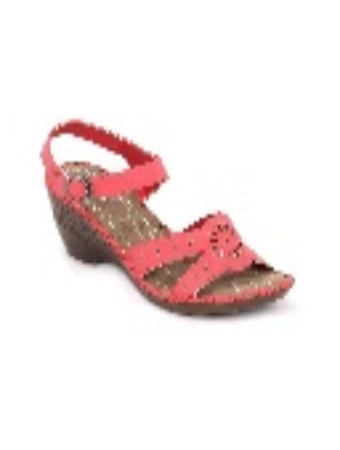

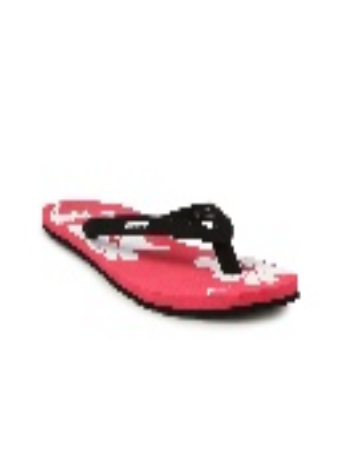

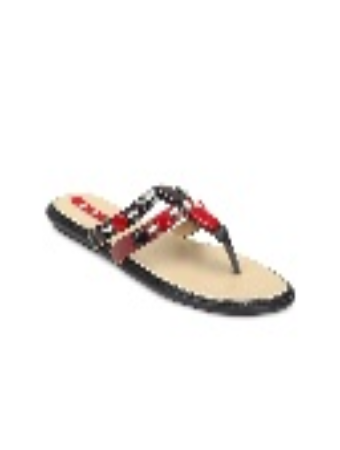

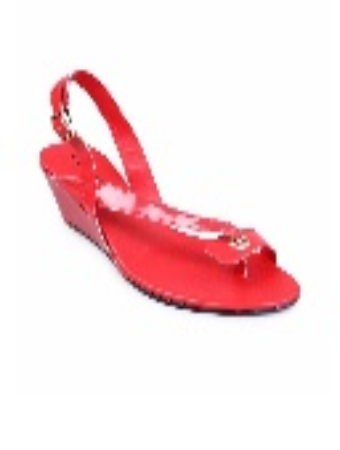

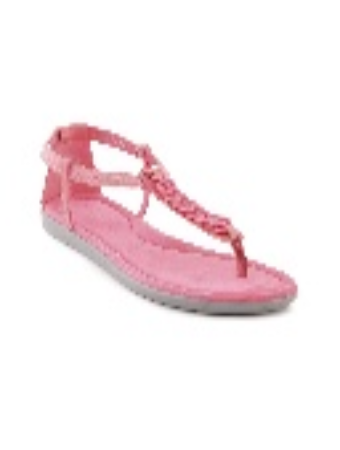

In [16]:
img2 = cv2.imread("/content/drive/MyDrive/Redes Neuronales (Vero)/Proyecto/data/img (230).jpg")
img2 = cv2.resize(img2, (224,224))
img2 = np.array(img2)
expand_img2 = np.expand_dims(img2, axis=0)
pre_img2 = preprocess_input(expand_img2)
result2 = model.predict(pre_img2).flatten()
normalized2 = result2/norm(result2)

distance, indices = neighbors.kneighbors([normalized2])

for file in indices[0][1:6]:
    img_name = cv2.imread(filename2[file])
    cv2_imshow(cv2.resize(img_name, (340, 450)))
    cv2.waitKey(0)

In [17]:
# Evaluación final

# Select test points
# Randomly select n% of the feature vectors as test points
n_test_points = int(0.01 * len(feature_list2))
test_indices = np.random.choice(len(feature_list2), n_test_points, replace=False)
test_points = feature_list2[test_indices]

# Find nearest neighbors for each test point
distances, indices = neighbors.kneighbors(test_points)

# Calculate mean distances
mean_distances = np.mean(distances, axis=1)

# Print or analyze the results
for i, mean_distance in enumerate(mean_distances):
    print(f"Test point {i}: Mean distance to nearest neighbors = {mean_distance}")

# Optionally, you can also see which filenames correspond to the test points and their neighbors
for i, test_index in enumerate(test_indices):
    print(f"\nTest point {i} (Filename: {filename2[test_index]})")
    for neighbor_index in indices[i][1:6]:
        print(f"    Neighbor Filename: {filename2[neighbor_index]}, Distance: {distances[i][np.where(indices[i] == neighbor_index)][0]}")


Test point 0: Mean distance to nearest neighbors = 0.48055142908021026
Test point 1: Mean distance to nearest neighbors = 0.533891961724943
Test point 2: Mean distance to nearest neighbors = 0.5322263947815316
Test point 3: Mean distance to nearest neighbors = 0.46474056983787154
Test point 4: Mean distance to nearest neighbors = 0.5390347462660837
Test point 5: Mean distance to nearest neighbors = 0.278928945444052
Test point 6: Mean distance to nearest neighbors = 0.4933976861976645
Test point 7: Mean distance to nearest neighbors = 0.466824300256103
Test point 8: Mean distance to nearest neighbors = 0.49378344205464336
Test point 9: Mean distance to nearest neighbors = 0.482940558705592
Test point 10: Mean distance to nearest neighbors = 0.49653599657555697
Test point 11: Mean distance to nearest neighbors = 0.45906490245517273
Test point 12: Mean distance to nearest neighbors = 0.4802901665344916
Test point 13: Mean distance to nearest neighbors = 0.4606818942865481
Test point 14: 

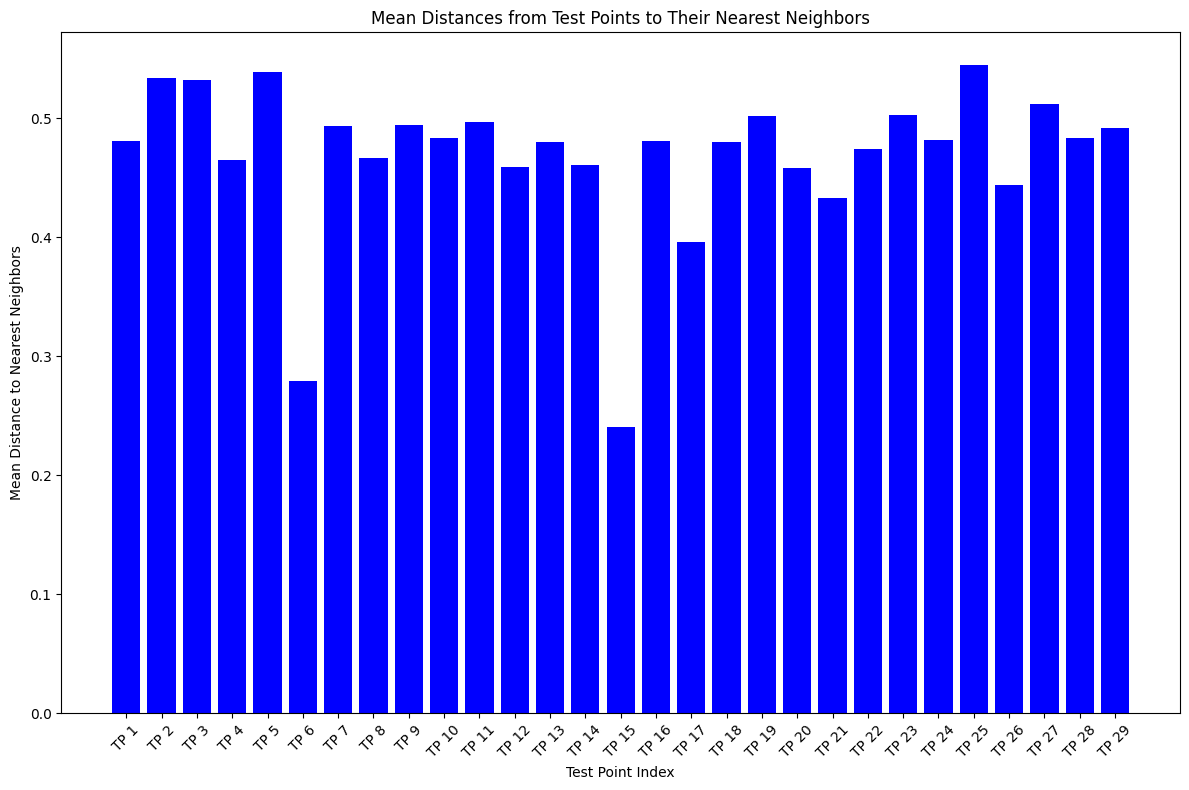

In [19]:
import matplotlib.pyplot as plt

# Plot the mean distances
plt.figure(figsize=(12, 8))
plt.bar(range(n_test_points), mean_distances, color='blue')
plt.xlabel('Test Point Index')
plt.ylabel('Mean Distance to Nearest Neighbors')
plt.title('Mean Distances from Test Points to Their Nearest Neighbors')
plt.xticks(range(n_test_points), [f'TP {i+1}' for i in range(n_test_points)], rotation=45)
plt.tight_layout()
plt.show()

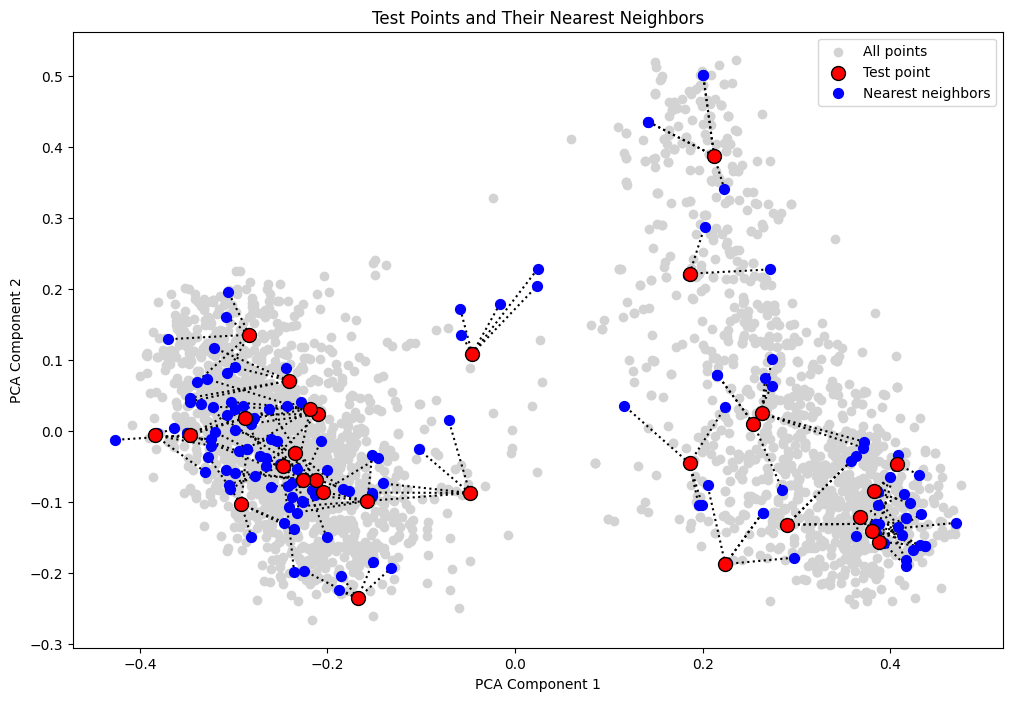

In [20]:
# Graph means
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_list2)

# Plot the test points and their nearest neighbors
plt.figure(figsize=(12, 8))

# Plot all feature points
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='lightgray', label='All points')

# Plot test points and their nearest neighbors
for i, test_index in enumerate(test_indices):
    test_point = reduced_features[test_index]
    neighbor_points = reduced_features[indices[i]]

    # Plot the test point
    plt.scatter(test_point[0], test_point[1], c='red', edgecolors='black', s=100, zorder=5, label='Test point' if i == 0 else "")

    # Plot the nearest neighbors
    plt.scatter(neighbor_points[:, 0], neighbor_points[:, 1], c='blue', s=50, zorder=4, label='Nearest neighbors' if i == 0 else "")

    # Draw lines connecting the test point to its nearest neighbors
    for neighbor_point in neighbor_points:
        plt.plot([test_point[0], neighbor_point[0]], [test_point[1], neighbor_point[1]], c='black', linestyle='dotted')

plt.legend()
plt.title('Test Points and Their Nearest Neighbors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Conclusiones

Una posible razón por la cual obtuvimos distancias promedio alrededor de 0.5 en nuestro sistema de recomendación podría ser la combinación de dos factores principales. Primero, al reducir las imágenes a 128x128 píxeles, es posible que hayamos afectado la extracción precisa de características visuales, lo cual repercute en comparaciones menos precisas entre las imágenes. Segundo, la diversidad limitada en ciertos tipos de prendas o estilos dentro de nuestro conjunto de datos también puede contribuir a distancias ligeramente mayores entre algunas recomendaciones. A pesar de estos desafíos, nuestros análisis indican que el resultado de recomendación sigue siendo aceptable y útil para la mayoría de los casos de uso previstos.